In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
from custom_rnn_uniform import SequenceModel, Trainer
import torch
from utils.visualize import *
import pickle

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
device = torch.device("cpu")

In [4]:
root = os.getcwd()

train = pickle.load(open(root+"/../datasets/custom_rnn_uniform/train.pickle", "rb"))
val = pickle.load(open(root+"/../datasets/custom_rnn_uniform/val.pickle", "rb"))
test = pickle.load(open(root+"/../datasets/custom_rnn_uniform/test.pickle", "rb"))

In [5]:
t = 1
train["input_states"][t].shape, train["input_actions"][t].shape, train["intermediate_states"][t].shape, train["output_states"][t].shape, train["output_actions"][t].shape

((1606, 1, 21), (1606, 1, 8), (1606, 21), (1606, 98, 21), (1606, 98, 8))

In [6]:
t = 1
val["input_states"][t].shape, val["input_actions"][t].shape, val["intermediate_states"][t].shape, val["output_states"][t].shape, val["output_actions"][t].shape

((89, 1, 21), (89, 1, 8), (89, 21), (89, 98, 21), (89, 98, 8))

In [7]:
t = 1
test["input_states"][t].shape, test["input_actions"][t].shape, test["intermediate_states"][t].shape, test["output_states"][t].shape, test["output_actions"][t].shape

((90, 1, 21), (90, 1, 8), (90, 21), (90, 98, 21), (90, 98, 8))

In [8]:
seq_model = SequenceModel(state_dim=21, action_dim=8, latent_dim=256, num_recurrent_layers=1, device=device).to(device)

In [9]:
trainer = Trainer(model=seq_model, device=device, learing_rate=1e-5)

In [10]:
trainer.load_checkpoint(path=root+"/../models/custom_rnn_uniform_2.pth")

In [ ]:
losses, embedding_losses, final_state_losses, next_state_losses, val_losses = trainer.train(train=train, val=val, epochs=100000, batch_size=256, shuffle=True, verbose=False)

t: 10 EPOCH 0 -- Train Loss: 0.33280  Validation Loss: 0.43027
t: 10 EPOCH 1 -- Train Loss: 0.33267  Validation Loss: 0.42976
t: 10 EPOCH 2 -- Train Loss: 0.33257  Validation Loss: 0.42838
t: 10 EPOCH 3 -- Train Loss: 0.33311  Validation Loss: 0.43020
t: 10 EPOCH 4 -- Train Loss: 0.33281  Validation Loss: 0.43021
t: 10 EPOCH 5 -- Train Loss: 0.33358  Validation Loss: 0.43011
t: 10 EPOCH 6 -- Train Loss: 0.33315  Validation Loss: 0.42959
t: 10 EPOCH 7 -- Train Loss: 0.33312  Validation Loss: 0.42952
t: 10 EPOCH 8 -- Train Loss: 0.33299  Validation Loss: 0.42953
t: 10 EPOCH 9 -- Train Loss: 0.33333  Validation Loss: 0.43002
t: 10 EPOCH 10 -- Train Loss: 0.33261  Validation Loss: 0.43100
t: 10 EPOCH 11 -- Train Loss: 0.33344  Validation Loss: 0.42946
t: 10 EPOCH 12 -- Train Loss: 0.33273  Validation Loss: 0.43033
t: 10 EPOCH 13 -- Train Loss: 0.33253  Validation Loss: 0.43161
t: 10 EPOCH 14 -- Train Loss: 0.33304  Validation Loss: 0.42897
t: 10 EPOCH 15 -- Train Loss: 0.33229  Validation 

t: 10 EPOCH 128 -- Train Loss: 0.33288  Validation Loss: 0.42949
t: 10 EPOCH 129 -- Train Loss: 0.33316  Validation Loss: 0.43022
t: 10 EPOCH 130 -- Train Loss: 0.33349  Validation Loss: 0.42921
t: 10 EPOCH 131 -- Train Loss: 0.33363  Validation Loss: 0.42839
t: 10 EPOCH 132 -- Train Loss: 0.33334  Validation Loss: 0.42925
t: 10 EPOCH 133 -- Train Loss: 0.33349  Validation Loss: 0.42905
t: 10 EPOCH 134 -- Train Loss: 0.33229  Validation Loss: 0.43046
t: 10 EPOCH 135 -- Train Loss: 0.33283  Validation Loss: 0.43078
t: 10 EPOCH 136 -- Train Loss: 0.33361  Validation Loss: 0.42999
t: 10 EPOCH 137 -- Train Loss: 0.33418  Validation Loss: 0.43058
t: 10 EPOCH 138 -- Train Loss: 0.33193  Validation Loss: 0.43137
t: 10 EPOCH 139 -- Train Loss: 0.33345  Validation Loss: 0.42892
t: 10 EPOCH 140 -- Train Loss: 0.33308  Validation Loss: 0.42954
t: 10 EPOCH 141 -- Train Loss: 0.33354  Validation Loss: 0.43000
t: 10 EPOCH 142 -- Train Loss: 0.33285  Validation Loss: 0.43119
t: 10 EPOCH 143 -- Train 

t: 10 EPOCH 254 -- Train Loss: 0.33200  Validation Loss: 0.42951
t: 10 EPOCH 255 -- Train Loss: 0.33305  Validation Loss: 0.42995
t: 10 EPOCH 256 -- Train Loss: 0.33249  Validation Loss: 0.42963
t: 10 EPOCH 257 -- Train Loss: 0.33283  Validation Loss: 0.43053
t: 10 EPOCH 258 -- Train Loss: 0.33293  Validation Loss: 0.43060
t: 10 EPOCH 259 -- Train Loss: 0.33276  Validation Loss: 0.43025
t: 10 EPOCH 260 -- Train Loss: 0.33322  Validation Loss: 0.42865
t: 10 EPOCH 261 -- Train Loss: 0.33244  Validation Loss: 0.42921
t: 10 EPOCH 262 -- Train Loss: 0.33344  Validation Loss: 0.43033
t: 10 EPOCH 263 -- Train Loss: 0.33354  Validation Loss: 0.43000
t: 10 EPOCH 264 -- Train Loss: 0.33283  Validation Loss: 0.43052
t: 10 EPOCH 265 -- Train Loss: 0.33250  Validation Loss: 0.42916
t: 10 EPOCH 266 -- Train Loss: 0.33223  Validation Loss: 0.42957
t: 10 EPOCH 267 -- Train Loss: 0.33342  Validation Loss: 0.42949
t: 10 EPOCH 268 -- Train Loss: 0.33198  Validation Loss: 0.42926
t: 10 EPOCH 269 -- Train 

t: 10 EPOCH 380 -- Train Loss: 0.33317  Validation Loss: 0.42894
t: 10 EPOCH 381 -- Train Loss: 0.33265  Validation Loss: 0.43080
t: 10 EPOCH 382 -- Train Loss: 0.33367  Validation Loss: 0.42850
t: 10 EPOCH 383 -- Train Loss: 0.33259  Validation Loss: 0.42938
t: 10 EPOCH 384 -- Train Loss: 0.33382  Validation Loss: 0.42939
t: 10 EPOCH 385 -- Train Loss: 0.33305  Validation Loss: 0.42959
t: 10 EPOCH 386 -- Train Loss: 0.33381  Validation Loss: 0.43023
t: 10 EPOCH 387 -- Train Loss: 0.33268  Validation Loss: 0.43051
t: 10 EPOCH 388 -- Train Loss: 0.33360  Validation Loss: 0.43033
t: 10 EPOCH 389 -- Train Loss: 0.33227  Validation Loss: 0.43083
t: 10 EPOCH 390 -- Train Loss: 0.33393  Validation Loss: 0.43114
t: 10 EPOCH 391 -- Train Loss: 0.33216  Validation Loss: 0.42968
t: 10 EPOCH 392 -- Train Loss: 0.33274  Validation Loss: 0.43048
t: 10 EPOCH 393 -- Train Loss: 0.33301  Validation Loss: 0.42991
t: 10 EPOCH 394 -- Train Loss: 0.33285  Validation Loss: 0.43042
t: 10 EPOCH 395 -- Train 

t: 10 EPOCH 506 -- Train Loss: 0.33310  Validation Loss: 0.42979
t: 10 EPOCH 507 -- Train Loss: 0.33223  Validation Loss: 0.42946
t: 10 EPOCH 508 -- Train Loss: 0.33278  Validation Loss: 0.42894
t: 10 EPOCH 509 -- Train Loss: 0.33175  Validation Loss: 0.43021
t: 10 EPOCH 510 -- Train Loss: 0.33282  Validation Loss: 0.43011
t: 10 EPOCH 511 -- Train Loss: 0.33260  Validation Loss: 0.42978
t: 10 EPOCH 512 -- Train Loss: 0.33353  Validation Loss: 0.43027
t: 10 EPOCH 513 -- Train Loss: 0.33213  Validation Loss: 0.43001
t: 10 EPOCH 514 -- Train Loss: 0.33344  Validation Loss: 0.43026
t: 10 EPOCH 515 -- Train Loss: 0.33278  Validation Loss: 0.42887
t: 10 EPOCH 516 -- Train Loss: 0.33329  Validation Loss: 0.43074
t: 10 EPOCH 517 -- Train Loss: 0.33294  Validation Loss: 0.42962
t: 10 EPOCH 518 -- Train Loss: 0.33322  Validation Loss: 0.43005
t: 10 EPOCH 519 -- Train Loss: 0.33245  Validation Loss: 0.43095
t: 10 EPOCH 520 -- Train Loss: 0.33254  Validation Loss: 0.42898
t: 10 EPOCH 521 -- Train 

t: 10 EPOCH 633 -- Train Loss: 0.33276  Validation Loss: 0.42979
t: 10 EPOCH 634 -- Train Loss: 0.33164  Validation Loss: 0.42946
t: 10 EPOCH 635 -- Train Loss: 0.33346  Validation Loss: 0.42999
t: 10 EPOCH 636 -- Train Loss: 0.33302  Validation Loss: 0.43035
t: 10 EPOCH 637 -- Train Loss: 0.33231  Validation Loss: 0.42988
t: 10 EPOCH 638 -- Train Loss: 0.33261  Validation Loss: 0.43112
t: 10 EPOCH 639 -- Train Loss: 0.33283  Validation Loss: 0.42916
t: 10 EPOCH 640 -- Train Loss: 0.33209  Validation Loss: 0.42966
t: 10 EPOCH 641 -- Train Loss: 0.33324  Validation Loss: 0.43153
t: 10 EPOCH 642 -- Train Loss: 0.33336  Validation Loss: 0.43063
t: 10 EPOCH 643 -- Train Loss: 0.33307  Validation Loss: 0.42865
t: 10 EPOCH 644 -- Train Loss: 0.33226  Validation Loss: 0.42970
t: 10 EPOCH 645 -- Train Loss: 0.33219  Validation Loss: 0.43087
t: 10 EPOCH 646 -- Train Loss: 0.33309  Validation Loss: 0.43008
t: 10 EPOCH 647 -- Train Loss: 0.33286  Validation Loss: 0.42962
t: 10 EPOCH 648 -- Train 

t: 10 EPOCH 759 -- Train Loss: 0.33312  Validation Loss: 0.42992
t: 10 EPOCH 760 -- Train Loss: 0.33220  Validation Loss: 0.43021
t: 10 EPOCH 761 -- Train Loss: 0.33308  Validation Loss: 0.43061
t: 10 EPOCH 762 -- Train Loss: 0.33150  Validation Loss: 0.43110
t: 10 EPOCH 763 -- Train Loss: 0.33287  Validation Loss: 0.42992
t: 10 EPOCH 764 -- Train Loss: 0.33236  Validation Loss: 0.42985
t: 10 EPOCH 765 -- Train Loss: 0.33245  Validation Loss: 0.42925
t: 10 EPOCH 766 -- Train Loss: 0.33262  Validation Loss: 0.42960
t: 10 EPOCH 767 -- Train Loss: 0.33117  Validation Loss: 0.42975
t: 10 EPOCH 768 -- Train Loss: 0.33231  Validation Loss: 0.42918
t: 10 EPOCH 769 -- Train Loss: 0.33246  Validation Loss: 0.42942
t: 10 EPOCH 770 -- Train Loss: 0.33205  Validation Loss: 0.43073
t: 10 EPOCH 771 -- Train Loss: 0.33241  Validation Loss: 0.43103
t: 10 EPOCH 772 -- Train Loss: 0.33197  Validation Loss: 0.43050
t: 10 EPOCH 773 -- Train Loss: 0.33348  Validation Loss: 0.43048
t: 10 EPOCH 774 -- Train 

t: 10 EPOCH 885 -- Train Loss: 0.33317  Validation Loss: 0.43098
t: 10 EPOCH 886 -- Train Loss: 0.33234  Validation Loss: 0.43015
t: 10 EPOCH 887 -- Train Loss: 0.33317  Validation Loss: 0.43043
t: 10 EPOCH 888 -- Train Loss: 0.33274  Validation Loss: 0.42985
t: 10 EPOCH 889 -- Train Loss: 0.33320  Validation Loss: 0.43056
t: 10 EPOCH 890 -- Train Loss: 0.33151  Validation Loss: 0.43122
t: 10 EPOCH 891 -- Train Loss: 0.33205  Validation Loss: 0.42968
t: 10 EPOCH 892 -- Train Loss: 0.33287  Validation Loss: 0.42933
t: 10 EPOCH 893 -- Train Loss: 0.33326  Validation Loss: 0.43061
t: 10 EPOCH 894 -- Train Loss: 0.33273  Validation Loss: 0.43096
t: 10 EPOCH 895 -- Train Loss: 0.33234  Validation Loss: 0.42837
t: 10 EPOCH 896 -- Train Loss: 0.33135  Validation Loss: 0.43047
t: 10 EPOCH 897 -- Train Loss: 0.33296  Validation Loss: 0.42882
t: 10 EPOCH 898 -- Train Loss: 0.33214  Validation Loss: 0.42965
t: 10 EPOCH 899 -- Train Loss: 0.33363  Validation Loss: 0.43168
t: 10 EPOCH 900 -- Train 

t: 10 EPOCH 1011 -- Train Loss: 0.33230  Validation Loss: 0.43098
t: 10 EPOCH 1012 -- Train Loss: 0.33218  Validation Loss: 0.42978
t: 10 EPOCH 1013 -- Train Loss: 0.33281  Validation Loss: 0.43024
t: 10 EPOCH 1014 -- Train Loss: 0.33183  Validation Loss: 0.42957
t: 10 EPOCH 1015 -- Train Loss: 0.33224  Validation Loss: 0.43033
t: 10 EPOCH 1016 -- Train Loss: 0.33203  Validation Loss: 0.42940
t: 10 EPOCH 1017 -- Train Loss: 0.33243  Validation Loss: 0.42923
t: 10 EPOCH 1018 -- Train Loss: 0.33247  Validation Loss: 0.42946
t: 10 EPOCH 1019 -- Train Loss: 0.33221  Validation Loss: 0.43003
t: 10 EPOCH 1020 -- Train Loss: 0.33212  Validation Loss: 0.43047
t: 10 EPOCH 1021 -- Train Loss: 0.33246  Validation Loss: 0.43085
t: 10 EPOCH 1022 -- Train Loss: 0.33229  Validation Loss: 0.42966
t: 10 EPOCH 1023 -- Train Loss: 0.33201  Validation Loss: 0.42992
t: 10 EPOCH 1024 -- Train Loss: 0.33205  Validation Loss: 0.42969
t: 10 EPOCH 1025 -- Train Loss: 0.33341  Validation Loss: 0.43038
t: 10 EPOC

t: 10 EPOCH 1137 -- Train Loss: 0.33221  Validation Loss: 0.42995
t: 10 EPOCH 1138 -- Train Loss: 0.33195  Validation Loss: 0.43089
t: 10 EPOCH 1139 -- Train Loss: 0.33293  Validation Loss: 0.42978
t: 10 EPOCH 1140 -- Train Loss: 0.33289  Validation Loss: 0.43015
t: 10 EPOCH 1141 -- Train Loss: 0.33230  Validation Loss: 0.43028
t: 10 EPOCH 1142 -- Train Loss: 0.33175  Validation Loss: 0.43068
t: 10 EPOCH 1143 -- Train Loss: 0.33318  Validation Loss: 0.43016
t: 10 EPOCH 1144 -- Train Loss: 0.33175  Validation Loss: 0.43199
t: 10 EPOCH 1145 -- Train Loss: 0.33279  Validation Loss: 0.43193
t: 10 EPOCH 1146 -- Train Loss: 0.33204  Validation Loss: 0.43062
t: 10 EPOCH 1147 -- Train Loss: 0.33286  Validation Loss: 0.43081
t: 10 EPOCH 1148 -- Train Loss: 0.33256  Validation Loss: 0.42898
t: 10 EPOCH 1149 -- Train Loss: 0.33310  Validation Loss: 0.43020
t: 10 EPOCH 1150 -- Train Loss: 0.33127  Validation Loss: 0.43185
t: 10 EPOCH 1151 -- Train Loss: 0.33283  Validation Loss: 0.42977
t: 10 EPOC

t: 10 EPOCH 1263 -- Train Loss: 0.33276  Validation Loss: 0.42971
t: 10 EPOCH 1264 -- Train Loss: 0.33260  Validation Loss: 0.43060
t: 10 EPOCH 1265 -- Train Loss: 0.33211  Validation Loss: 0.42987
t: 10 EPOCH 1266 -- Train Loss: 0.33321  Validation Loss: 0.43018
t: 10 EPOCH 1267 -- Train Loss: 0.33234  Validation Loss: 0.43061
t: 10 EPOCH 1268 -- Train Loss: 0.33206  Validation Loss: 0.43217
t: 10 EPOCH 1269 -- Train Loss: 0.33243  Validation Loss: 0.43088
t: 10 EPOCH 1270 -- Train Loss: 0.33269  Validation Loss: 0.43012
t: 10 EPOCH 1271 -- Train Loss: 0.33179  Validation Loss: 0.43210
t: 10 EPOCH 1272 -- Train Loss: 0.33305  Validation Loss: 0.43091
t: 10 EPOCH 1273 -- Train Loss: 0.33079  Validation Loss: 0.43085
t: 10 EPOCH 1274 -- Train Loss: 0.33268  Validation Loss: 0.43113
t: 10 EPOCH 1275 -- Train Loss: 0.33293  Validation Loss: 0.43113
t: 10 EPOCH 1276 -- Train Loss: 0.33246  Validation Loss: 0.43116
t: 10 EPOCH 1277 -- Train Loss: 0.33210  Validation Loss: 0.42965
t: 10 EPOC

t: 10 EPOCH 1388 -- Train Loss: 0.33234  Validation Loss: 0.43002
t: 10 EPOCH 1389 -- Train Loss: 0.33201  Validation Loss: 0.42942
t: 10 EPOCH 1390 -- Train Loss: 0.33190  Validation Loss: 0.43068
t: 10 EPOCH 1391 -- Train Loss: 0.33268  Validation Loss: 0.43152
t: 10 EPOCH 1392 -- Train Loss: 0.33179  Validation Loss: 0.43061
t: 10 EPOCH 1393 -- Train Loss: 0.33213  Validation Loss: 0.43041
t: 10 EPOCH 1394 -- Train Loss: 0.33149  Validation Loss: 0.43065
t: 10 EPOCH 1395 -- Train Loss: 0.33192  Validation Loss: 0.43077
t: 10 EPOCH 1396 -- Train Loss: 0.33116  Validation Loss: 0.43013
t: 10 EPOCH 1397 -- Train Loss: 0.33244  Validation Loss: 0.43154
t: 10 EPOCH 1398 -- Train Loss: 0.33199  Validation Loss: 0.42956
t: 10 EPOCH 1399 -- Train Loss: 0.33226  Validation Loss: 0.43086
t: 10 EPOCH 1400 -- Train Loss: 0.33226  Validation Loss: 0.43130
t: 10 EPOCH 1401 -- Train Loss: 0.33214  Validation Loss: 0.43065
t: 10 EPOCH 1402 -- Train Loss: 0.33264  Validation Loss: 0.43146
t: 10 EPOC

t: 10 EPOCH 1513 -- Train Loss: 0.33239  Validation Loss: 0.42951
t: 10 EPOCH 1514 -- Train Loss: 0.33309  Validation Loss: 0.43141
t: 10 EPOCH 1515 -- Train Loss: 0.33115  Validation Loss: 0.43185
t: 10 EPOCH 1516 -- Train Loss: 0.33192  Validation Loss: 0.43044
t: 10 EPOCH 1517 -- Train Loss: 0.33178  Validation Loss: 0.43003
t: 10 EPOCH 1518 -- Train Loss: 0.33235  Validation Loss: 0.42952
t: 10 EPOCH 1519 -- Train Loss: 0.33205  Validation Loss: 0.43010
t: 10 EPOCH 1520 -- Train Loss: 0.33238  Validation Loss: 0.42965
t: 10 EPOCH 1521 -- Train Loss: 0.33239  Validation Loss: 0.43064
t: 10 EPOCH 1522 -- Train Loss: 0.33166  Validation Loss: 0.43097
t: 10 EPOCH 1523 -- Train Loss: 0.33200  Validation Loss: 0.43039
t: 10 EPOCH 1524 -- Train Loss: 0.33195  Validation Loss: 0.43012
t: 10 EPOCH 1525 -- Train Loss: 0.33278  Validation Loss: 0.43052
t: 10 EPOCH 1526 -- Train Loss: 0.33171  Validation Loss: 0.43045
t: 10 EPOCH 1527 -- Train Loss: 0.33239  Validation Loss: 0.43153
t: 10 EPOC

t: 10 EPOCH 1638 -- Train Loss: 0.33227  Validation Loss: 0.43036
t: 10 EPOCH 1639 -- Train Loss: 0.33200  Validation Loss: 0.43211
t: 10 EPOCH 1640 -- Train Loss: 0.33270  Validation Loss: 0.43225
t: 10 EPOCH 1641 -- Train Loss: 0.33238  Validation Loss: 0.43103
t: 10 EPOCH 1642 -- Train Loss: 0.33284  Validation Loss: 0.42992
t: 10 EPOCH 1643 -- Train Loss: 0.33247  Validation Loss: 0.42892
t: 10 EPOCH 1644 -- Train Loss: 0.33189  Validation Loss: 0.43073
t: 10 EPOCH 1645 -- Train Loss: 0.33211  Validation Loss: 0.42985
t: 10 EPOCH 1646 -- Train Loss: 0.33176  Validation Loss: 0.42971
t: 10 EPOCH 1647 -- Train Loss: 0.33234  Validation Loss: 0.43054
t: 10 EPOCH 1648 -- Train Loss: 0.33236  Validation Loss: 0.43047
t: 10 EPOCH 1649 -- Train Loss: 0.33196  Validation Loss: 0.43056
t: 10 EPOCH 1650 -- Train Loss: 0.33095  Validation Loss: 0.43070
t: 10 EPOCH 1651 -- Train Loss: 0.33334  Validation Loss: 0.43108
t: 10 EPOCH 1652 -- Train Loss: 0.33278  Validation Loss: 0.43131
t: 10 EPOC

t: 10 EPOCH 1764 -- Train Loss: 0.33171  Validation Loss: 0.43104
t: 10 EPOCH 1765 -- Train Loss: 0.33261  Validation Loss: 0.43013
t: 10 EPOCH 1766 -- Train Loss: 0.33147  Validation Loss: 0.43018
t: 10 EPOCH 1767 -- Train Loss: 0.33215  Validation Loss: 0.43087
t: 10 EPOCH 1768 -- Train Loss: 0.33107  Validation Loss: 0.43152
t: 10 EPOCH 1769 -- Train Loss: 0.33281  Validation Loss: 0.42987
t: 10 EPOCH 1770 -- Train Loss: 0.33134  Validation Loss: 0.43016
t: 10 EPOCH 1771 -- Train Loss: 0.33271  Validation Loss: 0.43141
t: 10 EPOCH 1772 -- Train Loss: 0.33197  Validation Loss: 0.42943
t: 10 EPOCH 1773 -- Train Loss: 0.33256  Validation Loss: 0.43060
t: 10 EPOCH 1774 -- Train Loss: 0.33141  Validation Loss: 0.43127
t: 10 EPOCH 1775 -- Train Loss: 0.33265  Validation Loss: 0.43090
t: 10 EPOCH 1776 -- Train Loss: 0.33250  Validation Loss: 0.42944
t: 10 EPOCH 1777 -- Train Loss: 0.33309  Validation Loss: 0.43029
t: 10 EPOCH 1778 -- Train Loss: 0.33211  Validation Loss: 0.43174
t: 10 EPOC

t: 10 EPOCH 1890 -- Train Loss: 0.33131  Validation Loss: 0.43160
t: 10 EPOCH 1891 -- Train Loss: 0.33269  Validation Loss: 0.42989
t: 10 EPOCH 1892 -- Train Loss: 0.33240  Validation Loss: 0.43135
t: 10 EPOCH 1893 -- Train Loss: 0.33206  Validation Loss: 0.43101
t: 10 EPOCH 1894 -- Train Loss: 0.33131  Validation Loss: 0.43176
t: 10 EPOCH 1895 -- Train Loss: 0.33250  Validation Loss: 0.42978
t: 10 EPOCH 1896 -- Train Loss: 0.33267  Validation Loss: 0.43102
t: 10 EPOCH 1897 -- Train Loss: 0.33261  Validation Loss: 0.42981
t: 10 EPOCH 1898 -- Train Loss: 0.33312  Validation Loss: 0.43124
t: 10 EPOCH 1899 -- Train Loss: 0.33237  Validation Loss: 0.43074
t: 10 EPOCH 1900 -- Train Loss: 0.33228  Validation Loss: 0.42955
t: 10 EPOCH 1901 -- Train Loss: 0.33197  Validation Loss: 0.42896
t: 10 EPOCH 1902 -- Train Loss: 0.33233  Validation Loss: 0.43067
t: 10 EPOCH 1903 -- Train Loss: 0.33223  Validation Loss: 0.43181
t: 10 EPOCH 1904 -- Train Loss: 0.33153  Validation Loss: 0.42971
t: 10 EPOC

t: 10 EPOCH 2016 -- Train Loss: 0.33142  Validation Loss: 0.42949
t: 10 EPOCH 2017 -- Train Loss: 0.33237  Validation Loss: 0.43071
t: 10 EPOCH 2018 -- Train Loss: 0.33174  Validation Loss: 0.43069
t: 10 EPOCH 2019 -- Train Loss: 0.33223  Validation Loss: 0.43059
t: 10 EPOCH 2020 -- Train Loss: 0.33123  Validation Loss: 0.43025
t: 10 EPOCH 2021 -- Train Loss: 0.33142  Validation Loss: 0.42969
t: 10 EPOCH 2022 -- Train Loss: 0.33144  Validation Loss: 0.43156
t: 10 EPOCH 2023 -- Train Loss: 0.33216  Validation Loss: 0.43063
t: 10 EPOCH 2024 -- Train Loss: 0.33215  Validation Loss: 0.43071
t: 10 EPOCH 2025 -- Train Loss: 0.33191  Validation Loss: 0.42959
t: 10 EPOCH 2026 -- Train Loss: 0.33202  Validation Loss: 0.43196
t: 10 EPOCH 2027 -- Train Loss: 0.33159  Validation Loss: 0.43168
t: 10 EPOCH 2028 -- Train Loss: 0.33199  Validation Loss: 0.43072
t: 10 EPOCH 2029 -- Train Loss: 0.33227  Validation Loss: 0.43006
t: 10 EPOCH 2030 -- Train Loss: 0.33094  Validation Loss: 0.43016
t: 10 EPOC

t: 10 EPOCH 2141 -- Train Loss: 0.33219  Validation Loss: 0.43232
t: 10 EPOCH 2142 -- Train Loss: 0.33237  Validation Loss: 0.43239
t: 10 EPOCH 2143 -- Train Loss: 0.33174  Validation Loss: 0.43097
t: 10 EPOCH 2144 -- Train Loss: 0.33231  Validation Loss: 0.43085
t: 10 EPOCH 2145 -- Train Loss: 0.33182  Validation Loss: 0.43100
t: 10 EPOCH 2146 -- Train Loss: 0.33137  Validation Loss: 0.43106
t: 10 EPOCH 2147 -- Train Loss: 0.33189  Validation Loss: 0.42985
t: 10 EPOCH 2148 -- Train Loss: 0.33219  Validation Loss: 0.42983
t: 10 EPOCH 2149 -- Train Loss: 0.33166  Validation Loss: 0.43098
t: 10 EPOCH 2150 -- Train Loss: 0.33125  Validation Loss: 0.42969
t: 10 EPOCH 2151 -- Train Loss: 0.33127  Validation Loss: 0.42964
t: 10 EPOCH 2152 -- Train Loss: 0.33228  Validation Loss: 0.43180
t: 10 EPOCH 2153 -- Train Loss: 0.33096  Validation Loss: 0.43162
t: 10 EPOCH 2154 -- Train Loss: 0.33284  Validation Loss: 0.43091
t: 10 EPOCH 2155 -- Train Loss: 0.33043  Validation Loss: 0.43198
t: 10 EPOC

t: 10 EPOCH 2267 -- Train Loss: 0.33133  Validation Loss: 0.43109
t: 10 EPOCH 2268 -- Train Loss: 0.33192  Validation Loss: 0.43093
t: 10 EPOCH 2269 -- Train Loss: 0.33176  Validation Loss: 0.43041
t: 10 EPOCH 2270 -- Train Loss: 0.33176  Validation Loss: 0.43072
t: 10 EPOCH 2271 -- Train Loss: 0.33187  Validation Loss: 0.43109
t: 10 EPOCH 2272 -- Train Loss: 0.33106  Validation Loss: 0.43114
t: 10 EPOCH 2273 -- Train Loss: 0.33173  Validation Loss: 0.43057
t: 10 EPOCH 2274 -- Train Loss: 0.33179  Validation Loss: 0.42986
t: 10 EPOCH 2275 -- Train Loss: 0.33228  Validation Loss: 0.43178
t: 10 EPOCH 2276 -- Train Loss: 0.33202  Validation Loss: 0.43152
t: 10 EPOCH 2277 -- Train Loss: 0.33172  Validation Loss: 0.43050
t: 10 EPOCH 2278 -- Train Loss: 0.33173  Validation Loss: 0.42990
t: 10 EPOCH 2279 -- Train Loss: 0.33099  Validation Loss: 0.43138
t: 10 EPOCH 2280 -- Train Loss: 0.33040  Validation Loss: 0.43130
t: 10 EPOCH 2281 -- Train Loss: 0.33115  Validation Loss: 0.43172
t: 10 EPOC

t: 10 EPOCH 2393 -- Train Loss: 0.33049  Validation Loss: 0.43084
t: 10 EPOCH 2394 -- Train Loss: 0.33220  Validation Loss: 0.43148
t: 10 EPOCH 2395 -- Train Loss: 0.33162  Validation Loss: 0.43099
t: 10 EPOCH 2396 -- Train Loss: 0.33163  Validation Loss: 0.43221
t: 10 EPOCH 2397 -- Train Loss: 0.33094  Validation Loss: 0.43111
t: 10 EPOCH 2398 -- Train Loss: 0.33123  Validation Loss: 0.43139
t: 10 EPOCH 2399 -- Train Loss: 0.33133  Validation Loss: 0.43106
t: 10 EPOCH 2400 -- Train Loss: 0.33123  Validation Loss: 0.43043
t: 10 EPOCH 2401 -- Train Loss: 0.33172  Validation Loss: 0.43136
t: 10 EPOCH 2402 -- Train Loss: 0.33157  Validation Loss: 0.43037
t: 10 EPOCH 2403 -- Train Loss: 0.33190  Validation Loss: 0.43083
t: 10 EPOCH 2404 -- Train Loss: 0.33124  Validation Loss: 0.43031
t: 10 EPOCH 2405 -- Train Loss: 0.33253  Validation Loss: 0.43093
t: 10 EPOCH 2406 -- Train Loss: 0.33139  Validation Loss: 0.43023
t: 10 EPOCH 2407 -- Train Loss: 0.33106  Validation Loss: 0.43132
t: 10 EPOC

t: 10 EPOCH 2519 -- Train Loss: 0.33128  Validation Loss: 0.42941
t: 10 EPOCH 2520 -- Train Loss: 0.33213  Validation Loss: 0.43003
t: 10 EPOCH 2521 -- Train Loss: 0.33156  Validation Loss: 0.43134
t: 10 EPOCH 2522 -- Train Loss: 0.33108  Validation Loss: 0.43214
t: 10 EPOCH 2523 -- Train Loss: 0.33112  Validation Loss: 0.43211
t: 10 EPOCH 2524 -- Train Loss: 0.33117  Validation Loss: 0.43005
t: 10 EPOCH 2525 -- Train Loss: 0.33040  Validation Loss: 0.42986
t: 10 EPOCH 2526 -- Train Loss: 0.33093  Validation Loss: 0.43146
t: 10 EPOCH 2527 -- Train Loss: 0.33098  Validation Loss: 0.43138
t: 10 EPOCH 2528 -- Train Loss: 0.33034  Validation Loss: 0.43109
t: 10 EPOCH 2529 -- Train Loss: 0.33148  Validation Loss: 0.43149
t: 10 EPOCH 2530 -- Train Loss: 0.33044  Validation Loss: 0.43026
t: 10 EPOCH 2531 -- Train Loss: 0.33159  Validation Loss: 0.43144
t: 10 EPOCH 2532 -- Train Loss: 0.33101  Validation Loss: 0.43135
t: 10 EPOCH 2533 -- Train Loss: 0.33122  Validation Loss: 0.43171
t: 10 EPOC

t: 10 EPOCH 2645 -- Train Loss: 0.33134  Validation Loss: 0.43071
t: 10 EPOCH 2646 -- Train Loss: 0.33050  Validation Loss: 0.43232
t: 10 EPOCH 2647 -- Train Loss: 0.33100  Validation Loss: 0.43055
t: 10 EPOCH 2648 -- Train Loss: 0.32986  Validation Loss: 0.43136
t: 10 EPOCH 2649 -- Train Loss: 0.33092  Validation Loss: 0.43165
t: 10 EPOCH 2650 -- Train Loss: 0.33091  Validation Loss: 0.43162
t: 10 EPOCH 2651 -- Train Loss: 0.33132  Validation Loss: 0.43157
t: 10 EPOCH 2652 -- Train Loss: 0.33064  Validation Loss: 0.43173
t: 10 EPOCH 2653 -- Train Loss: 0.33135  Validation Loss: 0.42950
t: 10 EPOCH 2654 -- Train Loss: 0.33023  Validation Loss: 0.43056
t: 10 EPOCH 2655 -- Train Loss: 0.33079  Validation Loss: 0.42979
t: 10 EPOCH 2656 -- Train Loss: 0.33132  Validation Loss: 0.42953
t: 10 EPOCH 2657 -- Train Loss: 0.33089  Validation Loss: 0.43024
t: 10 EPOCH 2658 -- Train Loss: 0.33151  Validation Loss: 0.43085
t: 10 EPOCH 2659 -- Train Loss: 0.33096  Validation Loss: 0.43061
t: 10 EPOC

t: 10 EPOCH 2771 -- Train Loss: 0.33096  Validation Loss: 0.43024
t: 10 EPOCH 2772 -- Train Loss: 0.33176  Validation Loss: 0.42997
t: 10 EPOCH 2773 -- Train Loss: 0.33108  Validation Loss: 0.43202
t: 10 EPOCH 2774 -- Train Loss: 0.33155  Validation Loss: 0.43192
t: 10 EPOCH 2775 -- Train Loss: 0.32968  Validation Loss: 0.43110
t: 10 EPOCH 2776 -- Train Loss: 0.33136  Validation Loss: 0.43122
t: 10 EPOCH 2777 -- Train Loss: 0.33174  Validation Loss: 0.43197
t: 10 EPOCH 2778 -- Train Loss: 0.33003  Validation Loss: 0.43332
t: 10 EPOCH 2779 -- Train Loss: 0.33096  Validation Loss: 0.43047
t: 10 EPOCH 2780 -- Train Loss: 0.33116  Validation Loss: 0.43037
t: 10 EPOCH 2781 -- Train Loss: 0.33193  Validation Loss: 0.43063
t: 10 EPOCH 2782 -- Train Loss: 0.33038  Validation Loss: 0.43273
t: 10 EPOCH 2783 -- Train Loss: 0.33031  Validation Loss: 0.43081
t: 10 EPOCH 2784 -- Train Loss: 0.33157  Validation Loss: 0.43073
t: 10 EPOCH 2785 -- Train Loss: 0.33043  Validation Loss: 0.43169
t: 10 EPOC

t: 10 EPOCH 2897 -- Train Loss: 0.33105  Validation Loss: 0.43155
t: 10 EPOCH 2898 -- Train Loss: 0.33140  Validation Loss: 0.43120
t: 10 EPOCH 2899 -- Train Loss: 0.33074  Validation Loss: 0.43113
t: 10 EPOCH 2900 -- Train Loss: 0.33120  Validation Loss: 0.43120
t: 10 EPOCH 2901 -- Train Loss: 0.33061  Validation Loss: 0.43224
t: 10 EPOCH 2902 -- Train Loss: 0.33171  Validation Loss: 0.43070
t: 10 EPOCH 2903 -- Train Loss: 0.33145  Validation Loss: 0.43040
t: 10 EPOCH 2904 -- Train Loss: 0.33105  Validation Loss: 0.43167
t: 10 EPOCH 2905 -- Train Loss: 0.33122  Validation Loss: 0.42996
t: 10 EPOCH 2906 -- Train Loss: 0.33101  Validation Loss: 0.43085
t: 10 EPOCH 2907 -- Train Loss: 0.33187  Validation Loss: 0.43080
t: 10 EPOCH 2908 -- Train Loss: 0.33077  Validation Loss: 0.43178
t: 10 EPOCH 2909 -- Train Loss: 0.33077  Validation Loss: 0.43211
t: 10 EPOCH 2910 -- Train Loss: 0.33102  Validation Loss: 0.43122
t: 10 EPOCH 2911 -- Train Loss: 0.33183  Validation Loss: 0.43091
t: 10 EPOC

t: 10 EPOCH 3023 -- Train Loss: 0.33131  Validation Loss: 0.43016
t: 10 EPOCH 3024 -- Train Loss: 0.33076  Validation Loss: 0.43028
t: 10 EPOCH 3025 -- Train Loss: 0.33053  Validation Loss: 0.43197
t: 10 EPOCH 3026 -- Train Loss: 0.33055  Validation Loss: 0.43139
t: 10 EPOCH 3027 -- Train Loss: 0.33107  Validation Loss: 0.43113
t: 10 EPOCH 3028 -- Train Loss: 0.33096  Validation Loss: 0.43212
t: 10 EPOCH 3029 -- Train Loss: 0.33036  Validation Loss: 0.43091
t: 10 EPOCH 3030 -- Train Loss: 0.33035  Validation Loss: 0.43086
t: 10 EPOCH 3031 -- Train Loss: 0.33205  Validation Loss: 0.42995
t: 10 EPOCH 3032 -- Train Loss: 0.33117  Validation Loss: 0.43155
t: 10 EPOCH 3033 -- Train Loss: 0.33055  Validation Loss: 0.43198
t: 10 EPOCH 3034 -- Train Loss: 0.33030  Validation Loss: 0.43140
t: 10 EPOCH 3035 -- Train Loss: 0.33130  Validation Loss: 0.42885
t: 10 EPOCH 3036 -- Train Loss: 0.33038  Validation Loss: 0.43049
t: 10 EPOCH 3037 -- Train Loss: 0.33100  Validation Loss: 0.43026
t: 10 EPOC

t: 10 EPOCH 3148 -- Train Loss: 0.33074  Validation Loss: 0.43043
t: 10 EPOCH 3149 -- Train Loss: 0.33128  Validation Loss: 0.43118
t: 10 EPOCH 3150 -- Train Loss: 0.33065  Validation Loss: 0.43144
t: 10 EPOCH 3151 -- Train Loss: 0.33108  Validation Loss: 0.43025
t: 10 EPOCH 3152 -- Train Loss: 0.33117  Validation Loss: 0.43065
t: 10 EPOCH 3153 -- Train Loss: 0.33167  Validation Loss: 0.43029
t: 10 EPOCH 3154 -- Train Loss: 0.33076  Validation Loss: 0.43152
t: 10 EPOCH 3155 -- Train Loss: 0.33125  Validation Loss: 0.43110
t: 10 EPOCH 3156 -- Train Loss: 0.33061  Validation Loss: 0.43183
t: 10 EPOCH 3157 -- Train Loss: 0.33184  Validation Loss: 0.43076
t: 10 EPOCH 3158 -- Train Loss: 0.33036  Validation Loss: 0.43171
t: 10 EPOCH 3159 -- Train Loss: 0.33105  Validation Loss: 0.43156
t: 10 EPOCH 3160 -- Train Loss: 0.33051  Validation Loss: 0.43193
t: 10 EPOCH 3161 -- Train Loss: 0.33104  Validation Loss: 0.43140
t: 10 EPOCH 3162 -- Train Loss: 0.33105  Validation Loss: 0.43163
t: 10 EPOC

t: 10 EPOCH 3274 -- Train Loss: 0.32980  Validation Loss: 0.42948
t: 10 EPOCH 3275 -- Train Loss: 0.33093  Validation Loss: 0.43148
t: 10 EPOCH 3276 -- Train Loss: 0.33098  Validation Loss: 0.43138
t: 10 EPOCH 3277 -- Train Loss: 0.33032  Validation Loss: 0.43173
t: 10 EPOCH 3278 -- Train Loss: 0.33108  Validation Loss: 0.43072
t: 10 EPOCH 3279 -- Train Loss: 0.33072  Validation Loss: 0.43114
t: 10 EPOCH 3280 -- Train Loss: 0.33116  Validation Loss: 0.43120
t: 10 EPOCH 3281 -- Train Loss: 0.33097  Validation Loss: 0.43059
t: 10 EPOCH 3282 -- Train Loss: 0.33084  Validation Loss: 0.43223
t: 10 EPOCH 3283 -- Train Loss: 0.33057  Validation Loss: 0.43040
t: 10 EPOCH 3284 -- Train Loss: 0.33142  Validation Loss: 0.43179
t: 10 EPOCH 3285 -- Train Loss: 0.33031  Validation Loss: 0.43280
t: 10 EPOCH 3286 -- Train Loss: 0.33098  Validation Loss: 0.43103
t: 10 EPOCH 3287 -- Train Loss: 0.32985  Validation Loss: 0.43114
t: 10 EPOCH 3288 -- Train Loss: 0.33011  Validation Loss: 0.42993
t: 10 EPOC

t: 10 EPOCH 3400 -- Train Loss: 0.33034  Validation Loss: 0.43051
t: 10 EPOCH 3401 -- Train Loss: 0.32952  Validation Loss: 0.43096
t: 10 EPOCH 3402 -- Train Loss: 0.33035  Validation Loss: 0.43118
t: 10 EPOCH 3403 -- Train Loss: 0.32987  Validation Loss: 0.43007
t: 10 EPOCH 3404 -- Train Loss: 0.33034  Validation Loss: 0.42985
t: 10 EPOCH 3405 -- Train Loss: 0.33021  Validation Loss: 0.43214
t: 10 EPOCH 3406 -- Train Loss: 0.33125  Validation Loss: 0.43154
t: 10 EPOCH 3407 -- Train Loss: 0.33072  Validation Loss: 0.43020
t: 10 EPOCH 3408 -- Train Loss: 0.33037  Validation Loss: 0.43147
t: 10 EPOCH 3409 -- Train Loss: 0.32996  Validation Loss: 0.43204
t: 10 EPOCH 3410 -- Train Loss: 0.33114  Validation Loss: 0.43219
t: 10 EPOCH 3411 -- Train Loss: 0.33120  Validation Loss: 0.43116
t: 10 EPOCH 3412 -- Train Loss: 0.32989  Validation Loss: 0.43178
t: 10 EPOCH 3413 -- Train Loss: 0.33026  Validation Loss: 0.43120
t: 10 EPOCH 3414 -- Train Loss: 0.33199  Validation Loss: 0.43209
t: 10 EPOC

t: 10 EPOCH 3526 -- Train Loss: 0.33002  Validation Loss: 0.43085
t: 10 EPOCH 3527 -- Train Loss: 0.33119  Validation Loss: 0.43066
t: 10 EPOCH 3528 -- Train Loss: 0.33020  Validation Loss: 0.43208
t: 10 EPOCH 3529 -- Train Loss: 0.33051  Validation Loss: 0.43183
t: 10 EPOCH 3530 -- Train Loss: 0.32905  Validation Loss: 0.43045
t: 10 EPOCH 3531 -- Train Loss: 0.33150  Validation Loss: 0.43170
t: 10 EPOCH 3532 -- Train Loss: 0.32933  Validation Loss: 0.43088
t: 10 EPOCH 3533 -- Train Loss: 0.33158  Validation Loss: 0.43148
t: 10 EPOCH 3534 -- Train Loss: 0.32871  Validation Loss: 0.43144
t: 10 EPOCH 3535 -- Train Loss: 0.33078  Validation Loss: 0.43170
t: 10 EPOCH 3536 -- Train Loss: 0.33068  Validation Loss: 0.43113
t: 10 EPOCH 3537 -- Train Loss: 0.33037  Validation Loss: 0.43368
t: 10 EPOCH 3538 -- Train Loss: 0.33029  Validation Loss: 0.43087
t: 10 EPOCH 3539 -- Train Loss: 0.33057  Validation Loss: 0.43025
t: 10 EPOCH 3540 -- Train Loss: 0.32990  Validation Loss: 0.43086
t: 10 EPOC

t: 10 EPOCH 3652 -- Train Loss: 0.32943  Validation Loss: 0.43069
t: 10 EPOCH 3653 -- Train Loss: 0.32999  Validation Loss: 0.43191
t: 10 EPOCH 3654 -- Train Loss: 0.32894  Validation Loss: 0.43207
t: 10 EPOCH 3655 -- Train Loss: 0.33045  Validation Loss: 0.43126
t: 10 EPOCH 3656 -- Train Loss: 0.33010  Validation Loss: 0.43059
t: 10 EPOCH 3657 -- Train Loss: 0.33082  Validation Loss: 0.43157
t: 10 EPOCH 3658 -- Train Loss: 0.33024  Validation Loss: 0.43044
t: 10 EPOCH 3659 -- Train Loss: 0.33009  Validation Loss: 0.43164
t: 10 EPOCH 3660 -- Train Loss: 0.33069  Validation Loss: 0.43172
t: 10 EPOCH 3661 -- Train Loss: 0.32990  Validation Loss: 0.43175
t: 10 EPOCH 3662 -- Train Loss: 0.33041  Validation Loss: 0.43140
t: 10 EPOCH 3663 -- Train Loss: 0.33016  Validation Loss: 0.43149
t: 10 EPOCH 3664 -- Train Loss: 0.33022  Validation Loss: 0.43042
t: 10 EPOCH 3665 -- Train Loss: 0.33016  Validation Loss: 0.43032
t: 10 EPOCH 3666 -- Train Loss: 0.32998  Validation Loss: 0.43220
t: 10 EPOC

t: 10 EPOCH 3777 -- Train Loss: 0.33053  Validation Loss: 0.43089
t: 10 EPOCH 3778 -- Train Loss: 0.32995  Validation Loss: 0.43106
t: 10 EPOCH 3779 -- Train Loss: 0.33135  Validation Loss: 0.43073
t: 10 EPOCH 3780 -- Train Loss: 0.33009  Validation Loss: 0.43058
t: 10 EPOCH 3781 -- Train Loss: 0.33107  Validation Loss: 0.43180
t: 10 EPOCH 3782 -- Train Loss: 0.33006  Validation Loss: 0.43118
t: 10 EPOCH 3783 -- Train Loss: 0.33071  Validation Loss: 0.43154
t: 10 EPOCH 3784 -- Train Loss: 0.33002  Validation Loss: 0.43226
t: 10 EPOCH 3785 -- Train Loss: 0.32994  Validation Loss: 0.43203
t: 10 EPOCH 3786 -- Train Loss: 0.33101  Validation Loss: 0.43111
t: 10 EPOCH 3787 -- Train Loss: 0.33124  Validation Loss: 0.42928
t: 10 EPOCH 3788 -- Train Loss: 0.33064  Validation Loss: 0.43164
t: 10 EPOCH 3789 -- Train Loss: 0.33080  Validation Loss: 0.43131
t: 10 EPOCH 3790 -- Train Loss: 0.32972  Validation Loss: 0.43176
t: 10 EPOCH 3791 -- Train Loss: 0.33075  Validation Loss: 0.43238
t: 10 EPOC

t: 10 EPOCH 3902 -- Train Loss: 0.33030  Validation Loss: 0.43158
t: 10 EPOCH 3903 -- Train Loss: 0.33037  Validation Loss: 0.43075
t: 10 EPOCH 3904 -- Train Loss: 0.33001  Validation Loss: 0.43124
t: 10 EPOCH 3905 -- Train Loss: 0.33104  Validation Loss: 0.43184
t: 10 EPOCH 3906 -- Train Loss: 0.33043  Validation Loss: 0.43078
t: 10 EPOCH 3907 -- Train Loss: 0.33073  Validation Loss: 0.43224
t: 10 EPOCH 3908 -- Train Loss: 0.33153  Validation Loss: 0.43182
t: 10 EPOCH 3909 -- Train Loss: 0.33045  Validation Loss: 0.43150
t: 10 EPOCH 3910 -- Train Loss: 0.33058  Validation Loss: 0.43204
t: 10 EPOCH 3911 -- Train Loss: 0.32997  Validation Loss: 0.43104
t: 10 EPOCH 3912 -- Train Loss: 0.32976  Validation Loss: 0.43086
t: 10 EPOCH 3913 -- Train Loss: 0.33045  Validation Loss: 0.43098
t: 10 EPOCH 3914 -- Train Loss: 0.33046  Validation Loss: 0.43124
t: 10 EPOCH 3915 -- Train Loss: 0.33081  Validation Loss: 0.43082
t: 10 EPOCH 3916 -- Train Loss: 0.33044  Validation Loss: 0.43133
t: 10 EPOC

t: 10 EPOCH 4028 -- Train Loss: 0.33097  Validation Loss: 0.43128
t: 10 EPOCH 4029 -- Train Loss: 0.33021  Validation Loss: 0.43220
t: 10 EPOCH 4030 -- Train Loss: 0.33073  Validation Loss: 0.43046
t: 10 EPOCH 4031 -- Train Loss: 0.33105  Validation Loss: 0.43070
t: 10 EPOCH 4032 -- Train Loss: 0.33071  Validation Loss: 0.43213
t: 10 EPOCH 4033 -- Train Loss: 0.33011  Validation Loss: 0.43116
t: 10 EPOCH 4034 -- Train Loss: 0.33018  Validation Loss: 0.43219
t: 10 EPOCH 4035 -- Train Loss: 0.33098  Validation Loss: 0.43225
t: 10 EPOCH 4036 -- Train Loss: 0.33035  Validation Loss: 0.43080
t: 10 EPOCH 4037 -- Train Loss: 0.33047  Validation Loss: 0.43319
t: 10 EPOCH 4038 -- Train Loss: 0.32875  Validation Loss: 0.43072
t: 10 EPOCH 4039 -- Train Loss: 0.33133  Validation Loss: 0.43124
t: 10 EPOCH 4040 -- Train Loss: 0.32969  Validation Loss: 0.43091
t: 10 EPOCH 4041 -- Train Loss: 0.33088  Validation Loss: 0.43171
t: 10 EPOCH 4042 -- Train Loss: 0.32982  Validation Loss: 0.43116
t: 10 EPOC

t: 10 EPOCH 4154 -- Train Loss: 0.33079  Validation Loss: 0.43062
t: 10 EPOCH 4155 -- Train Loss: 0.32981  Validation Loss: 0.43115
t: 10 EPOCH 4156 -- Train Loss: 0.33032  Validation Loss: 0.43148
t: 10 EPOCH 4157 -- Train Loss: 0.32957  Validation Loss: 0.43126
t: 10 EPOCH 4158 -- Train Loss: 0.33001  Validation Loss: 0.43296
t: 10 EPOCH 4159 -- Train Loss: 0.32951  Validation Loss: 0.43158
t: 10 EPOCH 4160 -- Train Loss: 0.32978  Validation Loss: 0.43092
t: 10 EPOCH 4161 -- Train Loss: 0.32952  Validation Loss: 0.43204
t: 10 EPOCH 4162 -- Train Loss: 0.33087  Validation Loss: 0.43166
t: 10 EPOCH 4163 -- Train Loss: 0.33001  Validation Loss: 0.43234
t: 10 EPOCH 4164 -- Train Loss: 0.33068  Validation Loss: 0.43055
t: 10 EPOCH 4165 -- Train Loss: 0.32921  Validation Loss: 0.43111
t: 10 EPOCH 4166 -- Train Loss: 0.33036  Validation Loss: 0.43107
t: 10 EPOCH 4167 -- Train Loss: 0.32976  Validation Loss: 0.43278
t: 10 EPOCH 4168 -- Train Loss: 0.32945  Validation Loss: 0.43159
t: 10 EPOC

t: 10 EPOCH 4280 -- Train Loss: 0.33015  Validation Loss: 0.43035
t: 10 EPOCH 4281 -- Train Loss: 0.33019  Validation Loss: 0.43139
t: 10 EPOCH 4282 -- Train Loss: 0.33066  Validation Loss: 0.43146
t: 10 EPOCH 4283 -- Train Loss: 0.32980  Validation Loss: 0.43004
t: 10 EPOCH 4284 -- Train Loss: 0.33036  Validation Loss: 0.43078
t: 10 EPOCH 4285 -- Train Loss: 0.32939  Validation Loss: 0.43116
t: 10 EPOCH 4286 -- Train Loss: 0.33105  Validation Loss: 0.43153
t: 10 EPOCH 4287 -- Train Loss: 0.32996  Validation Loss: 0.43241
t: 10 EPOCH 4288 -- Train Loss: 0.33042  Validation Loss: 0.43178
t: 10 EPOCH 4289 -- Train Loss: 0.33036  Validation Loss: 0.43091
t: 10 EPOCH 4290 -- Train Loss: 0.33087  Validation Loss: 0.43109
t: 10 EPOCH 4291 -- Train Loss: 0.32909  Validation Loss: 0.43251
t: 10 EPOCH 4292 -- Train Loss: 0.33008  Validation Loss: 0.43150
t: 10 EPOCH 4293 -- Train Loss: 0.33010  Validation Loss: 0.43223
t: 10 EPOCH 4294 -- Train Loss: 0.32997  Validation Loss: 0.43064
t: 10 EPOC

t: 10 EPOCH 4405 -- Train Loss: 0.32872  Validation Loss: 0.43246
t: 10 EPOCH 4406 -- Train Loss: 0.32920  Validation Loss: 0.43237
t: 10 EPOCH 4407 -- Train Loss: 0.32951  Validation Loss: 0.43344
t: 10 EPOCH 4408 -- Train Loss: 0.33031  Validation Loss: 0.43175
t: 10 EPOCH 4409 -- Train Loss: 0.32954  Validation Loss: 0.43058
t: 10 EPOCH 4410 -- Train Loss: 0.32984  Validation Loss: 0.43132
t: 10 EPOCH 4411 -- Train Loss: 0.33053  Validation Loss: 0.43218
t: 10 EPOCH 4412 -- Train Loss: 0.32933  Validation Loss: 0.43051
t: 10 EPOCH 4413 -- Train Loss: 0.32987  Validation Loss: 0.43257
t: 10 EPOCH 4414 -- Train Loss: 0.32862  Validation Loss: 0.43241
t: 10 EPOCH 4415 -- Train Loss: 0.32848  Validation Loss: 0.43179
t: 10 EPOCH 4416 -- Train Loss: 0.32951  Validation Loss: 0.43156
t: 10 EPOCH 4417 -- Train Loss: 0.33031  Validation Loss: 0.43137
t: 10 EPOCH 4418 -- Train Loss: 0.32990  Validation Loss: 0.43275
t: 10 EPOCH 4419 -- Train Loss: 0.32965  Validation Loss: 0.43259
t: 10 EPOC

t: 10 EPOCH 4531 -- Train Loss: 0.33014  Validation Loss: 0.43123
t: 10 EPOCH 4532 -- Train Loss: 0.33029  Validation Loss: 0.43217
t: 10 EPOCH 4533 -- Train Loss: 0.33050  Validation Loss: 0.43068
t: 10 EPOCH 4534 -- Train Loss: 0.32988  Validation Loss: 0.43286
t: 10 EPOCH 4535 -- Train Loss: 0.32965  Validation Loss: 0.43211
t: 10 EPOCH 4536 -- Train Loss: 0.32977  Validation Loss: 0.43224
t: 10 EPOCH 4537 -- Train Loss: 0.32977  Validation Loss: 0.43054
t: 10 EPOCH 4538 -- Train Loss: 0.33015  Validation Loss: 0.42984
t: 10 EPOCH 4539 -- Train Loss: 0.32931  Validation Loss: 0.43268
t: 10 EPOCH 4540 -- Train Loss: 0.33001  Validation Loss: 0.43184
t: 10 EPOCH 4541 -- Train Loss: 0.32907  Validation Loss: 0.42967
t: 10 EPOCH 4542 -- Train Loss: 0.32967  Validation Loss: 0.43160
t: 10 EPOCH 4543 -- Train Loss: 0.33013  Validation Loss: 0.43269
t: 10 EPOCH 4544 -- Train Loss: 0.33018  Validation Loss: 0.43269
t: 10 EPOCH 4545 -- Train Loss: 0.32870  Validation Loss: 0.43130
t: 10 EPOC

t: 10 EPOCH 4657 -- Train Loss: 0.33094  Validation Loss: 0.43204
t: 10 EPOCH 4658 -- Train Loss: 0.32966  Validation Loss: 0.43186
t: 10 EPOCH 4659 -- Train Loss: 0.33094  Validation Loss: 0.43101
t: 10 EPOCH 4660 -- Train Loss: 0.32936  Validation Loss: 0.43218
t: 10 EPOCH 4661 -- Train Loss: 0.33062  Validation Loss: 0.43257
t: 10 EPOCH 4662 -- Train Loss: 0.32873  Validation Loss: 0.43155
t: 10 EPOCH 4663 -- Train Loss: 0.32980  Validation Loss: 0.43172
t: 10 EPOCH 4664 -- Train Loss: 0.33037  Validation Loss: 0.43360
t: 10 EPOCH 4665 -- Train Loss: 0.32918  Validation Loss: 0.43198
t: 10 EPOCH 4666 -- Train Loss: 0.32938  Validation Loss: 0.43157
t: 10 EPOCH 4667 -- Train Loss: 0.33003  Validation Loss: 0.43146
t: 10 EPOCH 4668 -- Train Loss: 0.33075  Validation Loss: 0.43142
t: 10 EPOCH 4669 -- Train Loss: 0.33036  Validation Loss: 0.43345
t: 10 EPOCH 4670 -- Train Loss: 0.33003  Validation Loss: 0.43105
t: 10 EPOCH 4671 -- Train Loss: 0.32872  Validation Loss: 0.43211
t: 10 EPOC

t: 10 EPOCH 4783 -- Train Loss: 0.32973  Validation Loss: 0.43232
t: 10 EPOCH 4784 -- Train Loss: 0.32900  Validation Loss: 0.43103
t: 10 EPOCH 4785 -- Train Loss: 0.32924  Validation Loss: 0.43189
t: 10 EPOCH 4786 -- Train Loss: 0.32868  Validation Loss: 0.43211
t: 10 EPOCH 4787 -- Train Loss: 0.33006  Validation Loss: 0.43110
t: 10 EPOCH 4788 -- Train Loss: 0.32846  Validation Loss: 0.43182
t: 10 EPOCH 4789 -- Train Loss: 0.32997  Validation Loss: 0.43157
t: 10 EPOCH 4790 -- Train Loss: 0.32953  Validation Loss: 0.43189
t: 10 EPOCH 4791 -- Train Loss: 0.33020  Validation Loss: 0.43208
t: 10 EPOCH 4792 -- Train Loss: 0.32974  Validation Loss: 0.43137
t: 10 EPOCH 4793 -- Train Loss: 0.32939  Validation Loss: 0.43265
t: 10 EPOCH 4794 -- Train Loss: 0.32959  Validation Loss: 0.43267
t: 10 EPOCH 4795 -- Train Loss: 0.32901  Validation Loss: 0.43207
t: 10 EPOCH 4796 -- Train Loss: 0.32968  Validation Loss: 0.43085
t: 10 EPOCH 4797 -- Train Loss: 0.32999  Validation Loss: 0.43156
t: 10 EPOC

t: 10 EPOCH 4908 -- Train Loss: 0.32996  Validation Loss: 0.43156
t: 10 EPOCH 4909 -- Train Loss: 0.32939  Validation Loss: 0.43224
t: 10 EPOCH 4910 -- Train Loss: 0.32880  Validation Loss: 0.43261
t: 10 EPOCH 4911 -- Train Loss: 0.33010  Validation Loss: 0.43057
t: 10 EPOCH 4912 -- Train Loss: 0.32932  Validation Loss: 0.42974
t: 10 EPOCH 4913 -- Train Loss: 0.32972  Validation Loss: 0.43157
t: 10 EPOCH 4914 -- Train Loss: 0.32930  Validation Loss: 0.43263
t: 10 EPOCH 4915 -- Train Loss: 0.33083  Validation Loss: 0.43328
t: 10 EPOCH 4916 -- Train Loss: 0.33031  Validation Loss: 0.43122
t: 10 EPOCH 4917 -- Train Loss: 0.32936  Validation Loss: 0.43135
t: 10 EPOCH 4918 -- Train Loss: 0.32951  Validation Loss: 0.43232
t: 10 EPOCH 4919 -- Train Loss: 0.32986  Validation Loss: 0.43190
t: 10 EPOCH 4920 -- Train Loss: 0.32933  Validation Loss: 0.43239
t: 10 EPOCH 4921 -- Train Loss: 0.33025  Validation Loss: 0.43340
t: 10 EPOCH 4922 -- Train Loss: 0.32937  Validation Loss: 0.43148
t: 10 EPOC

t: 10 EPOCH 5034 -- Train Loss: 0.32915  Validation Loss: 0.42955
t: 10 EPOCH 5035 -- Train Loss: 0.32873  Validation Loss: 0.43279
t: 10 EPOCH 5036 -- Train Loss: 0.32971  Validation Loss: 0.43206
t: 10 EPOCH 5037 -- Train Loss: 0.32920  Validation Loss: 0.43125
t: 10 EPOCH 5038 -- Train Loss: 0.32946  Validation Loss: 0.43161
t: 10 EPOCH 5039 -- Train Loss: 0.32989  Validation Loss: 0.43298
t: 10 EPOCH 5040 -- Train Loss: 0.32919  Validation Loss: 0.43223
t: 10 EPOCH 5041 -- Train Loss: 0.33029  Validation Loss: 0.43233
t: 10 EPOCH 5042 -- Train Loss: 0.32964  Validation Loss: 0.43250
t: 10 EPOCH 5043 -- Train Loss: 0.32918  Validation Loss: 0.43121
t: 10 EPOCH 5044 -- Train Loss: 0.32767  Validation Loss: 0.43174
t: 10 EPOCH 5045 -- Train Loss: 0.33035  Validation Loss: 0.43296
t: 10 EPOCH 5046 -- Train Loss: 0.32883  Validation Loss: 0.43098
t: 10 EPOCH 5047 -- Train Loss: 0.32972  Validation Loss: 0.43175
t: 10 EPOCH 5048 -- Train Loss: 0.32938  Validation Loss: 0.43116
t: 10 EPOC

t: 10 EPOCH 5160 -- Train Loss: 0.32951  Validation Loss: 0.43332
t: 10 EPOCH 5161 -- Train Loss: 0.32937  Validation Loss: 0.43247
t: 10 EPOCH 5162 -- Train Loss: 0.32913  Validation Loss: 0.43145
t: 10 EPOCH 5163 -- Train Loss: 0.32970  Validation Loss: 0.43215
t: 10 EPOCH 5164 -- Train Loss: 0.32860  Validation Loss: 0.43256
t: 10 EPOCH 5165 -- Train Loss: 0.32971  Validation Loss: 0.43181
t: 10 EPOCH 5166 -- Train Loss: 0.32913  Validation Loss: 0.43063
t: 10 EPOCH 5167 -- Train Loss: 0.32970  Validation Loss: 0.43194
t: 10 EPOCH 5168 -- Train Loss: 0.32906  Validation Loss: 0.43344
t: 10 EPOCH 5169 -- Train Loss: 0.32993  Validation Loss: 0.43114
t: 10 EPOCH 5170 -- Train Loss: 0.32914  Validation Loss: 0.43055
t: 10 EPOCH 5171 -- Train Loss: 0.32964  Validation Loss: 0.43245
t: 10 EPOCH 5172 -- Train Loss: 0.33002  Validation Loss: 0.43244
t: 10 EPOCH 5173 -- Train Loss: 0.32965  Validation Loss: 0.43155
t: 10 EPOCH 5174 -- Train Loss: 0.32894  Validation Loss: 0.43249
t: 10 EPOC

t: 10 EPOCH 5285 -- Train Loss: 0.32926  Validation Loss: 0.43162
t: 10 EPOCH 5286 -- Train Loss: 0.32829  Validation Loss: 0.43061
t: 10 EPOCH 5287 -- Train Loss: 0.32888  Validation Loss: 0.43270
t: 10 EPOCH 5288 -- Train Loss: 0.32949  Validation Loss: 0.43208
t: 10 EPOCH 5289 -- Train Loss: 0.32868  Validation Loss: 0.43171
t: 10 EPOCH 5290 -- Train Loss: 0.32874  Validation Loss: 0.43090
t: 10 EPOCH 5291 -- Train Loss: 0.32955  Validation Loss: 0.43287
t: 10 EPOCH 5292 -- Train Loss: 0.32860  Validation Loss: 0.43121
t: 10 EPOCH 5293 -- Train Loss: 0.32845  Validation Loss: 0.43058
t: 10 EPOCH 5294 -- Train Loss: 0.32845  Validation Loss: 0.43117
t: 10 EPOCH 5295 -- Train Loss: 0.32966  Validation Loss: 0.43253
t: 10 EPOCH 5296 -- Train Loss: 0.32904  Validation Loss: 0.43180
t: 10 EPOCH 5297 -- Train Loss: 0.32927  Validation Loss: 0.43116
t: 10 EPOCH 5298 -- Train Loss: 0.32900  Validation Loss: 0.43029
t: 10 EPOCH 5299 -- Train Loss: 0.32866  Validation Loss: 0.43273
t: 10 EPOC

t: 10 EPOCH 5411 -- Train Loss: 0.32900  Validation Loss: 0.43248
t: 10 EPOCH 5412 -- Train Loss: 0.32940  Validation Loss: 0.43097
t: 10 EPOCH 5413 -- Train Loss: 0.32996  Validation Loss: 0.43144
t: 10 EPOCH 5414 -- Train Loss: 0.32969  Validation Loss: 0.43222
t: 10 EPOCH 5415 -- Train Loss: 0.32835  Validation Loss: 0.43280
t: 10 EPOCH 5416 -- Train Loss: 0.32940  Validation Loss: 0.43222
t: 10 EPOCH 5417 -- Train Loss: 0.32881  Validation Loss: 0.43239
t: 10 EPOCH 5418 -- Train Loss: 0.32881  Validation Loss: 0.43355
t: 10 EPOCH 5419 -- Train Loss: 0.32837  Validation Loss: 0.43201
t: 10 EPOCH 5420 -- Train Loss: 0.32912  Validation Loss: 0.43166
t: 10 EPOCH 5421 -- Train Loss: 0.32824  Validation Loss: 0.43299
t: 10 EPOCH 5422 -- Train Loss: 0.32903  Validation Loss: 0.43265
t: 10 EPOCH 5423 -- Train Loss: 0.32997  Validation Loss: 0.43197
t: 10 EPOCH 5424 -- Train Loss: 0.32803  Validation Loss: 0.43109
t: 10 EPOCH 5425 -- Train Loss: 0.33037  Validation Loss: 0.43257
t: 10 EPOC

t: 10 EPOCH 5537 -- Train Loss: 0.32979  Validation Loss: 0.43304
t: 10 EPOCH 5538 -- Train Loss: 0.32913  Validation Loss: 0.43093
t: 10 EPOCH 5539 -- Train Loss: 0.32903  Validation Loss: 0.43172
t: 10 EPOCH 5540 -- Train Loss: 0.32997  Validation Loss: 0.43284
t: 10 EPOCH 5541 -- Train Loss: 0.32884  Validation Loss: 0.43092
t: 10 EPOCH 5542 -- Train Loss: 0.32950  Validation Loss: 0.43128
t: 10 EPOCH 5543 -- Train Loss: 0.32896  Validation Loss: 0.43292
t: 10 EPOCH 5544 -- Train Loss: 0.32881  Validation Loss: 0.43117
t: 10 EPOCH 5545 -- Train Loss: 0.32953  Validation Loss: 0.43347
t: 10 EPOCH 5546 -- Train Loss: 0.32864  Validation Loss: 0.43088
t: 10 EPOCH 5547 -- Train Loss: 0.32814  Validation Loss: 0.43253
t: 10 EPOCH 5548 -- Train Loss: 0.32884  Validation Loss: 0.43291
t: 10 EPOCH 5549 -- Train Loss: 0.32833  Validation Loss: 0.43275
t: 10 EPOCH 5550 -- Train Loss: 0.32881  Validation Loss: 0.43199
t: 10 EPOCH 5551 -- Train Loss: 0.32883  Validation Loss: 0.43161
t: 10 EPOC

t: 10 EPOCH 5663 -- Train Loss: 0.32960  Validation Loss: 0.43222
t: 10 EPOCH 5664 -- Train Loss: 0.32887  Validation Loss: 0.43191
t: 10 EPOCH 5665 -- Train Loss: 0.32924  Validation Loss: 0.43129
t: 10 EPOCH 5666 -- Train Loss: 0.32755  Validation Loss: 0.43194
t: 10 EPOCH 5667 -- Train Loss: 0.32936  Validation Loss: 0.43246
t: 10 EPOCH 5668 -- Train Loss: 0.32945  Validation Loss: 0.43215
t: 10 EPOCH 5669 -- Train Loss: 0.32961  Validation Loss: 0.43126
t: 10 EPOCH 5670 -- Train Loss: 0.32908  Validation Loss: 0.43161
t: 10 EPOCH 5671 -- Train Loss: 0.32942  Validation Loss: 0.43223
t: 10 EPOCH 5672 -- Train Loss: 0.32856  Validation Loss: 0.43283
t: 10 EPOCH 5673 -- Train Loss: 0.33020  Validation Loss: 0.43254
t: 10 EPOCH 5674 -- Train Loss: 0.32927  Validation Loss: 0.43168
t: 10 EPOCH 5675 -- Train Loss: 0.32988  Validation Loss: 0.43273
t: 10 EPOCH 5676 -- Train Loss: 0.32916  Validation Loss: 0.43198
t: 10 EPOCH 5677 -- Train Loss: 0.32934  Validation Loss: 0.43321
t: 10 EPOC

t: 10 EPOCH 5788 -- Train Loss: 0.32843  Validation Loss: 0.43129
t: 10 EPOCH 5789 -- Train Loss: 0.32865  Validation Loss: 0.43103
t: 10 EPOCH 5790 -- Train Loss: 0.32870  Validation Loss: 0.43218
t: 10 EPOCH 5791 -- Train Loss: 0.32847  Validation Loss: 0.43250
t: 10 EPOCH 5792 -- Train Loss: 0.32824  Validation Loss: 0.43185
t: 10 EPOCH 5793 -- Train Loss: 0.32853  Validation Loss: 0.43237
t: 10 EPOCH 5794 -- Train Loss: 0.32886  Validation Loss: 0.43313
t: 10 EPOCH 5795 -- Train Loss: 0.32889  Validation Loss: 0.43019
t: 10 EPOCH 5796 -- Train Loss: 0.32889  Validation Loss: 0.43055
t: 10 EPOCH 5797 -- Train Loss: 0.32970  Validation Loss: 0.43204
t: 10 EPOCH 5798 -- Train Loss: 0.32802  Validation Loss: 0.43313
t: 10 EPOCH 5799 -- Train Loss: 0.32876  Validation Loss: 0.43239
t: 10 EPOCH 5800 -- Train Loss: 0.32882  Validation Loss: 0.43333
t: 10 EPOCH 5801 -- Train Loss: 0.32978  Validation Loss: 0.43251
t: 10 EPOCH 5802 -- Train Loss: 0.32868  Validation Loss: 0.43098
t: 10 EPOC

t: 10 EPOCH 5914 -- Train Loss: 0.32948  Validation Loss: 0.43323
t: 10 EPOCH 5915 -- Train Loss: 0.32904  Validation Loss: 0.43178
t: 10 EPOCH 5916 -- Train Loss: 0.32915  Validation Loss: 0.43207
t: 10 EPOCH 5917 -- Train Loss: 0.32842  Validation Loss: 0.43234
t: 10 EPOCH 5918 -- Train Loss: 0.32851  Validation Loss: 0.43259
t: 10 EPOCH 5919 -- Train Loss: 0.32866  Validation Loss: 0.43186
t: 10 EPOCH 5920 -- Train Loss: 0.32895  Validation Loss: 0.43187
t: 10 EPOCH 5921 -- Train Loss: 0.32844  Validation Loss: 0.43203
t: 10 EPOCH 5922 -- Train Loss: 0.32966  Validation Loss: 0.43333
t: 10 EPOCH 5923 -- Train Loss: 0.32956  Validation Loss: 0.43169
t: 10 EPOCH 5924 -- Train Loss: 0.32921  Validation Loss: 0.43190
t: 10 EPOCH 5925 -- Train Loss: 0.32829  Validation Loss: 0.43259
t: 10 EPOCH 5926 -- Train Loss: 0.32878  Validation Loss: 0.43337
t: 10 EPOCH 5927 -- Train Loss: 0.32953  Validation Loss: 0.43183
t: 10 EPOCH 5928 -- Train Loss: 0.32844  Validation Loss: 0.43229
t: 10 EPOC

t: 10 EPOCH 6040 -- Train Loss: 0.32754  Validation Loss: 0.43247
t: 10 EPOCH 6041 -- Train Loss: 0.32954  Validation Loss: 0.43293
t: 10 EPOCH 6042 -- Train Loss: 0.32894  Validation Loss: 0.43262
t: 10 EPOCH 6043 -- Train Loss: 0.32925  Validation Loss: 0.43146
t: 10 EPOCH 6044 -- Train Loss: 0.32842  Validation Loss: 0.43080
t: 10 EPOCH 6045 -- Train Loss: 0.32844  Validation Loss: 0.43344
t: 10 EPOCH 6046 -- Train Loss: 0.32876  Validation Loss: 0.43231
t: 10 EPOCH 6047 -- Train Loss: 0.32864  Validation Loss: 0.43270
t: 10 EPOCH 6048 -- Train Loss: 0.32905  Validation Loss: 0.43182
t: 10 EPOCH 6049 -- Train Loss: 0.32814  Validation Loss: 0.43295
t: 10 EPOCH 6050 -- Train Loss: 0.32925  Validation Loss: 0.43207
t: 10 EPOCH 6051 -- Train Loss: 0.32917  Validation Loss: 0.43231
t: 10 EPOCH 6052 -- Train Loss: 0.32820  Validation Loss: 0.43221
t: 10 EPOCH 6053 -- Train Loss: 0.32895  Validation Loss: 0.43248
t: 10 EPOCH 6054 -- Train Loss: 0.32800  Validation Loss: 0.43080
t: 10 EPOC

t: 10 EPOCH 6166 -- Train Loss: 0.32817  Validation Loss: 0.43163
t: 10 EPOCH 6167 -- Train Loss: 0.32930  Validation Loss: 0.43120
t: 10 EPOCH 6168 -- Train Loss: 0.32864  Validation Loss: 0.43187
t: 10 EPOCH 6169 -- Train Loss: 0.32812  Validation Loss: 0.43345
t: 10 EPOCH 6170 -- Train Loss: 0.32817  Validation Loss: 0.43197
t: 10 EPOCH 6171 -- Train Loss: 0.32830  Validation Loss: 0.43185
t: 10 EPOCH 6172 -- Train Loss: 0.32869  Validation Loss: 0.43250
t: 10 EPOCH 6173 -- Train Loss: 0.32841  Validation Loss: 0.43375
t: 10 EPOCH 6174 -- Train Loss: 0.32765  Validation Loss: 0.43319
t: 10 EPOCH 6175 -- Train Loss: 0.32820  Validation Loss: 0.43275
t: 10 EPOCH 6176 -- Train Loss: 0.32807  Validation Loss: 0.43184
t: 10 EPOCH 6177 -- Train Loss: 0.32848  Validation Loss: 0.43210
t: 10 EPOCH 6178 -- Train Loss: 0.32787  Validation Loss: 0.43261
t: 10 EPOCH 6179 -- Train Loss: 0.32738  Validation Loss: 0.43237
t: 10 EPOCH 6180 -- Train Loss: 0.32862  Validation Loss: 0.43222
t: 10 EPOC

t: 10 EPOCH 6291 -- Train Loss: 0.32828  Validation Loss: 0.43273
t: 10 EPOCH 6292 -- Train Loss: 0.32784  Validation Loss: 0.43263
t: 10 EPOCH 6293 -- Train Loss: 0.32931  Validation Loss: 0.43311
t: 10 EPOCH 6294 -- Train Loss: 0.32869  Validation Loss: 0.43234
t: 10 EPOCH 6295 -- Train Loss: 0.32812  Validation Loss: 0.43317
t: 10 EPOCH 6296 -- Train Loss: 0.32869  Validation Loss: 0.43253
t: 10 EPOCH 6297 -- Train Loss: 0.32926  Validation Loss: 0.43184
t: 10 EPOCH 6298 -- Train Loss: 0.32855  Validation Loss: 0.43238
t: 10 EPOCH 6299 -- Train Loss: 0.32820  Validation Loss: 0.43261
t: 10 EPOCH 6300 -- Train Loss: 0.32827  Validation Loss: 0.43262
t: 10 EPOCH 6301 -- Train Loss: 0.32919  Validation Loss: 0.43283
t: 10 EPOCH 6302 -- Train Loss: 0.32820  Validation Loss: 0.43219
t: 10 EPOCH 6303 -- Train Loss: 0.32864  Validation Loss: 0.43265
t: 10 EPOCH 6304 -- Train Loss: 0.32868  Validation Loss: 0.43291
t: 10 EPOCH 6305 -- Train Loss: 0.32839  Validation Loss: 0.43352
t: 10 EPOC

t: 10 EPOCH 6417 -- Train Loss: 0.32773  Validation Loss: 0.43071
t: 10 EPOCH 6418 -- Train Loss: 0.32855  Validation Loss: 0.43291
t: 10 EPOCH 6419 -- Train Loss: 0.32790  Validation Loss: 0.43364
t: 10 EPOCH 6420 -- Train Loss: 0.32851  Validation Loss: 0.43202
t: 10 EPOCH 6421 -- Train Loss: 0.32754  Validation Loss: 0.43093
t: 10 EPOCH 6422 -- Train Loss: 0.32728  Validation Loss: 0.43312
t: 10 EPOCH 6423 -- Train Loss: 0.32748  Validation Loss: 0.43298
t: 10 EPOCH 6424 -- Train Loss: 0.32883  Validation Loss: 0.43121
t: 10 EPOCH 6425 -- Train Loss: 0.32772  Validation Loss: 0.43288
t: 10 EPOCH 6426 -- Train Loss: 0.32855  Validation Loss: 0.43231
t: 10 EPOCH 6427 -- Train Loss: 0.32765  Validation Loss: 0.43218
t: 10 EPOCH 6428 -- Train Loss: 0.32771  Validation Loss: 0.43199
t: 10 EPOCH 6429 -- Train Loss: 0.32789  Validation Loss: 0.43177
t: 10 EPOCH 6430 -- Train Loss: 0.32823  Validation Loss: 0.43275
t: 10 EPOCH 6431 -- Train Loss: 0.32853  Validation Loss: 0.43228
t: 10 EPOC

t: 10 EPOCH 6543 -- Train Loss: 0.32799  Validation Loss: 0.43296
t: 10 EPOCH 6544 -- Train Loss: 0.32839  Validation Loss: 0.43197
t: 10 EPOCH 6545 -- Train Loss: 0.32762  Validation Loss: 0.43164
t: 10 EPOCH 6546 -- Train Loss: 0.32714  Validation Loss: 0.43317
t: 10 EPOCH 6547 -- Train Loss: 0.32752  Validation Loss: 0.43192
t: 10 EPOCH 6548 -- Train Loss: 0.32836  Validation Loss: 0.43289
t: 10 EPOCH 6549 -- Train Loss: 0.32726  Validation Loss: 0.43248
t: 10 EPOCH 6550 -- Train Loss: 0.32713  Validation Loss: 0.43100
t: 10 EPOCH 6551 -- Train Loss: 0.32724  Validation Loss: 0.43319
t: 10 EPOCH 6552 -- Train Loss: 0.32813  Validation Loss: 0.43269
t: 10 EPOCH 6553 -- Train Loss: 0.32734  Validation Loss: 0.43289
t: 10 EPOCH 6554 -- Train Loss: 0.32775  Validation Loss: 0.43246
t: 10 EPOCH 6555 -- Train Loss: 0.32848  Validation Loss: 0.43313
t: 10 EPOCH 6556 -- Train Loss: 0.32705  Validation Loss: 0.43320
t: 10 EPOCH 6557 -- Train Loss: 0.32797  Validation Loss: 0.43186
t: 10 EPOC

t: 10 EPOCH 6669 -- Train Loss: 0.32767  Validation Loss: 0.43134
t: 10 EPOCH 6670 -- Train Loss: 0.32871  Validation Loss: 0.43261
t: 10 EPOCH 6671 -- Train Loss: 0.32825  Validation Loss: 0.43200
t: 10 EPOCH 6672 -- Train Loss: 0.32811  Validation Loss: 0.43241
t: 10 EPOCH 6673 -- Train Loss: 0.32915  Validation Loss: 0.43248
t: 10 EPOCH 6674 -- Train Loss: 0.32764  Validation Loss: 0.43381
t: 10 EPOCH 6675 -- Train Loss: 0.32881  Validation Loss: 0.43150
t: 10 EPOCH 6676 -- Train Loss: 0.32775  Validation Loss: 0.43244
t: 10 EPOCH 6677 -- Train Loss: 0.32746  Validation Loss: 0.43247
t: 10 EPOCH 6678 -- Train Loss: 0.32873  Validation Loss: 0.43262
t: 10 EPOCH 6679 -- Train Loss: 0.32797  Validation Loss: 0.43344
t: 10 EPOCH 6680 -- Train Loss: 0.32810  Validation Loss: 0.43153
t: 10 EPOCH 6681 -- Train Loss: 0.32808  Validation Loss: 0.43277
t: 10 EPOCH 6682 -- Train Loss: 0.32883  Validation Loss: 0.43271
t: 10 EPOCH 6683 -- Train Loss: 0.32791  Validation Loss: 0.43321
t: 10 EPOC

t: 10 EPOCH 6795 -- Train Loss: 0.32858  Validation Loss: 0.43291
t: 10 EPOCH 6796 -- Train Loss: 0.32880  Validation Loss: 0.43329
t: 10 EPOCH 6797 -- Train Loss: 0.32863  Validation Loss: 0.43076
t: 10 EPOCH 6798 -- Train Loss: 0.32794  Validation Loss: 0.43427
t: 10 EPOCH 6799 -- Train Loss: 0.32830  Validation Loss: 0.43221
t: 10 EPOCH 6800 -- Train Loss: 0.32816  Validation Loss: 0.43119
t: 10 EPOCH 6801 -- Train Loss: 0.32800  Validation Loss: 0.43207
t: 10 EPOCH 6802 -- Train Loss: 0.32836  Validation Loss: 0.43179
t: 10 EPOCH 6803 -- Train Loss: 0.32715  Validation Loss: 0.43279
t: 10 EPOCH 6804 -- Train Loss: 0.32815  Validation Loss: 0.43197
t: 10 EPOCH 6805 -- Train Loss: 0.32773  Validation Loss: 0.43263
t: 10 EPOCH 6806 -- Train Loss: 0.32894  Validation Loss: 0.43316
t: 10 EPOCH 6807 -- Train Loss: 0.32767  Validation Loss: 0.43295
t: 10 EPOCH 6808 -- Train Loss: 0.32764  Validation Loss: 0.43230
t: 10 EPOCH 6809 -- Train Loss: 0.32784  Validation Loss: 0.43216
t: 10 EPOC

t: 10 EPOCH 6920 -- Train Loss: 0.32803  Validation Loss: 0.43262
t: 10 EPOCH 6921 -- Train Loss: 0.32977  Validation Loss: 0.43386
t: 10 EPOCH 6922 -- Train Loss: 0.32731  Validation Loss: 0.43228
t: 10 EPOCH 6923 -- Train Loss: 0.32833  Validation Loss: 0.43226
t: 10 EPOCH 6924 -- Train Loss: 0.32685  Validation Loss: 0.43247
t: 10 EPOCH 6925 -- Train Loss: 0.32780  Validation Loss: 0.43266
t: 10 EPOCH 6926 -- Train Loss: 0.32739  Validation Loss: 0.43240
t: 10 EPOCH 6927 -- Train Loss: 0.32849  Validation Loss: 0.43119
t: 10 EPOCH 6928 -- Train Loss: 0.32771  Validation Loss: 0.43259
t: 10 EPOCH 6929 -- Train Loss: 0.32891  Validation Loss: 0.43258
t: 10 EPOCH 6930 -- Train Loss: 0.32797  Validation Loss: 0.43329
t: 10 EPOCH 6931 -- Train Loss: 0.32861  Validation Loss: 0.43254
t: 10 EPOCH 6932 -- Train Loss: 0.32755  Validation Loss: 0.43259
t: 10 EPOCH 6933 -- Train Loss: 0.32946  Validation Loss: 0.43370
t: 10 EPOCH 6934 -- Train Loss: 0.32759  Validation Loss: 0.43263
t: 10 EPOC

t: 10 EPOCH 7046 -- Train Loss: 0.32793  Validation Loss: 0.43267
t: 10 EPOCH 7047 -- Train Loss: 0.32734  Validation Loss: 0.43334
t: 10 EPOCH 7048 -- Train Loss: 0.32827  Validation Loss: 0.43394
t: 10 EPOCH 7049 -- Train Loss: 0.32825  Validation Loss: 0.43271
t: 10 EPOCH 7050 -- Train Loss: 0.32851  Validation Loss: 0.43120
t: 10 EPOCH 7051 -- Train Loss: 0.32719  Validation Loss: 0.43246
t: 10 EPOCH 7052 -- Train Loss: 0.32792  Validation Loss: 0.43324
t: 10 EPOCH 7053 -- Train Loss: 0.32838  Validation Loss: 0.43164
t: 10 EPOCH 7054 -- Train Loss: 0.32850  Validation Loss: 0.43307
t: 10 EPOCH 7055 -- Train Loss: 0.32820  Validation Loss: 0.43217
t: 10 EPOCH 7056 -- Train Loss: 0.32818  Validation Loss: 0.43211
t: 10 EPOCH 7057 -- Train Loss: 0.32756  Validation Loss: 0.43354
t: 10 EPOCH 7058 -- Train Loss: 0.32855  Validation Loss: 0.43143
t: 10 EPOCH 7059 -- Train Loss: 0.32763  Validation Loss: 0.43323
t: 10 EPOCH 7060 -- Train Loss: 0.32929  Validation Loss: 0.43248
t: 10 EPOC

t: 10 EPOCH 7171 -- Train Loss: 0.32799  Validation Loss: 0.43293
t: 10 EPOCH 7172 -- Train Loss: 0.32727  Validation Loss: 0.43315
t: 10 EPOCH 7173 -- Train Loss: 0.32758  Validation Loss: 0.43194
t: 10 EPOCH 7174 -- Train Loss: 0.32808  Validation Loss: 0.43382
t: 10 EPOCH 7175 -- Train Loss: 0.32714  Validation Loss: 0.43460
t: 10 EPOCH 7176 -- Train Loss: 0.32753  Validation Loss: 0.43244
t: 10 EPOCH 7177 -- Train Loss: 0.32664  Validation Loss: 0.43211
t: 10 EPOCH 7178 -- Train Loss: 0.32789  Validation Loss: 0.43390
t: 10 EPOCH 7179 -- Train Loss: 0.32762  Validation Loss: 0.43356
t: 10 EPOCH 7180 -- Train Loss: 0.32731  Validation Loss: 0.43163
t: 10 EPOCH 7181 -- Train Loss: 0.32751  Validation Loss: 0.43188
t: 10 EPOCH 7182 -- Train Loss: 0.32752  Validation Loss: 0.43342
t: 10 EPOCH 7183 -- Train Loss: 0.32764  Validation Loss: 0.43351
t: 10 EPOCH 7184 -- Train Loss: 0.32751  Validation Loss: 0.43300
t: 10 EPOCH 7185 -- Train Loss: 0.32841  Validation Loss: 0.43267
t: 10 EPOC

t: 10 EPOCH 7296 -- Train Loss: 0.32826  Validation Loss: 0.43186
t: 10 EPOCH 7297 -- Train Loss: 0.32715  Validation Loss: 0.43336
t: 10 EPOCH 7298 -- Train Loss: 0.32847  Validation Loss: 0.43286
t: 10 EPOCH 7299 -- Train Loss: 0.32843  Validation Loss: 0.43263
t: 10 EPOCH 7300 -- Train Loss: 0.32808  Validation Loss: 0.43349
t: 10 EPOCH 7301 -- Train Loss: 0.32789  Validation Loss: 0.43341
t: 10 EPOCH 7302 -- Train Loss: 0.32804  Validation Loss: 0.43244
t: 10 EPOCH 7303 -- Train Loss: 0.32732  Validation Loss: 0.43227
t: 10 EPOCH 7304 -- Train Loss: 0.32901  Validation Loss: 0.43275
t: 10 EPOCH 7305 -- Train Loss: 0.32848  Validation Loss: 0.43324
t: 10 EPOCH 7306 -- Train Loss: 0.32894  Validation Loss: 0.43358
t: 10 EPOCH 7307 -- Train Loss: 0.32808  Validation Loss: 0.43298
t: 10 EPOCH 7308 -- Train Loss: 0.32674  Validation Loss: 0.43299
t: 10 EPOCH 7309 -- Train Loss: 0.32739  Validation Loss: 0.43173
t: 10 EPOCH 7310 -- Train Loss: 0.32724  Validation Loss: 0.43330
t: 10 EPOC

t: 10 EPOCH 7422 -- Train Loss: 0.32774  Validation Loss: 0.43340
t: 10 EPOCH 7423 -- Train Loss: 0.32761  Validation Loss: 0.43166
t: 10 EPOCH 7424 -- Train Loss: 0.32760  Validation Loss: 0.43065
t: 10 EPOCH 7425 -- Train Loss: 0.32779  Validation Loss: 0.43246
t: 10 EPOCH 7426 -- Train Loss: 0.32719  Validation Loss: 0.43380
t: 10 EPOCH 7427 -- Train Loss: 0.32779  Validation Loss: 0.43256
t: 10 EPOCH 7428 -- Train Loss: 0.32791  Validation Loss: 0.43303
t: 10 EPOCH 7429 -- Train Loss: 0.32802  Validation Loss: 0.43314
t: 10 EPOCH 7430 -- Train Loss: 0.32734  Validation Loss: 0.43249
t: 10 EPOCH 7431 -- Train Loss: 0.32907  Validation Loss: 0.43219
t: 10 EPOCH 7432 -- Train Loss: 0.32710  Validation Loss: 0.43218
t: 10 EPOCH 7433 -- Train Loss: 0.32777  Validation Loss: 0.43280
t: 10 EPOCH 7434 -- Train Loss: 0.32755  Validation Loss: 0.43273
t: 10 EPOCH 7435 -- Train Loss: 0.32748  Validation Loss: 0.43325
t: 10 EPOCH 7436 -- Train Loss: 0.32757  Validation Loss: 0.43290
t: 10 EPOC

t: 10 EPOCH 7547 -- Train Loss: 0.32729  Validation Loss: 0.43310
t: 10 EPOCH 7548 -- Train Loss: 0.32750  Validation Loss: 0.43173
t: 10 EPOCH 7549 -- Train Loss: 0.32772  Validation Loss: 0.43286
t: 10 EPOCH 7550 -- Train Loss: 0.32737  Validation Loss: 0.43225
t: 10 EPOCH 7551 -- Train Loss: 0.32774  Validation Loss: 0.43414
t: 10 EPOCH 7552 -- Train Loss: 0.32712  Validation Loss: 0.43289
t: 10 EPOCH 7553 -- Train Loss: 0.32815  Validation Loss: 0.43210
t: 10 EPOCH 7554 -- Train Loss: 0.32756  Validation Loss: 0.43255
t: 10 EPOCH 7555 -- Train Loss: 0.32807  Validation Loss: 0.43321
t: 10 EPOCH 7556 -- Train Loss: 0.32831  Validation Loss: 0.43341
t: 10 EPOCH 7557 -- Train Loss: 0.32785  Validation Loss: 0.43279
t: 10 EPOCH 7558 -- Train Loss: 0.32722  Validation Loss: 0.43275
t: 10 EPOCH 7559 -- Train Loss: 0.32844  Validation Loss: 0.43299
t: 10 EPOCH 7560 -- Train Loss: 0.32814  Validation Loss: 0.43263
t: 10 EPOCH 7561 -- Train Loss: 0.32800  Validation Loss: 0.43327
t: 10 EPOC

t: 10 EPOCH 7673 -- Train Loss: 0.32732  Validation Loss: 0.43265
t: 10 EPOCH 7674 -- Train Loss: 0.32718  Validation Loss: 0.43245
t: 10 EPOCH 7675 -- Train Loss: 0.32742  Validation Loss: 0.43213
t: 10 EPOCH 7676 -- Train Loss: 0.32659  Validation Loss: 0.43456
t: 10 EPOCH 7677 -- Train Loss: 0.32743  Validation Loss: 0.43171
t: 10 EPOCH 7678 -- Train Loss: 0.32753  Validation Loss: 0.43141
t: 10 EPOCH 7679 -- Train Loss: 0.32799  Validation Loss: 0.43254
t: 10 EPOCH 7680 -- Train Loss: 0.32860  Validation Loss: 0.43378
t: 10 EPOCH 7681 -- Train Loss: 0.32735  Validation Loss: 0.43240
t: 10 EPOCH 7682 -- Train Loss: 0.32744  Validation Loss: 0.43239
t: 10 EPOCH 7683 -- Train Loss: 0.32764  Validation Loss: 0.43276
t: 10 EPOCH 7684 -- Train Loss: 0.32718  Validation Loss: 0.43267
t: 10 EPOCH 7685 -- Train Loss: 0.32795  Validation Loss: 0.43202
t: 10 EPOCH 7686 -- Train Loss: 0.32705  Validation Loss: 0.43151
t: 10 EPOCH 7687 -- Train Loss: 0.32824  Validation Loss: 0.43233
t: 10 EPOC

t: 10 EPOCH 7799 -- Train Loss: 0.32758  Validation Loss: 0.43262
t: 10 EPOCH 7800 -- Train Loss: 0.32752  Validation Loss: 0.43375
t: 10 EPOCH 7801 -- Train Loss: 0.32715  Validation Loss: 0.43331
t: 10 EPOCH 7802 -- Train Loss: 0.32727  Validation Loss: 0.43195
t: 10 EPOCH 7803 -- Train Loss: 0.32811  Validation Loss: 0.43199
t: 10 EPOCH 7804 -- Train Loss: 0.32674  Validation Loss: 0.43301
t: 10 EPOCH 7805 -- Train Loss: 0.32876  Validation Loss: 0.43215
t: 10 EPOCH 7806 -- Train Loss: 0.32815  Validation Loss: 0.43155
t: 10 EPOCH 7807 -- Train Loss: 0.32746  Validation Loss: 0.43437
t: 10 EPOCH 7808 -- Train Loss: 0.32715  Validation Loss: 0.43293
t: 10 EPOCH 7809 -- Train Loss: 0.32686  Validation Loss: 0.43336
t: 10 EPOCH 7810 -- Train Loss: 0.32709  Validation Loss: 0.43238
t: 10 EPOCH 7811 -- Train Loss: 0.32762  Validation Loss: 0.43316
t: 10 EPOCH 7812 -- Train Loss: 0.32698  Validation Loss: 0.43386
t: 10 EPOCH 7813 -- Train Loss: 0.32785  Validation Loss: 0.43239
t: 10 EPOC

t: 10 EPOCH 7924 -- Train Loss: 0.32716  Validation Loss: 0.43238
t: 10 EPOCH 7925 -- Train Loss: 0.32691  Validation Loss: 0.43327
t: 10 EPOCH 7926 -- Train Loss: 0.32688  Validation Loss: 0.43186
t: 10 EPOCH 7927 -- Train Loss: 0.32741  Validation Loss: 0.43365
t: 10 EPOCH 7928 -- Train Loss: 0.32657  Validation Loss: 0.43305
t: 10 EPOCH 7929 -- Train Loss: 0.32666  Validation Loss: 0.43331
t: 10 EPOCH 7930 -- Train Loss: 0.32633  Validation Loss: 0.43379
t: 10 EPOCH 7931 -- Train Loss: 0.32621  Validation Loss: 0.43302
t: 10 EPOCH 7932 -- Train Loss: 0.32650  Validation Loss: 0.43322
t: 10 EPOCH 7933 -- Train Loss: 0.32714  Validation Loss: 0.43382
t: 10 EPOCH 7934 -- Train Loss: 0.32679  Validation Loss: 0.43224
t: 10 EPOCH 7935 -- Train Loss: 0.32695  Validation Loss: 0.43231
t: 10 EPOCH 7936 -- Train Loss: 0.32688  Validation Loss: 0.43296
t: 10 EPOCH 7937 -- Train Loss: 0.32600  Validation Loss: 0.43292
t: 10 EPOCH 7938 -- Train Loss: 0.32760  Validation Loss: 0.43300
t: 10 EPOC

t: 10 EPOCH 8049 -- Train Loss: 0.32788  Validation Loss: 0.43229
t: 10 EPOCH 8050 -- Train Loss: 0.32782  Validation Loss: 0.43347
t: 10 EPOCH 8051 -- Train Loss: 0.32641  Validation Loss: 0.43331
t: 10 EPOCH 8052 -- Train Loss: 0.32612  Validation Loss: 0.43366
t: 10 EPOCH 8053 -- Train Loss: 0.32708  Validation Loss: 0.43244
t: 10 EPOCH 8054 -- Train Loss: 0.32700  Validation Loss: 0.43285
t: 10 EPOCH 8055 -- Train Loss: 0.32805  Validation Loss: 0.43308
t: 10 EPOCH 8056 -- Train Loss: 0.32647  Validation Loss: 0.43258
t: 10 EPOCH 8057 -- Train Loss: 0.32778  Validation Loss: 0.43373
t: 10 EPOCH 8058 -- Train Loss: 0.32683  Validation Loss: 0.43341
t: 10 EPOCH 8059 -- Train Loss: 0.32744  Validation Loss: 0.43402
t: 10 EPOCH 8060 -- Train Loss: 0.32676  Validation Loss: 0.43263
t: 10 EPOCH 8061 -- Train Loss: 0.32741  Validation Loss: 0.43395
t: 10 EPOCH 8062 -- Train Loss: 0.32676  Validation Loss: 0.43294
t: 10 EPOCH 8063 -- Train Loss: 0.32603  Validation Loss: 0.43223
t: 10 EPOC

t: 10 EPOCH 8175 -- Train Loss: 0.32654  Validation Loss: 0.43244
t: 10 EPOCH 8176 -- Train Loss: 0.32571  Validation Loss: 0.43362
t: 10 EPOCH 8177 -- Train Loss: 0.32731  Validation Loss: 0.43285
t: 10 EPOCH 8178 -- Train Loss: 0.32709  Validation Loss: 0.43140
t: 10 EPOCH 8179 -- Train Loss: 0.32629  Validation Loss: 0.43260
t: 10 EPOCH 8180 -- Train Loss: 0.32667  Validation Loss: 0.43299
t: 10 EPOCH 8181 -- Train Loss: 0.32730  Validation Loss: 0.43246
t: 10 EPOCH 8182 -- Train Loss: 0.32743  Validation Loss: 0.43288
t: 10 EPOCH 8183 -- Train Loss: 0.32644  Validation Loss: 0.43392
t: 10 EPOCH 8184 -- Train Loss: 0.32634  Validation Loss: 0.43336
t: 10 EPOCH 8185 -- Train Loss: 0.32738  Validation Loss: 0.43372
t: 10 EPOCH 8186 -- Train Loss: 0.32595  Validation Loss: 0.43311
t: 10 EPOCH 8187 -- Train Loss: 0.32653  Validation Loss: 0.43394
t: 10 EPOCH 8188 -- Train Loss: 0.32659  Validation Loss: 0.43441
t: 10 EPOCH 8189 -- Train Loss: 0.32743  Validation Loss: 0.43433
t: 10 EPOC

t: 10 EPOCH 8300 -- Train Loss: 0.32711  Validation Loss: 0.43373
t: 10 EPOCH 8301 -- Train Loss: 0.32795  Validation Loss: 0.43335
t: 10 EPOCH 8302 -- Train Loss: 0.32788  Validation Loss: 0.43287
t: 10 EPOCH 8303 -- Train Loss: 0.32648  Validation Loss: 0.43262
t: 10 EPOCH 8304 -- Train Loss: 0.32837  Validation Loss: 0.43155
t: 10 EPOCH 8305 -- Train Loss: 0.32687  Validation Loss: 0.43293
t: 10 EPOCH 8306 -- Train Loss: 0.32872  Validation Loss: 0.43344
t: 10 EPOCH 8307 -- Train Loss: 0.32763  Validation Loss: 0.43190
t: 10 EPOCH 8308 -- Train Loss: 0.32689  Validation Loss: 0.43382
t: 10 EPOCH 8309 -- Train Loss: 0.32754  Validation Loss: 0.43143
t: 10 EPOCH 8310 -- Train Loss: 0.32771  Validation Loss: 0.43347
t: 10 EPOCH 8311 -- Train Loss: 0.32706  Validation Loss: 0.43231
t: 10 EPOCH 8312 -- Train Loss: 0.32701  Validation Loss: 0.43107
t: 10 EPOCH 8313 -- Train Loss: 0.32845  Validation Loss: 0.43345
t: 10 EPOCH 8314 -- Train Loss: 0.32726  Validation Loss: 0.43387
t: 10 EPOC

t: 10 EPOCH 8425 -- Train Loss: 0.32692  Validation Loss: 0.43313
t: 10 EPOCH 8426 -- Train Loss: 0.32699  Validation Loss: 0.43325
t: 10 EPOCH 8427 -- Train Loss: 0.32720  Validation Loss: 0.43168
t: 10 EPOCH 8428 -- Train Loss: 0.32683  Validation Loss: 0.43443
t: 10 EPOCH 8429 -- Train Loss: 0.32772  Validation Loss: 0.43227
t: 10 EPOCH 8430 -- Train Loss: 0.32691  Validation Loss: 0.43468
t: 10 EPOCH 8431 -- Train Loss: 0.32737  Validation Loss: 0.43284
t: 10 EPOCH 8432 -- Train Loss: 0.32598  Validation Loss: 0.43264
t: 10 EPOCH 8433 -- Train Loss: 0.32729  Validation Loss: 0.43320
t: 10 EPOCH 8434 -- Train Loss: 0.32672  Validation Loss: 0.43290
t: 10 EPOCH 8435 -- Train Loss: 0.32669  Validation Loss: 0.43344
t: 10 EPOCH 8436 -- Train Loss: 0.32743  Validation Loss: 0.43252
t: 10 EPOCH 8437 -- Train Loss: 0.32606  Validation Loss: 0.43321
t: 10 EPOCH 8438 -- Train Loss: 0.32716  Validation Loss: 0.43092
t: 10 EPOCH 8439 -- Train Loss: 0.32637  Validation Loss: 0.43179
t: 10 EPOC

t: 10 EPOCH 8551 -- Train Loss: 0.32659  Validation Loss: 0.43352
t: 10 EPOCH 8552 -- Train Loss: 0.32673  Validation Loss: 0.43359
t: 10 EPOCH 8553 -- Train Loss: 0.32720  Validation Loss: 0.43235
t: 10 EPOCH 8554 -- Train Loss: 0.32748  Validation Loss: 0.43284
t: 10 EPOCH 8555 -- Train Loss: 0.32747  Validation Loss: 0.43213
t: 10 EPOCH 8556 -- Train Loss: 0.32657  Validation Loss: 0.43239
t: 10 EPOCH 8557 -- Train Loss: 0.32676  Validation Loss: 0.43356
t: 10 EPOCH 8558 -- Train Loss: 0.32540  Validation Loss: 0.43243
t: 10 EPOCH 8559 -- Train Loss: 0.32665  Validation Loss: 0.43373
t: 10 EPOCH 8560 -- Train Loss: 0.32694  Validation Loss: 0.43351
t: 10 EPOCH 8561 -- Train Loss: 0.32811  Validation Loss: 0.43244
t: 10 EPOCH 8562 -- Train Loss: 0.32683  Validation Loss: 0.43355
t: 10 EPOCH 8563 -- Train Loss: 0.32626  Validation Loss: 0.43280
t: 10 EPOCH 8564 -- Train Loss: 0.32584  Validation Loss: 0.43317
t: 10 EPOCH 8565 -- Train Loss: 0.32650  Validation Loss: 0.43275
t: 10 EPOC

t: 10 EPOCH 8677 -- Train Loss: 0.32711  Validation Loss: 0.43291
t: 10 EPOCH 8678 -- Train Loss: 0.32641  Validation Loss: 0.43369
t: 10 EPOCH 8679 -- Train Loss: 0.32641  Validation Loss: 0.43402
t: 10 EPOCH 8680 -- Train Loss: 0.32686  Validation Loss: 0.43334
t: 10 EPOCH 8681 -- Train Loss: 0.32746  Validation Loss: 0.43326
t: 10 EPOCH 8682 -- Train Loss: 0.32654  Validation Loss: 0.43360
t: 10 EPOCH 8683 -- Train Loss: 0.32695  Validation Loss: 0.43403
t: 10 EPOCH 8684 -- Train Loss: 0.32644  Validation Loss: 0.43350
t: 10 EPOCH 8685 -- Train Loss: 0.32706  Validation Loss: 0.43230
t: 10 EPOCH 8686 -- Train Loss: 0.32664  Validation Loss: 0.43321
t: 10 EPOCH 8687 -- Train Loss: 0.32656  Validation Loss: 0.43269
t: 10 EPOCH 8688 -- Train Loss: 0.32738  Validation Loss: 0.43410
t: 10 EPOCH 8689 -- Train Loss: 0.32622  Validation Loss: 0.43309
t: 10 EPOCH 8690 -- Train Loss: 0.32696  Validation Loss: 0.43303
t: 10 EPOCH 8691 -- Train Loss: 0.32661  Validation Loss: 0.43419
t: 10 EPOC

t: 10 EPOCH 8803 -- Train Loss: 0.32541  Validation Loss: 0.43411
t: 10 EPOCH 8804 -- Train Loss: 0.32644  Validation Loss: 0.43208
t: 10 EPOCH 8805 -- Train Loss: 0.32630  Validation Loss: 0.43300
t: 10 EPOCH 8806 -- Train Loss: 0.32664  Validation Loss: 0.43337
t: 10 EPOCH 8807 -- Train Loss: 0.32626  Validation Loss: 0.43254
t: 10 EPOCH 8808 -- Train Loss: 0.32634  Validation Loss: 0.43283
t: 10 EPOCH 8809 -- Train Loss: 0.32575  Validation Loss: 0.43294
t: 10 EPOCH 8810 -- Train Loss: 0.32677  Validation Loss: 0.43339
t: 10 EPOCH 8811 -- Train Loss: 0.32653  Validation Loss: 0.43280
t: 10 EPOCH 8812 -- Train Loss: 0.32677  Validation Loss: 0.43300
t: 10 EPOCH 8813 -- Train Loss: 0.32590  Validation Loss: 0.43364
t: 10 EPOCH 8814 -- Train Loss: 0.32687  Validation Loss: 0.43392
t: 10 EPOCH 8815 -- Train Loss: 0.32678  Validation Loss: 0.43302
t: 10 EPOCH 8816 -- Train Loss: 0.32675  Validation Loss: 0.43301
t: 10 EPOCH 8817 -- Train Loss: 0.32633  Validation Loss: 0.43333
t: 10 EPOC

t: 10 EPOCH 8929 -- Train Loss: 0.32573  Validation Loss: 0.43317
t: 10 EPOCH 8930 -- Train Loss: 0.32693  Validation Loss: 0.43277
t: 10 EPOCH 8931 -- Train Loss: 0.32644  Validation Loss: 0.43362
t: 10 EPOCH 8932 -- Train Loss: 0.32671  Validation Loss: 0.43469
t: 10 EPOCH 8933 -- Train Loss: 0.32624  Validation Loss: 0.43339
t: 10 EPOCH 8934 -- Train Loss: 0.32708  Validation Loss: 0.43308
t: 10 EPOCH 8935 -- Train Loss: 0.32617  Validation Loss: 0.43343
t: 10 EPOCH 8936 -- Train Loss: 0.32651  Validation Loss: 0.43404
t: 10 EPOCH 8937 -- Train Loss: 0.32573  Validation Loss: 0.43397
t: 10 EPOCH 8938 -- Train Loss: 0.32628  Validation Loss: 0.43387
t: 10 EPOCH 8939 -- Train Loss: 0.32618  Validation Loss: 0.43357
t: 10 EPOCH 8940 -- Train Loss: 0.32691  Validation Loss: 0.43301
t: 10 EPOCH 8941 -- Train Loss: 0.32609  Validation Loss: 0.43302
t: 10 EPOCH 8942 -- Train Loss: 0.32716  Validation Loss: 0.43179
t: 10 EPOCH 8943 -- Train Loss: 0.32554  Validation Loss: 0.43372
t: 10 EPOC

t: 10 EPOCH 9055 -- Train Loss: 0.32637  Validation Loss: 0.43296
t: 10 EPOCH 9056 -- Train Loss: 0.32664  Validation Loss: 0.43303
t: 10 EPOCH 9057 -- Train Loss: 0.32601  Validation Loss: 0.43289
t: 10 EPOCH 9058 -- Train Loss: 0.32687  Validation Loss: 0.43267
t: 10 EPOCH 9059 -- Train Loss: 0.32630  Validation Loss: 0.43336
t: 10 EPOCH 9060 -- Train Loss: 0.32604  Validation Loss: 0.43263
t: 10 EPOCH 9061 -- Train Loss: 0.32541  Validation Loss: 0.43319
t: 10 EPOCH 9062 -- Train Loss: 0.32632  Validation Loss: 0.43256
t: 10 EPOCH 9063 -- Train Loss: 0.32584  Validation Loss: 0.43289
t: 10 EPOCH 9064 -- Train Loss: 0.32625  Validation Loss: 0.43318
t: 10 EPOCH 9065 -- Train Loss: 0.32571  Validation Loss: 0.43319
t: 10 EPOCH 9066 -- Train Loss: 0.32668  Validation Loss: 0.43481
t: 10 EPOCH 9067 -- Train Loss: 0.32636  Validation Loss: 0.43258
t: 10 EPOCH 9068 -- Train Loss: 0.32729  Validation Loss: 0.43361
t: 10 EPOCH 9069 -- Train Loss: 0.32609  Validation Loss: 0.43449
t: 10 EPOC

t: 10 EPOCH 9181 -- Train Loss: 0.32645  Validation Loss: 0.43359
t: 10 EPOCH 9182 -- Train Loss: 0.32667  Validation Loss: 0.43352
t: 10 EPOCH 9183 -- Train Loss: 0.32546  Validation Loss: 0.43381
t: 10 EPOCH 9184 -- Train Loss: 0.32631  Validation Loss: 0.43419
t: 10 EPOCH 9185 -- Train Loss: 0.32557  Validation Loss: 0.43375
t: 10 EPOCH 9186 -- Train Loss: 0.32680  Validation Loss: 0.43332
t: 10 EPOCH 9187 -- Train Loss: 0.32500  Validation Loss: 0.43255
t: 10 EPOCH 9188 -- Train Loss: 0.32664  Validation Loss: 0.43274
t: 10 EPOCH 9189 -- Train Loss: 0.32602  Validation Loss: 0.43402
t: 10 EPOCH 9190 -- Train Loss: 0.32585  Validation Loss: 0.43355
t: 10 EPOCH 9191 -- Train Loss: 0.32628  Validation Loss: 0.43257
t: 10 EPOCH 9192 -- Train Loss: 0.32636  Validation Loss: 0.43269
t: 10 EPOCH 9193 -- Train Loss: 0.32715  Validation Loss: 0.43241
t: 10 EPOCH 9194 -- Train Loss: 0.32654  Validation Loss: 0.43308
t: 10 EPOCH 9195 -- Train Loss: 0.32582  Validation Loss: 0.43384
t: 10 EPOC

t: 10 EPOCH 9307 -- Train Loss: 0.32650  Validation Loss: 0.43255
t: 10 EPOCH 9308 -- Train Loss: 0.32649  Validation Loss: 0.43271
t: 10 EPOCH 9309 -- Train Loss: 0.32613  Validation Loss: 0.43329
t: 10 EPOCH 9310 -- Train Loss: 0.32660  Validation Loss: 0.43361
t: 10 EPOCH 9311 -- Train Loss: 0.32592  Validation Loss: 0.43341
t: 10 EPOCH 9312 -- Train Loss: 0.32674  Validation Loss: 0.43288
t: 10 EPOCH 9313 -- Train Loss: 0.32587  Validation Loss: 0.43193
t: 10 EPOCH 9314 -- Train Loss: 0.32659  Validation Loss: 0.43376
t: 10 EPOCH 9315 -- Train Loss: 0.32596  Validation Loss: 0.43423
t: 10 EPOCH 9316 -- Train Loss: 0.32657  Validation Loss: 0.43284
t: 10 EPOCH 9317 -- Train Loss: 0.32612  Validation Loss: 0.43193
t: 10 EPOCH 9318 -- Train Loss: 0.32778  Validation Loss: 0.43255
t: 10 EPOCH 9319 -- Train Loss: 0.32523  Validation Loss: 0.43361
t: 10 EPOCH 9320 -- Train Loss: 0.32673  Validation Loss: 0.43269
t: 10 EPOCH 9321 -- Train Loss: 0.32653  Validation Loss: 0.43438
t: 10 EPOC

t: 10 EPOCH 9433 -- Train Loss: 0.32575  Validation Loss: 0.43425
t: 10 EPOCH 9434 -- Train Loss: 0.32613  Validation Loss: 0.43304
t: 10 EPOCH 9435 -- Train Loss: 0.32556  Validation Loss: 0.43268
t: 10 EPOCH 9436 -- Train Loss: 0.32472  Validation Loss: 0.43384
t: 10 EPOCH 9437 -- Train Loss: 0.32550  Validation Loss: 0.43254
t: 10 EPOCH 9438 -- Train Loss: 0.32524  Validation Loss: 0.43488
t: 10 EPOCH 9439 -- Train Loss: 0.32619  Validation Loss: 0.43259
t: 10 EPOCH 9440 -- Train Loss: 0.32624  Validation Loss: 0.43438
t: 10 EPOCH 9441 -- Train Loss: 0.32543  Validation Loss: 0.43301
t: 10 EPOCH 9442 -- Train Loss: 0.32573  Validation Loss: 0.43241
t: 10 EPOCH 9443 -- Train Loss: 0.32595  Validation Loss: 0.43210
t: 10 EPOCH 9444 -- Train Loss: 0.32626  Validation Loss: 0.43387
t: 10 EPOCH 9445 -- Train Loss: 0.32630  Validation Loss: 0.43307
t: 10 EPOCH 9446 -- Train Loss: 0.32552  Validation Loss: 0.43365
t: 10 EPOCH 9447 -- Train Loss: 0.32690  Validation Loss: 0.43280
t: 10 EPOC

t: 10 EPOCH 9558 -- Train Loss: 0.32616  Validation Loss: 0.43316
t: 10 EPOCH 9559 -- Train Loss: 0.32633  Validation Loss: 0.43430
t: 10 EPOCH 9560 -- Train Loss: 0.32539  Validation Loss: 0.43526
t: 10 EPOCH 9561 -- Train Loss: 0.32588  Validation Loss: 0.43372
t: 10 EPOCH 9562 -- Train Loss: 0.32579  Validation Loss: 0.43267
t: 10 EPOCH 9563 -- Train Loss: 0.32520  Validation Loss: 0.43171
t: 10 EPOCH 9564 -- Train Loss: 0.32562  Validation Loss: 0.43390
t: 10 EPOCH 9565 -- Train Loss: 0.32646  Validation Loss: 0.43558
t: 10 EPOCH 9566 -- Train Loss: 0.32598  Validation Loss: 0.43260
t: 10 EPOCH 9567 -- Train Loss: 0.32550  Validation Loss: 0.43379
t: 10 EPOCH 9568 -- Train Loss: 0.32637  Validation Loss: 0.43438
t: 10 EPOCH 9569 -- Train Loss: 0.32600  Validation Loss: 0.43409
t: 10 EPOCH 9570 -- Train Loss: 0.32651  Validation Loss: 0.43358
t: 10 EPOCH 9571 -- Train Loss: 0.32562  Validation Loss: 0.43318
t: 10 EPOCH 9572 -- Train Loss: 0.32577  Validation Loss: 0.43360
t: 10 EPOC

t: 10 EPOCH 9684 -- Train Loss: 0.32573  Validation Loss: 0.43252
t: 10 EPOCH 9685 -- Train Loss: 0.32529  Validation Loss: 0.43246
t: 10 EPOCH 9686 -- Train Loss: 0.32556  Validation Loss: 0.43363
t: 10 EPOCH 9687 -- Train Loss: 0.32568  Validation Loss: 0.43411
t: 10 EPOCH 9688 -- Train Loss: 0.32514  Validation Loss: 0.43353
t: 10 EPOCH 9689 -- Train Loss: 0.32546  Validation Loss: 0.43340
t: 10 EPOCH 9690 -- Train Loss: 0.32514  Validation Loss: 0.43322
t: 10 EPOCH 9691 -- Train Loss: 0.32604  Validation Loss: 0.43350
t: 10 EPOCH 9692 -- Train Loss: 0.32618  Validation Loss: 0.43242
t: 10 EPOCH 9693 -- Train Loss: 0.32591  Validation Loss: 0.43412
t: 10 EPOCH 9694 -- Train Loss: 0.32554  Validation Loss: 0.43427
t: 10 EPOCH 9695 -- Train Loss: 0.32575  Validation Loss: 0.43403
t: 10 EPOCH 9696 -- Train Loss: 0.32636  Validation Loss: 0.43301
t: 10 EPOCH 9697 -- Train Loss: 0.32585  Validation Loss: 0.43346
t: 10 EPOCH 9698 -- Train Loss: 0.32560  Validation Loss: 0.43370
t: 10 EPOC

t: 10 EPOCH 9810 -- Train Loss: 0.32702  Validation Loss: 0.43333
t: 10 EPOCH 9811 -- Train Loss: 0.32584  Validation Loss: 0.43422
t: 10 EPOCH 9812 -- Train Loss: 0.32627  Validation Loss: 0.43381
t: 10 EPOCH 9813 -- Train Loss: 0.32547  Validation Loss: 0.43375
t: 10 EPOCH 9814 -- Train Loss: 0.32657  Validation Loss: 0.43408
t: 10 EPOCH 9815 -- Train Loss: 0.32594  Validation Loss: 0.43410
t: 10 EPOCH 9816 -- Train Loss: 0.32552  Validation Loss: 0.43127
t: 10 EPOCH 9817 -- Train Loss: 0.32703  Validation Loss: 0.43369
t: 10 EPOCH 9818 -- Train Loss: 0.32707  Validation Loss: 0.43346
t: 10 EPOCH 9819 -- Train Loss: 0.32658  Validation Loss: 0.43377
t: 10 EPOCH 9820 -- Train Loss: 0.32591  Validation Loss: 0.43296
t: 10 EPOCH 9821 -- Train Loss: 0.32637  Validation Loss: 0.43400
t: 10 EPOCH 9822 -- Train Loss: 0.32593  Validation Loss: 0.43349
t: 10 EPOCH 9823 -- Train Loss: 0.32696  Validation Loss: 0.43348
t: 10 EPOCH 9824 -- Train Loss: 0.32564  Validation Loss: 0.43314
t: 10 EPOC

t: 10 EPOCH 9936 -- Train Loss: 0.32597  Validation Loss: 0.43545
t: 10 EPOCH 9937 -- Train Loss: 0.32524  Validation Loss: 0.43427
t: 10 EPOCH 9938 -- Train Loss: 0.32513  Validation Loss: 0.43443
t: 10 EPOCH 9939 -- Train Loss: 0.32553  Validation Loss: 0.43276
t: 10 EPOCH 9940 -- Train Loss: 0.32535  Validation Loss: 0.43419
t: 10 EPOCH 9941 -- Train Loss: 0.32610  Validation Loss: 0.43338
t: 10 EPOCH 9942 -- Train Loss: 0.32559  Validation Loss: 0.43366
t: 10 EPOCH 9943 -- Train Loss: 0.32601  Validation Loss: 0.43482
t: 10 EPOCH 9944 -- Train Loss: 0.32436  Validation Loss: 0.43330
t: 10 EPOCH 9945 -- Train Loss: 0.32595  Validation Loss: 0.43477
t: 10 EPOCH 9946 -- Train Loss: 0.32539  Validation Loss: 0.43236
t: 10 EPOCH 9947 -- Train Loss: 0.32642  Validation Loss: 0.43425
t: 10 EPOCH 9948 -- Train Loss: 0.32515  Validation Loss: 0.43446
t: 10 EPOCH 9949 -- Train Loss: 0.32632  Validation Loss: 0.43333
t: 10 EPOCH 9950 -- Train Loss: 0.32479  Validation Loss: 0.43305
t: 10 EPOC

t: 10 EPOCH 10061 -- Train Loss: 0.32591  Validation Loss: 0.43400
t: 10 EPOCH 10062 -- Train Loss: 0.32513  Validation Loss: 0.43419
t: 10 EPOCH 10063 -- Train Loss: 0.32610  Validation Loss: 0.43276
t: 10 EPOCH 10064 -- Train Loss: 0.32546  Validation Loss: 0.43447
t: 10 EPOCH 10065 -- Train Loss: 0.32572  Validation Loss: 0.43358
t: 10 EPOCH 10066 -- Train Loss: 0.32637  Validation Loss: 0.43520
t: 10 EPOCH 10067 -- Train Loss: 0.32591  Validation Loss: 0.43363
t: 10 EPOCH 10068 -- Train Loss: 0.32591  Validation Loss: 0.43421
t: 10 EPOCH 10069 -- Train Loss: 0.32542  Validation Loss: 0.43366
t: 10 EPOCH 10070 -- Train Loss: 0.32570  Validation Loss: 0.43463
t: 10 EPOCH 10071 -- Train Loss: 0.32533  Validation Loss: 0.43540
t: 10 EPOCH 10072 -- Train Loss: 0.32615  Validation Loss: 0.43401
t: 10 EPOCH 10073 -- Train Loss: 0.32542  Validation Loss: 0.43535
t: 10 EPOCH 10074 -- Train Loss: 0.32482  Validation Loss: 0.43330
t: 10 EPOCH 10075 -- Train Loss: 0.32524  Validation Loss: 0.4

t: 10 EPOCH 10185 -- Train Loss: 0.32591  Validation Loss: 0.43351
t: 10 EPOCH 10186 -- Train Loss: 0.32593  Validation Loss: 0.43470
t: 10 EPOCH 10187 -- Train Loss: 0.32643  Validation Loss: 0.43537
t: 10 EPOCH 10188 -- Train Loss: 0.32653  Validation Loss: 0.43324
t: 10 EPOCH 10189 -- Train Loss: 0.32616  Validation Loss: 0.43547
t: 10 EPOCH 10190 -- Train Loss: 0.32672  Validation Loss: 0.43462
t: 10 EPOCH 10191 -- Train Loss: 0.32622  Validation Loss: 0.43438
t: 10 EPOCH 10192 -- Train Loss: 0.32641  Validation Loss: 0.43490
t: 10 EPOCH 10193 -- Train Loss: 0.32632  Validation Loss: 0.43335
t: 10 EPOCH 10194 -- Train Loss: 0.32626  Validation Loss: 0.43341
t: 10 EPOCH 10195 -- Train Loss: 0.32664  Validation Loss: 0.43405
t: 10 EPOCH 10196 -- Train Loss: 0.32599  Validation Loss: 0.43384
t: 10 EPOCH 10197 -- Train Loss: 0.32578  Validation Loss: 0.43490
t: 10 EPOCH 10198 -- Train Loss: 0.32566  Validation Loss: 0.43293
t: 10 EPOCH 10199 -- Train Loss: 0.32639  Validation Loss: 0.4

t: 10 EPOCH 10309 -- Train Loss: 0.32446  Validation Loss: 0.43255
t: 10 EPOCH 10310 -- Train Loss: 0.32574  Validation Loss: 0.43324
t: 10 EPOCH 10311 -- Train Loss: 0.32621  Validation Loss: 0.43509
t: 10 EPOCH 10312 -- Train Loss: 0.32572  Validation Loss: 0.43466
t: 10 EPOCH 10313 -- Train Loss: 0.32611  Validation Loss: 0.43324
t: 10 EPOCH 10314 -- Train Loss: 0.32611  Validation Loss: 0.43461
t: 10 EPOCH 10315 -- Train Loss: 0.32601  Validation Loss: 0.43324
t: 10 EPOCH 10316 -- Train Loss: 0.32516  Validation Loss: 0.43384
t: 10 EPOCH 10317 -- Train Loss: 0.32527  Validation Loss: 0.43246
t: 10 EPOCH 10318 -- Train Loss: 0.32559  Validation Loss: 0.43483
t: 10 EPOCH 10319 -- Train Loss: 0.32525  Validation Loss: 0.43383
t: 10 EPOCH 10320 -- Train Loss: 0.32567  Validation Loss: 0.43341
t: 10 EPOCH 10321 -- Train Loss: 0.32622  Validation Loss: 0.43354
t: 10 EPOCH 10322 -- Train Loss: 0.32586  Validation Loss: 0.43502
t: 10 EPOCH 10323 -- Train Loss: 0.32660  Validation Loss: 0.4

t: 10 EPOCH 10433 -- Train Loss: 0.32548  Validation Loss: 0.43349
t: 10 EPOCH 10434 -- Train Loss: 0.32573  Validation Loss: 0.43356
t: 10 EPOCH 10435 -- Train Loss: 0.32519  Validation Loss: 0.43435
t: 10 EPOCH 10436 -- Train Loss: 0.32478  Validation Loss: 0.43295
t: 10 EPOCH 10437 -- Train Loss: 0.32548  Validation Loss: 0.43366
t: 10 EPOCH 10438 -- Train Loss: 0.32544  Validation Loss: 0.43322
t: 10 EPOCH 10439 -- Train Loss: 0.32596  Validation Loss: 0.43419
t: 10 EPOCH 10440 -- Train Loss: 0.32564  Validation Loss: 0.43346
t: 10 EPOCH 10441 -- Train Loss: 0.32527  Validation Loss: 0.43292
t: 10 EPOCH 10442 -- Train Loss: 0.32488  Validation Loss: 0.43418
t: 10 EPOCH 10443 -- Train Loss: 0.32572  Validation Loss: 0.43444
t: 10 EPOCH 10444 -- Train Loss: 0.32552  Validation Loss: 0.43469
t: 10 EPOCH 10445 -- Train Loss: 0.32536  Validation Loss: 0.43341
t: 10 EPOCH 10446 -- Train Loss: 0.32519  Validation Loss: 0.43182
t: 10 EPOCH 10447 -- Train Loss: 0.32504  Validation Loss: 0.4

t: 10 EPOCH 10557 -- Train Loss: 0.32491  Validation Loss: 0.43423
t: 10 EPOCH 10558 -- Train Loss: 0.32682  Validation Loss: 0.43395
t: 10 EPOCH 10559 -- Train Loss: 0.32516  Validation Loss: 0.43380
t: 10 EPOCH 10560 -- Train Loss: 0.32608  Validation Loss: 0.43445
t: 10 EPOCH 10561 -- Train Loss: 0.32565  Validation Loss: 0.43435
t: 10 EPOCH 10562 -- Train Loss: 0.32572  Validation Loss: 0.43328
t: 10 EPOCH 10563 -- Train Loss: 0.32534  Validation Loss: 0.43322
t: 10 EPOCH 10564 -- Train Loss: 0.32529  Validation Loss: 0.43349
t: 10 EPOCH 10565 -- Train Loss: 0.32553  Validation Loss: 0.43360
t: 10 EPOCH 10566 -- Train Loss: 0.32544  Validation Loss: 0.43382
t: 10 EPOCH 10567 -- Train Loss: 0.32702  Validation Loss: 0.43384
t: 10 EPOCH 10568 -- Train Loss: 0.32459  Validation Loss: 0.43308
t: 10 EPOCH 10569 -- Train Loss: 0.32621  Validation Loss: 0.43231
t: 10 EPOCH 10570 -- Train Loss: 0.32510  Validation Loss: 0.43331
t: 10 EPOCH 10571 -- Train Loss: 0.32596  Validation Loss: 0.4

t: 10 EPOCH 10681 -- Train Loss: 0.32512  Validation Loss: 0.43360
t: 10 EPOCH 10682 -- Train Loss: 0.32466  Validation Loss: 0.43479
t: 10 EPOCH 10683 -- Train Loss: 0.32564  Validation Loss: 0.43411
t: 10 EPOCH 10684 -- Train Loss: 0.32535  Validation Loss: 0.43528
t: 10 EPOCH 10685 -- Train Loss: 0.32533  Validation Loss: 0.43421
t: 10 EPOCH 10686 -- Train Loss: 0.32604  Validation Loss: 0.43249
t: 10 EPOCH 10687 -- Train Loss: 0.32568  Validation Loss: 0.43408
t: 10 EPOCH 10688 -- Train Loss: 0.32659  Validation Loss: 0.43349
t: 10 EPOCH 10689 -- Train Loss: 0.32467  Validation Loss: 0.43300
t: 10 EPOCH 10690 -- Train Loss: 0.32577  Validation Loss: 0.43463
t: 10 EPOCH 10691 -- Train Loss: 0.32581  Validation Loss: 0.43384
t: 10 EPOCH 10692 -- Train Loss: 0.32600  Validation Loss: 0.43620
t: 10 EPOCH 10693 -- Train Loss: 0.32500  Validation Loss: 0.43342
t: 10 EPOCH 10694 -- Train Loss: 0.32496  Validation Loss: 0.43366
t: 10 EPOCH 10695 -- Train Loss: 0.32670  Validation Loss: 0.4

t: 10 EPOCH 10805 -- Train Loss: 0.32497  Validation Loss: 0.43236
t: 10 EPOCH 10806 -- Train Loss: 0.32539  Validation Loss: 0.43330
t: 10 EPOCH 10807 -- Train Loss: 0.32593  Validation Loss: 0.43388
t: 10 EPOCH 10808 -- Train Loss: 0.32466  Validation Loss: 0.43384
t: 10 EPOCH 10809 -- Train Loss: 0.32561  Validation Loss: 0.43379
t: 10 EPOCH 10810 -- Train Loss: 0.32420  Validation Loss: 0.43304
t: 10 EPOCH 10811 -- Train Loss: 0.32483  Validation Loss: 0.43221
t: 10 EPOCH 10812 -- Train Loss: 0.32584  Validation Loss: 0.43349
t: 10 EPOCH 10813 -- Train Loss: 0.32525  Validation Loss: 0.43381
t: 10 EPOCH 10814 -- Train Loss: 0.32489  Validation Loss: 0.43315
t: 10 EPOCH 10815 -- Train Loss: 0.32545  Validation Loss: 0.43375
t: 10 EPOCH 10816 -- Train Loss: 0.32493  Validation Loss: 0.43271
t: 10 EPOCH 10817 -- Train Loss: 0.32598  Validation Loss: 0.43382
t: 10 EPOCH 10818 -- Train Loss: 0.32504  Validation Loss: 0.43426
t: 10 EPOCH 10819 -- Train Loss: 0.32498  Validation Loss: 0.4

t: 10 EPOCH 10929 -- Train Loss: 0.32456  Validation Loss: 0.43378
t: 10 EPOCH 10930 -- Train Loss: 0.32595  Validation Loss: 0.43319
t: 10 EPOCH 10931 -- Train Loss: 0.32443  Validation Loss: 0.43403
t: 10 EPOCH 10932 -- Train Loss: 0.32586  Validation Loss: 0.43630
t: 10 EPOCH 10933 -- Train Loss: 0.32532  Validation Loss: 0.43477
t: 10 EPOCH 10934 -- Train Loss: 0.32585  Validation Loss: 0.43338
t: 10 EPOCH 10935 -- Train Loss: 0.32501  Validation Loss: 0.43393
t: 10 EPOCH 10936 -- Train Loss: 0.32535  Validation Loss: 0.43452
t: 10 EPOCH 10937 -- Train Loss: 0.32602  Validation Loss: 0.43317
t: 10 EPOCH 10938 -- Train Loss: 0.32573  Validation Loss: 0.43337
t: 10 EPOCH 10939 -- Train Loss: 0.32524  Validation Loss: 0.43462
t: 10 EPOCH 10940 -- Train Loss: 0.32520  Validation Loss: 0.43459
t: 10 EPOCH 10941 -- Train Loss: 0.32602  Validation Loss: 0.43465
t: 10 EPOCH 10942 -- Train Loss: 0.32552  Validation Loss: 0.43394
t: 10 EPOCH 10943 -- Train Loss: 0.32601  Validation Loss: 0.4

t: 10 EPOCH 11053 -- Train Loss: 0.32532  Validation Loss: 0.43452
t: 10 EPOCH 11054 -- Train Loss: 0.32458  Validation Loss: 0.43343
t: 10 EPOCH 11055 -- Train Loss: 0.32457  Validation Loss: 0.43299
t: 10 EPOCH 11056 -- Train Loss: 0.32471  Validation Loss: 0.43389
t: 10 EPOCH 11057 -- Train Loss: 0.32492  Validation Loss: 0.43329
t: 10 EPOCH 11058 -- Train Loss: 0.32436  Validation Loss: 0.43286
t: 10 EPOCH 11059 -- Train Loss: 0.32537  Validation Loss: 0.43405
t: 10 EPOCH 11060 -- Train Loss: 0.32501  Validation Loss: 0.43409
t: 10 EPOCH 11061 -- Train Loss: 0.32452  Validation Loss: 0.43495
t: 10 EPOCH 11062 -- Train Loss: 0.32433  Validation Loss: 0.43416
t: 10 EPOCH 11063 -- Train Loss: 0.32489  Validation Loss: 0.43383
t: 10 EPOCH 11064 -- Train Loss: 0.32427  Validation Loss: 0.43375
t: 10 EPOCH 11065 -- Train Loss: 0.32544  Validation Loss: 0.43401
t: 10 EPOCH 11066 -- Train Loss: 0.32453  Validation Loss: 0.43409
t: 10 EPOCH 11067 -- Train Loss: 0.32531  Validation Loss: 0.4

t: 10 EPOCH 11177 -- Train Loss: 0.32411  Validation Loss: 0.43409
t: 10 EPOCH 11178 -- Train Loss: 0.32563  Validation Loss: 0.43396
t: 10 EPOCH 11179 -- Train Loss: 0.32503  Validation Loss: 0.43310
t: 10 EPOCH 11180 -- Train Loss: 0.32565  Validation Loss: 0.43560
t: 10 EPOCH 11181 -- Train Loss: 0.32457  Validation Loss: 0.43347
t: 10 EPOCH 11182 -- Train Loss: 0.32549  Validation Loss: 0.43424
t: 10 EPOCH 11183 -- Train Loss: 0.32495  Validation Loss: 0.43359
t: 10 EPOCH 11184 -- Train Loss: 0.32499  Validation Loss: 0.43581
t: 10 EPOCH 11185 -- Train Loss: 0.32500  Validation Loss: 0.43367
t: 10 EPOCH 11186 -- Train Loss: 0.32501  Validation Loss: 0.43348
t: 10 EPOCH 11187 -- Train Loss: 0.32506  Validation Loss: 0.43396
t: 10 EPOCH 11188 -- Train Loss: 0.32426  Validation Loss: 0.43469
t: 10 EPOCH 11189 -- Train Loss: 0.32444  Validation Loss: 0.43434
t: 10 EPOCH 11190 -- Train Loss: 0.32455  Validation Loss: 0.43329
t: 10 EPOCH 11191 -- Train Loss: 0.32518  Validation Loss: 0.4

t: 10 EPOCH 11300 -- Train Loss: 0.32319  Validation Loss: 0.43309
t: 10 EPOCH 11301 -- Train Loss: 0.32468  Validation Loss: 0.43420
t: 10 EPOCH 11302 -- Train Loss: 0.32511  Validation Loss: 0.43555
t: 10 EPOCH 11303 -- Train Loss: 0.32499  Validation Loss: 0.43366
t: 10 EPOCH 11304 -- Train Loss: 0.32527  Validation Loss: 0.43301
t: 10 EPOCH 11305 -- Train Loss: 0.32417  Validation Loss: 0.43297
t: 10 EPOCH 11306 -- Train Loss: 0.32407  Validation Loss: 0.43370
t: 10 EPOCH 11307 -- Train Loss: 0.32474  Validation Loss: 0.43269
t: 10 EPOCH 11308 -- Train Loss: 0.32387  Validation Loss: 0.43382
t: 10 EPOCH 11309 -- Train Loss: 0.32475  Validation Loss: 0.43499
t: 10 EPOCH 11310 -- Train Loss: 0.32458  Validation Loss: 0.43381
t: 10 EPOCH 11311 -- Train Loss: 0.32531  Validation Loss: 0.43344
t: 10 EPOCH 11312 -- Train Loss: 0.32417  Validation Loss: 0.43332
t: 10 EPOCH 11313 -- Train Loss: 0.32499  Validation Loss: 0.43287
t: 10 EPOCH 11314 -- Train Loss: 0.32457  Validation Loss: 0.4

t: 10 EPOCH 11424 -- Train Loss: 0.32434  Validation Loss: 0.43360
t: 10 EPOCH 11425 -- Train Loss: 0.32523  Validation Loss: 0.43352
t: 10 EPOCH 11426 -- Train Loss: 0.32475  Validation Loss: 0.43436
t: 10 EPOCH 11427 -- Train Loss: 0.32451  Validation Loss: 0.43392
t: 10 EPOCH 11428 -- Train Loss: 0.32436  Validation Loss: 0.43315
t: 10 EPOCH 11429 -- Train Loss: 0.32417  Validation Loss: 0.43334
t: 10 EPOCH 11430 -- Train Loss: 0.32424  Validation Loss: 0.43474
t: 10 EPOCH 11431 -- Train Loss: 0.32449  Validation Loss: 0.43491
t: 10 EPOCH 11432 -- Train Loss: 0.32419  Validation Loss: 0.43342
t: 10 EPOCH 11433 -- Train Loss: 0.32472  Validation Loss: 0.43424
t: 10 EPOCH 11434 -- Train Loss: 0.32410  Validation Loss: 0.43288
t: 10 EPOCH 11435 -- Train Loss: 0.32433  Validation Loss: 0.43473
t: 10 EPOCH 11436 -- Train Loss: 0.32446  Validation Loss: 0.43308
t: 10 EPOCH 11437 -- Train Loss: 0.32472  Validation Loss: 0.43463
t: 10 EPOCH 11438 -- Train Loss: 0.32515  Validation Loss: 0.4

t: 10 EPOCH 11548 -- Train Loss: 0.32464  Validation Loss: 0.43524
t: 10 EPOCH 11549 -- Train Loss: 0.32436  Validation Loss: 0.43431
t: 10 EPOCH 11550 -- Train Loss: 0.32421  Validation Loss: 0.43350
t: 10 EPOCH 11551 -- Train Loss: 0.32433  Validation Loss: 0.43328
t: 10 EPOCH 11552 -- Train Loss: 0.32449  Validation Loss: 0.43493
t: 10 EPOCH 11553 -- Train Loss: 0.32447  Validation Loss: 0.43291
t: 10 EPOCH 11554 -- Train Loss: 0.32388  Validation Loss: 0.43290
t: 10 EPOCH 11555 -- Train Loss: 0.32431  Validation Loss: 0.43411
t: 10 EPOCH 11556 -- Train Loss: 0.32498  Validation Loss: 0.43427
t: 10 EPOCH 11557 -- Train Loss: 0.32425  Validation Loss: 0.43384
t: 10 EPOCH 11558 -- Train Loss: 0.32486  Validation Loss: 0.43318
t: 10 EPOCH 11559 -- Train Loss: 0.32506  Validation Loss: 0.43495
t: 10 EPOCH 11560 -- Train Loss: 0.32401  Validation Loss: 0.43441
t: 10 EPOCH 11561 -- Train Loss: 0.32495  Validation Loss: 0.43537
t: 10 EPOCH 11562 -- Train Loss: 0.32479  Validation Loss: 0.4

t: 10 EPOCH 11672 -- Train Loss: 0.32368  Validation Loss: 0.43426
t: 10 EPOCH 11673 -- Train Loss: 0.32538  Validation Loss: 0.43278
t: 10 EPOCH 11674 -- Train Loss: 0.32425  Validation Loss: 0.43474
t: 10 EPOCH 11675 -- Train Loss: 0.32418  Validation Loss: 0.43406
t: 10 EPOCH 11676 -- Train Loss: 0.32394  Validation Loss: 0.43463
t: 10 EPOCH 11677 -- Train Loss: 0.32506  Validation Loss: 0.43293
t: 10 EPOCH 11678 -- Train Loss: 0.32524  Validation Loss: 0.43381
t: 10 EPOCH 11679 -- Train Loss: 0.32542  Validation Loss: 0.43457
t: 10 EPOCH 11680 -- Train Loss: 0.32473  Validation Loss: 0.43312
t: 10 EPOCH 11681 -- Train Loss: 0.32493  Validation Loss: 0.43561
t: 10 EPOCH 11682 -- Train Loss: 0.32379  Validation Loss: 0.43422
t: 10 EPOCH 11683 -- Train Loss: 0.32330  Validation Loss: 0.43442
t: 10 EPOCH 11684 -- Train Loss: 0.32510  Validation Loss: 0.43446
t: 10 EPOCH 11685 -- Train Loss: 0.32339  Validation Loss: 0.43403
t: 10 EPOCH 11686 -- Train Loss: 0.32518  Validation Loss: 0.4

t: 10 EPOCH 11796 -- Train Loss: 0.32494  Validation Loss: 0.43461
t: 10 EPOCH 11797 -- Train Loss: 0.32524  Validation Loss: 0.43459
t: 10 EPOCH 11798 -- Train Loss: 0.32472  Validation Loss: 0.43284
t: 10 EPOCH 11799 -- Train Loss: 0.32426  Validation Loss: 0.43381
t: 10 EPOCH 11800 -- Train Loss: 0.32419  Validation Loss: 0.43386
t: 10 EPOCH 11801 -- Train Loss: 0.32443  Validation Loss: 0.43505
t: 10 EPOCH 11802 -- Train Loss: 0.32444  Validation Loss: 0.43511
t: 10 EPOCH 11803 -- Train Loss: 0.32461  Validation Loss: 0.43342
t: 10 EPOCH 11804 -- Train Loss: 0.32580  Validation Loss: 0.43409
t: 10 EPOCH 11805 -- Train Loss: 0.32440  Validation Loss: 0.43508
t: 10 EPOCH 11806 -- Train Loss: 0.32524  Validation Loss: 0.43388
t: 10 EPOCH 11807 -- Train Loss: 0.32509  Validation Loss: 0.43386
t: 10 EPOCH 11808 -- Train Loss: 0.32568  Validation Loss: 0.43439
t: 10 EPOCH 11809 -- Train Loss: 0.32482  Validation Loss: 0.43462
t: 10 EPOCH 11810 -- Train Loss: 0.32554  Validation Loss: 0.4

t: 10 EPOCH 11919 -- Train Loss: 0.32503  Validation Loss: 0.43384
t: 10 EPOCH 11920 -- Train Loss: 0.32531  Validation Loss: 0.43375
t: 10 EPOCH 11921 -- Train Loss: 0.32520  Validation Loss: 0.43301
t: 10 EPOCH 11922 -- Train Loss: 0.32418  Validation Loss: 0.43319
t: 10 EPOCH 11923 -- Train Loss: 0.32519  Validation Loss: 0.43390
t: 10 EPOCH 11924 -- Train Loss: 0.32428  Validation Loss: 0.43456
t: 10 EPOCH 11925 -- Train Loss: 0.32420  Validation Loss: 0.43417
t: 10 EPOCH 11926 -- Train Loss: 0.32408  Validation Loss: 0.43377
t: 10 EPOCH 11927 -- Train Loss: 0.32523  Validation Loss: 0.43457
t: 10 EPOCH 11928 -- Train Loss: 0.32482  Validation Loss: 0.43315
t: 10 EPOCH 11929 -- Train Loss: 0.32538  Validation Loss: 0.43471
t: 10 EPOCH 11930 -- Train Loss: 0.32533  Validation Loss: 0.43386
t: 10 EPOCH 11931 -- Train Loss: 0.32451  Validation Loss: 0.43406
t: 10 EPOCH 11932 -- Train Loss: 0.32450  Validation Loss: 0.43487
t: 10 EPOCH 11933 -- Train Loss: 0.32424  Validation Loss: 0.4

t: 10 EPOCH 12042 -- Train Loss: 0.32431  Validation Loss: 0.43538
t: 10 EPOCH 12043 -- Train Loss: 0.32354  Validation Loss: 0.43349
t: 10 EPOCH 12044 -- Train Loss: 0.32294  Validation Loss: 0.43436
t: 10 EPOCH 12045 -- Train Loss: 0.32522  Validation Loss: 0.43389
t: 10 EPOCH 12046 -- Train Loss: 0.32366  Validation Loss: 0.43394
t: 10 EPOCH 12047 -- Train Loss: 0.32381  Validation Loss: 0.43474
t: 10 EPOCH 12048 -- Train Loss: 0.32391  Validation Loss: 0.43466
t: 10 EPOCH 12049 -- Train Loss: 0.32464  Validation Loss: 0.43452
t: 10 EPOCH 12050 -- Train Loss: 0.32386  Validation Loss: 0.43294
t: 10 EPOCH 12051 -- Train Loss: 0.32395  Validation Loss: 0.43438
t: 10 EPOCH 12052 -- Train Loss: 0.32393  Validation Loss: 0.43525
t: 10 EPOCH 12053 -- Train Loss: 0.32342  Validation Loss: 0.43400
t: 10 EPOCH 12054 -- Train Loss: 0.32403  Validation Loss: 0.43456
t: 10 EPOCH 12055 -- Train Loss: 0.32377  Validation Loss: 0.43367
t: 10 EPOCH 12056 -- Train Loss: 0.32334  Validation Loss: 0.4

t: 10 EPOCH 12166 -- Train Loss: 0.32530  Validation Loss: 0.43360
t: 10 EPOCH 12167 -- Train Loss: 0.32426  Validation Loss: 0.43401
t: 10 EPOCH 12168 -- Train Loss: 0.32451  Validation Loss: 0.43541
t: 10 EPOCH 12169 -- Train Loss: 0.32497  Validation Loss: 0.43470
t: 10 EPOCH 12170 -- Train Loss: 0.32421  Validation Loss: 0.43456
t: 10 EPOCH 12171 -- Train Loss: 0.32466  Validation Loss: 0.43355
t: 10 EPOCH 12172 -- Train Loss: 0.32500  Validation Loss: 0.43416
t: 10 EPOCH 12173 -- Train Loss: 0.32508  Validation Loss: 0.43542
t: 10 EPOCH 12174 -- Train Loss: 0.32406  Validation Loss: 0.43334
t: 10 EPOCH 12175 -- Train Loss: 0.32424  Validation Loss: 0.43420
t: 10 EPOCH 12176 -- Train Loss: 0.32363  Validation Loss: 0.43462
t: 10 EPOCH 12177 -- Train Loss: 0.32426  Validation Loss: 0.43500
t: 10 EPOCH 12178 -- Train Loss: 0.32459  Validation Loss: 0.43351
t: 10 EPOCH 12179 -- Train Loss: 0.32434  Validation Loss: 0.43367
t: 10 EPOCH 12180 -- Train Loss: 0.32384  Validation Loss: 0.4

t: 10 EPOCH 12290 -- Train Loss: 0.32422  Validation Loss: 0.43358
t: 10 EPOCH 12291 -- Train Loss: 0.32386  Validation Loss: 0.43410
t: 10 EPOCH 12292 -- Train Loss: 0.32408  Validation Loss: 0.43481
t: 10 EPOCH 12293 -- Train Loss: 0.32385  Validation Loss: 0.43449
t: 10 EPOCH 12294 -- Train Loss: 0.32283  Validation Loss: 0.43379
t: 10 EPOCH 12295 -- Train Loss: 0.32375  Validation Loss: 0.43550
t: 10 EPOCH 12296 -- Train Loss: 0.32456  Validation Loss: 0.43436
t: 10 EPOCH 12297 -- Train Loss: 0.32416  Validation Loss: 0.43516
t: 10 EPOCH 12298 -- Train Loss: 0.32430  Validation Loss: 0.43509
t: 10 EPOCH 12299 -- Train Loss: 0.32350  Validation Loss: 0.43380
t: 10 EPOCH 12300 -- Train Loss: 0.32274  Validation Loss: 0.43459
t: 10 EPOCH 12301 -- Train Loss: 0.32374  Validation Loss: 0.43529
t: 10 EPOCH 12302 -- Train Loss: 0.32525  Validation Loss: 0.43526
t: 10 EPOCH 12303 -- Train Loss: 0.32348  Validation Loss: 0.43310
t: 10 EPOCH 12304 -- Train Loss: 0.32361  Validation Loss: 0.4

t: 10 EPOCH 12414 -- Train Loss: 0.32440  Validation Loss: 0.43584
t: 10 EPOCH 12415 -- Train Loss: 0.32496  Validation Loss: 0.43364
t: 10 EPOCH 12416 -- Train Loss: 0.32527  Validation Loss: 0.43535
t: 10 EPOCH 12417 -- Train Loss: 0.32370  Validation Loss: 0.43492
t: 10 EPOCH 12418 -- Train Loss: 0.32509  Validation Loss: 0.43330
t: 10 EPOCH 12419 -- Train Loss: 0.32414  Validation Loss: 0.43566
t: 10 EPOCH 12420 -- Train Loss: 0.32437  Validation Loss: 0.43344
t: 10 EPOCH 12421 -- Train Loss: 0.32363  Validation Loss: 0.43335
t: 10 EPOCH 12422 -- Train Loss: 0.32496  Validation Loss: 0.43437
t: 10 EPOCH 12423 -- Train Loss: 0.32403  Validation Loss: 0.43481
t: 10 EPOCH 12424 -- Train Loss: 0.32456  Validation Loss: 0.43323
t: 10 EPOCH 12425 -- Train Loss: 0.32485  Validation Loss: 0.43462
t: 10 EPOCH 12426 -- Train Loss: 0.32449  Validation Loss: 0.43358
t: 10 EPOCH 12427 -- Train Loss: 0.32379  Validation Loss: 0.43443
t: 10 EPOCH 12428 -- Train Loss: 0.32421  Validation Loss: 0.4

t: 10 EPOCH 12538 -- Train Loss: 0.32386  Validation Loss: 0.43483
t: 10 EPOCH 12539 -- Train Loss: 0.32418  Validation Loss: 0.43450
t: 10 EPOCH 12540 -- Train Loss: 0.32396  Validation Loss: 0.43439
t: 10 EPOCH 12541 -- Train Loss: 0.32364  Validation Loss: 0.43466
t: 10 EPOCH 12542 -- Train Loss: 0.32345  Validation Loss: 0.43266
t: 10 EPOCH 12543 -- Train Loss: 0.32343  Validation Loss: 0.43407
t: 10 EPOCH 12544 -- Train Loss: 0.32386  Validation Loss: 0.43470
t: 10 EPOCH 12545 -- Train Loss: 0.32321  Validation Loss: 0.43377
t: 10 EPOCH 12546 -- Train Loss: 0.32354  Validation Loss: 0.43405
t: 10 EPOCH 12547 -- Train Loss: 0.32406  Validation Loss: 0.43583
t: 10 EPOCH 12548 -- Train Loss: 0.32438  Validation Loss: 0.43487
t: 10 EPOCH 12549 -- Train Loss: 0.32418  Validation Loss: 0.43309
t: 10 EPOCH 12550 -- Train Loss: 0.32428  Validation Loss: 0.43301
t: 10 EPOCH 12551 -- Train Loss: 0.32300  Validation Loss: 0.43443
t: 10 EPOCH 12552 -- Train Loss: 0.32463  Validation Loss: 0.4

t: 10 EPOCH 12662 -- Train Loss: 0.32461  Validation Loss: 0.43449
t: 10 EPOCH 12663 -- Train Loss: 0.32469  Validation Loss: 0.43393
t: 10 EPOCH 12664 -- Train Loss: 0.32427  Validation Loss: 0.43383
t: 10 EPOCH 12665 -- Train Loss: 0.32470  Validation Loss: 0.43384
t: 10 EPOCH 12666 -- Train Loss: 0.32609  Validation Loss: 0.43447
t: 10 EPOCH 12667 -- Train Loss: 0.32451  Validation Loss: 0.43412
t: 10 EPOCH 12668 -- Train Loss: 0.32433  Validation Loss: 0.43408
t: 10 EPOCH 12669 -- Train Loss: 0.32455  Validation Loss: 0.43517
t: 10 EPOCH 12670 -- Train Loss: 0.32381  Validation Loss: 0.43478
t: 10 EPOCH 12671 -- Train Loss: 0.32421  Validation Loss: 0.43573
t: 10 EPOCH 12672 -- Train Loss: 0.32420  Validation Loss: 0.43467
t: 10 EPOCH 12673 -- Train Loss: 0.32415  Validation Loss: 0.43526
t: 10 EPOCH 12674 -- Train Loss: 0.32440  Validation Loss: 0.43376
t: 10 EPOCH 12675 -- Train Loss: 0.32380  Validation Loss: 0.43451
t: 10 EPOCH 12676 -- Train Loss: 0.32422  Validation Loss: 0.4

t: 10 EPOCH 12786 -- Train Loss: 0.32367  Validation Loss: 0.43411
t: 10 EPOCH 12787 -- Train Loss: 0.32441  Validation Loss: 0.43211
t: 10 EPOCH 12788 -- Train Loss: 0.32373  Validation Loss: 0.43609
t: 10 EPOCH 12789 -- Train Loss: 0.32388  Validation Loss: 0.43475
t: 10 EPOCH 12790 -- Train Loss: 0.32366  Validation Loss: 0.43466
t: 10 EPOCH 12791 -- Train Loss: 0.32365  Validation Loss: 0.43374
t: 10 EPOCH 12792 -- Train Loss: 0.32256  Validation Loss: 0.43592
t: 10 EPOCH 12793 -- Train Loss: 0.32461  Validation Loss: 0.43446
t: 10 EPOCH 12794 -- Train Loss: 0.32363  Validation Loss: 0.43424
t: 10 EPOCH 12795 -- Train Loss: 0.32374  Validation Loss: 0.43389
t: 10 EPOCH 12796 -- Train Loss: 0.32436  Validation Loss: 0.43500
t: 10 EPOCH 12797 -- Train Loss: 0.32439  Validation Loss: 0.43494
t: 10 EPOCH 12798 -- Train Loss: 0.32386  Validation Loss: 0.43444
t: 10 EPOCH 12799 -- Train Loss: 0.32402  Validation Loss: 0.43328
t: 10 EPOCH 12800 -- Train Loss: 0.32409  Validation Loss: 0.4

t: 10 EPOCH 12910 -- Train Loss: 0.32387  Validation Loss: 0.43394
t: 10 EPOCH 12911 -- Train Loss: 0.32312  Validation Loss: 0.43453
t: 10 EPOCH 12912 -- Train Loss: 0.32299  Validation Loss: 0.43461
t: 10 EPOCH 12913 -- Train Loss: 0.32395  Validation Loss: 0.43409
t: 10 EPOCH 12914 -- Train Loss: 0.32347  Validation Loss: 0.43495
t: 10 EPOCH 12915 -- Train Loss: 0.32438  Validation Loss: 0.43398
t: 10 EPOCH 12916 -- Train Loss: 0.32348  Validation Loss: 0.43342
t: 10 EPOCH 12917 -- Train Loss: 0.32407  Validation Loss: 0.43446
t: 10 EPOCH 12918 -- Train Loss: 0.32407  Validation Loss: 0.43458
t: 10 EPOCH 12919 -- Train Loss: 0.32387  Validation Loss: 0.43374
t: 10 EPOCH 12920 -- Train Loss: 0.32378  Validation Loss: 0.43430
t: 10 EPOCH 12921 -- Train Loss: 0.32350  Validation Loss: 0.43422
t: 10 EPOCH 12922 -- Train Loss: 0.32330  Validation Loss: 0.43362
t: 10 EPOCH 12923 -- Train Loss: 0.32364  Validation Loss: 0.43373
t: 10 EPOCH 12924 -- Train Loss: 0.32416  Validation Loss: 0.4

t: 10 EPOCH 13034 -- Train Loss: 0.32372  Validation Loss: 0.43458
t: 10 EPOCH 13035 -- Train Loss: 0.32488  Validation Loss: 0.43415
t: 10 EPOCH 13036 -- Train Loss: 0.32432  Validation Loss: 0.43419
t: 10 EPOCH 13037 -- Train Loss: 0.32455  Validation Loss: 0.43467
t: 10 EPOCH 13038 -- Train Loss: 0.32312  Validation Loss: 0.43421
t: 10 EPOCH 13039 -- Train Loss: 0.32399  Validation Loss: 0.43419
t: 10 EPOCH 13040 -- Train Loss: 0.32349  Validation Loss: 0.43501
t: 10 EPOCH 13041 -- Train Loss: 0.32445  Validation Loss: 0.43457
t: 10 EPOCH 13042 -- Train Loss: 0.32299  Validation Loss: 0.43361
t: 10 EPOCH 13043 -- Train Loss: 0.32366  Validation Loss: 0.43492
t: 10 EPOCH 13044 -- Train Loss: 0.32415  Validation Loss: 0.43343
t: 10 EPOCH 13045 -- Train Loss: 0.32381  Validation Loss: 0.43371
t: 10 EPOCH 13046 -- Train Loss: 0.32408  Validation Loss: 0.43525
t: 10 EPOCH 13047 -- Train Loss: 0.32321  Validation Loss: 0.43382
t: 10 EPOCH 13048 -- Train Loss: 0.32360  Validation Loss: 0.4

t: 10 EPOCH 13158 -- Train Loss: 0.32414  Validation Loss: 0.43480
t: 10 EPOCH 13159 -- Train Loss: 0.32384  Validation Loss: 0.43361
t: 10 EPOCH 13160 -- Train Loss: 0.32406  Validation Loss: 0.43387
t: 10 EPOCH 13161 -- Train Loss: 0.32359  Validation Loss: 0.43535
t: 10 EPOCH 13162 -- Train Loss: 0.32412  Validation Loss: 0.43346
t: 10 EPOCH 13163 -- Train Loss: 0.32349  Validation Loss: 0.43368
t: 10 EPOCH 13164 -- Train Loss: 0.32338  Validation Loss: 0.43430
t: 10 EPOCH 13165 -- Train Loss: 0.32440  Validation Loss: 0.43433
t: 10 EPOCH 13166 -- Train Loss: 0.32427  Validation Loss: 0.43596
t: 10 EPOCH 13167 -- Train Loss: 0.32337  Validation Loss: 0.43417
t: 10 EPOCH 13168 -- Train Loss: 0.32403  Validation Loss: 0.43428
t: 10 EPOCH 13169 -- Train Loss: 0.32398  Validation Loss: 0.43535
t: 10 EPOCH 13170 -- Train Loss: 0.32515  Validation Loss: 0.43519
t: 10 EPOCH 13171 -- Train Loss: 0.32361  Validation Loss: 0.43374
t: 10 EPOCH 13172 -- Train Loss: 0.32374  Validation Loss: 0.4

t: 10 EPOCH 13282 -- Train Loss: 0.32396  Validation Loss: 0.43528
t: 10 EPOCH 13283 -- Train Loss: 0.32297  Validation Loss: 0.43353
t: 10 EPOCH 13284 -- Train Loss: 0.32367  Validation Loss: 0.43432
t: 10 EPOCH 13285 -- Train Loss: 0.32331  Validation Loss: 0.43537
t: 10 EPOCH 13286 -- Train Loss: 0.32342  Validation Loss: 0.43323
t: 10 EPOCH 13287 -- Train Loss: 0.32328  Validation Loss: 0.43538
t: 10 EPOCH 13288 -- Train Loss: 0.32363  Validation Loss: 0.43468
t: 10 EPOCH 13289 -- Train Loss: 0.32449  Validation Loss: 0.43499
t: 10 EPOCH 13290 -- Train Loss: 0.32281  Validation Loss: 0.43524
t: 10 EPOCH 13291 -- Train Loss: 0.32343  Validation Loss: 0.43360
t: 10 EPOCH 13292 -- Train Loss: 0.32355  Validation Loss: 0.43512
t: 10 EPOCH 13293 -- Train Loss: 0.32428  Validation Loss: 0.43571
t: 10 EPOCH 13294 -- Train Loss: 0.32412  Validation Loss: 0.43480
t: 10 EPOCH 13295 -- Train Loss: 0.32423  Validation Loss: 0.43448
t: 10 EPOCH 13296 -- Train Loss: 0.32383  Validation Loss: 0.4

t: 10 EPOCH 13406 -- Train Loss: 0.32323  Validation Loss: 0.43440
t: 10 EPOCH 13407 -- Train Loss: 0.32274  Validation Loss: 0.43480
t: 10 EPOCH 13408 -- Train Loss: 0.32358  Validation Loss: 0.43286
t: 10 EPOCH 13409 -- Train Loss: 0.32384  Validation Loss: 0.43530
t: 10 EPOCH 13410 -- Train Loss: 0.32323  Validation Loss: 0.43417
t: 10 EPOCH 13411 -- Train Loss: 0.32315  Validation Loss: 0.43450
t: 10 EPOCH 13412 -- Train Loss: 0.32368  Validation Loss: 0.43333
t: 10 EPOCH 13413 -- Train Loss: 0.32318  Validation Loss: 0.43455
t: 10 EPOCH 13414 -- Train Loss: 0.32328  Validation Loss: 0.43499
t: 10 EPOCH 13415 -- Train Loss: 0.32286  Validation Loss: 0.43434
t: 10 EPOCH 13416 -- Train Loss: 0.32354  Validation Loss: 0.43420
t: 10 EPOCH 13417 -- Train Loss: 0.32343  Validation Loss: 0.43427
t: 10 EPOCH 13418 -- Train Loss: 0.32420  Validation Loss: 0.43422
t: 10 EPOCH 13419 -- Train Loss: 0.32298  Validation Loss: 0.43501
t: 10 EPOCH 13420 -- Train Loss: 0.32330  Validation Loss: 0.4

t: 10 EPOCH 13529 -- Train Loss: 0.32294  Validation Loss: 0.43458
t: 10 EPOCH 13530 -- Train Loss: 0.32239  Validation Loss: 0.43522
t: 10 EPOCH 13531 -- Train Loss: 0.32349  Validation Loss: 0.43358
t: 10 EPOCH 13532 -- Train Loss: 0.32333  Validation Loss: 0.43493
t: 10 EPOCH 13533 -- Train Loss: 0.32360  Validation Loss: 0.43422
t: 10 EPOCH 13534 -- Train Loss: 0.32315  Validation Loss: 0.43599
t: 10 EPOCH 13535 -- Train Loss: 0.32327  Validation Loss: 0.43602
t: 10 EPOCH 13536 -- Train Loss: 0.32330  Validation Loss: 0.43250
t: 10 EPOCH 13537 -- Train Loss: 0.32380  Validation Loss: 0.43340
t: 10 EPOCH 13538 -- Train Loss: 0.32326  Validation Loss: 0.43498
t: 10 EPOCH 13539 -- Train Loss: 0.32398  Validation Loss: 0.43494
t: 10 EPOCH 13540 -- Train Loss: 0.32320  Validation Loss: 0.43415
t: 10 EPOCH 13541 -- Train Loss: 0.32230  Validation Loss: 0.43389
t: 10 EPOCH 13542 -- Train Loss: 0.32366  Validation Loss: 0.43458
t: 10 EPOCH 13543 -- Train Loss: 0.32387  Validation Loss: 0.4

t: 10 EPOCH 13652 -- Train Loss: 0.32489  Validation Loss: 0.43599
t: 10 EPOCH 13653 -- Train Loss: 0.32284  Validation Loss: 0.43532
t: 10 EPOCH 13654 -- Train Loss: 0.32381  Validation Loss: 0.43376
t: 10 EPOCH 13655 -- Train Loss: 0.32351  Validation Loss: 0.43443
t: 10 EPOCH 13656 -- Train Loss: 0.32391  Validation Loss: 0.43473
t: 10 EPOCH 13657 -- Train Loss: 0.32334  Validation Loss: 0.43413
t: 10 EPOCH 13658 -- Train Loss: 0.32371  Validation Loss: 0.43421
t: 10 EPOCH 13659 -- Train Loss: 0.32326  Validation Loss: 0.43422
t: 10 EPOCH 13660 -- Train Loss: 0.32385  Validation Loss: 0.43612
t: 10 EPOCH 13661 -- Train Loss: 0.32382  Validation Loss: 0.43369
t: 10 EPOCH 13662 -- Train Loss: 0.32401  Validation Loss: 0.43494
t: 10 EPOCH 13663 -- Train Loss: 0.32223  Validation Loss: 0.43593
t: 10 EPOCH 13664 -- Train Loss: 0.32399  Validation Loss: 0.43392
t: 10 EPOCH 13665 -- Train Loss: 0.32348  Validation Loss: 0.43435
t: 10 EPOCH 13666 -- Train Loss: 0.32332  Validation Loss: 0.4

t: 10 EPOCH 13776 -- Train Loss: 0.32404  Validation Loss: 0.43453
t: 10 EPOCH 13777 -- Train Loss: 0.32289  Validation Loss: 0.43406
t: 10 EPOCH 13778 -- Train Loss: 0.32331  Validation Loss: 0.43521
t: 10 EPOCH 13779 -- Train Loss: 0.32331  Validation Loss: 0.43447
t: 10 EPOCH 13780 -- Train Loss: 0.32399  Validation Loss: 0.43499
t: 10 EPOCH 13781 -- Train Loss: 0.32355  Validation Loss: 0.43522
t: 10 EPOCH 13782 -- Train Loss: 0.32325  Validation Loss: 0.43511
t: 10 EPOCH 13783 -- Train Loss: 0.32363  Validation Loss: 0.43457
t: 10 EPOCH 13784 -- Train Loss: 0.32299  Validation Loss: 0.43411
t: 10 EPOCH 13785 -- Train Loss: 0.32418  Validation Loss: 0.43467
t: 10 EPOCH 13786 -- Train Loss: 0.32344  Validation Loss: 0.43526
t: 10 EPOCH 13787 -- Train Loss: 0.32283  Validation Loss: 0.43361
t: 10 EPOCH 13788 -- Train Loss: 0.32355  Validation Loss: 0.43441
t: 10 EPOCH 13789 -- Train Loss: 0.32357  Validation Loss: 0.43496
t: 10 EPOCH 13790 -- Train Loss: 0.32330  Validation Loss: 0.4

t: 10 EPOCH 13900 -- Train Loss: 0.32262  Validation Loss: 0.43451
t: 10 EPOCH 13901 -- Train Loss: 0.32297  Validation Loss: 0.43456
t: 10 EPOCH 13902 -- Train Loss: 0.32291  Validation Loss: 0.43416
t: 10 EPOCH 13903 -- Train Loss: 0.32253  Validation Loss: 0.43449
t: 10 EPOCH 13904 -- Train Loss: 0.32345  Validation Loss: 0.43542
t: 10 EPOCH 13905 -- Train Loss: 0.32343  Validation Loss: 0.43430
t: 10 EPOCH 13906 -- Train Loss: 0.32354  Validation Loss: 0.43559
t: 10 EPOCH 13907 -- Train Loss: 0.32297  Validation Loss: 0.43464
t: 10 EPOCH 13908 -- Train Loss: 0.32254  Validation Loss: 0.43503
t: 10 EPOCH 13909 -- Train Loss: 0.32308  Validation Loss: 0.43595
t: 10 EPOCH 13910 -- Train Loss: 0.32281  Validation Loss: 0.43444
t: 10 EPOCH 13911 -- Train Loss: 0.32338  Validation Loss: 0.43414
t: 10 EPOCH 13912 -- Train Loss: 0.32244  Validation Loss: 0.43389
t: 10 EPOCH 13913 -- Train Loss: 0.32379  Validation Loss: 0.43422
t: 10 EPOCH 13914 -- Train Loss: 0.32346  Validation Loss: 0.4

t: 10 EPOCH 14023 -- Train Loss: 0.32369  Validation Loss: 0.43252
t: 10 EPOCH 14024 -- Train Loss: 0.32280  Validation Loss: 0.43514
t: 10 EPOCH 14025 -- Train Loss: 0.32329  Validation Loss: 0.43530
t: 10 EPOCH 14026 -- Train Loss: 0.32294  Validation Loss: 0.43470
t: 10 EPOCH 14027 -- Train Loss: 0.32312  Validation Loss: 0.43343
t: 10 EPOCH 14028 -- Train Loss: 0.32278  Validation Loss: 0.43329
t: 10 EPOCH 14029 -- Train Loss: 0.32249  Validation Loss: 0.43415
t: 10 EPOCH 14030 -- Train Loss: 0.32305  Validation Loss: 0.43592
t: 10 EPOCH 14031 -- Train Loss: 0.32282  Validation Loss: 0.43482
t: 10 EPOCH 14032 -- Train Loss: 0.32305  Validation Loss: 0.43336
t: 10 EPOCH 14033 -- Train Loss: 0.32378  Validation Loss: 0.43453
t: 10 EPOCH 14034 -- Train Loss: 0.32327  Validation Loss: 0.43374
t: 10 EPOCH 14035 -- Train Loss: 0.32377  Validation Loss: 0.43594
t: 10 EPOCH 14036 -- Train Loss: 0.32373  Validation Loss: 0.43526
t: 10 EPOCH 14037 -- Train Loss: 0.32317  Validation Loss: 0.4

t: 10 EPOCH 14147 -- Train Loss: 0.32361  Validation Loss: 0.43553
t: 10 EPOCH 14148 -- Train Loss: 0.32265  Validation Loss: 0.43389
t: 10 EPOCH 14149 -- Train Loss: 0.32327  Validation Loss: 0.43343
t: 10 EPOCH 14150 -- Train Loss: 0.32388  Validation Loss: 0.43486
t: 10 EPOCH 14151 -- Train Loss: 0.32363  Validation Loss: 0.43468
t: 10 EPOCH 14152 -- Train Loss: 0.32151  Validation Loss: 0.43521
t: 10 EPOCH 14153 -- Train Loss: 0.32256  Validation Loss: 0.43488
t: 10 EPOCH 14154 -- Train Loss: 0.32309  Validation Loss: 0.43474
t: 10 EPOCH 14155 -- Train Loss: 0.32184  Validation Loss: 0.43380
t: 10 EPOCH 14156 -- Train Loss: 0.32323  Validation Loss: 0.43507
t: 10 EPOCH 14157 -- Train Loss: 0.32227  Validation Loss: 0.43341
t: 10 EPOCH 14158 -- Train Loss: 0.32277  Validation Loss: 0.43309
t: 10 EPOCH 14159 -- Train Loss: 0.32285  Validation Loss: 0.43472
t: 10 EPOCH 14160 -- Train Loss: 0.32318  Validation Loss: 0.43518
t: 10 EPOCH 14161 -- Train Loss: 0.32329  Validation Loss: 0.4

t: 10 EPOCH 14271 -- Train Loss: 0.32309  Validation Loss: 0.43590
t: 10 EPOCH 14272 -- Train Loss: 0.32311  Validation Loss: 0.43393
t: 10 EPOCH 14273 -- Train Loss: 0.32334  Validation Loss: 0.43342
t: 10 EPOCH 14274 -- Train Loss: 0.32319  Validation Loss: 0.43303
t: 10 EPOCH 14275 -- Train Loss: 0.32281  Validation Loss: 0.43528
t: 10 EPOCH 14276 -- Train Loss: 0.32357  Validation Loss: 0.43482
t: 10 EPOCH 14277 -- Train Loss: 0.32301  Validation Loss: 0.43480
t: 10 EPOCH 14278 -- Train Loss: 0.32258  Validation Loss: 0.43495
t: 10 EPOCH 14279 -- Train Loss: 0.32246  Validation Loss: 0.43374
t: 10 EPOCH 14280 -- Train Loss: 0.32300  Validation Loss: 0.43528
t: 10 EPOCH 14281 -- Train Loss: 0.32223  Validation Loss: 0.43419
t: 10 EPOCH 14282 -- Train Loss: 0.32310  Validation Loss: 0.43454
t: 10 EPOCH 14283 -- Train Loss: 0.32218  Validation Loss: 0.43514
t: 10 EPOCH 14284 -- Train Loss: 0.32290  Validation Loss: 0.43338
t: 10 EPOCH 14285 -- Train Loss: 0.32271  Validation Loss: 0.4

t: 10 EPOCH 14394 -- Train Loss: 0.32390  Validation Loss: 0.43414
t: 10 EPOCH 14395 -- Train Loss: 0.32289  Validation Loss: 0.43473
t: 10 EPOCH 14396 -- Train Loss: 0.32200  Validation Loss: 0.43526
t: 10 EPOCH 14397 -- Train Loss: 0.32364  Validation Loss: 0.43489
t: 10 EPOCH 14398 -- Train Loss: 0.32360  Validation Loss: 0.43535
t: 10 EPOCH 14399 -- Train Loss: 0.32220  Validation Loss: 0.43460
t: 10 EPOCH 14400 -- Train Loss: 0.32297  Validation Loss: 0.43550
t: 10 EPOCH 14401 -- Train Loss: 0.32288  Validation Loss: 0.43648
t: 10 EPOCH 14402 -- Train Loss: 0.32339  Validation Loss: 0.43563
t: 10 EPOCH 14403 -- Train Loss: 0.32332  Validation Loss: 0.43486
t: 10 EPOCH 14404 -- Train Loss: 0.32300  Validation Loss: 0.43515
t: 10 EPOCH 14405 -- Train Loss: 0.32291  Validation Loss: 0.43514
t: 10 EPOCH 14406 -- Train Loss: 0.32366  Validation Loss: 0.43491
t: 10 EPOCH 14407 -- Train Loss: 0.32304  Validation Loss: 0.43420
t: 10 EPOCH 14408 -- Train Loss: 0.32354  Validation Loss: 0.4

t: 10 EPOCH 14518 -- Train Loss: 0.32258  Validation Loss: 0.43522
t: 10 EPOCH 14519 -- Train Loss: 0.32255  Validation Loss: 0.43543
t: 10 EPOCH 14520 -- Train Loss: 0.32312  Validation Loss: 0.43699
t: 10 EPOCH 14521 -- Train Loss: 0.32348  Validation Loss: 0.43524
t: 10 EPOCH 14522 -- Train Loss: 0.32305  Validation Loss: 0.43435
t: 10 EPOCH 14523 -- Train Loss: 0.32334  Validation Loss: 0.43459
t: 10 EPOCH 14524 -- Train Loss: 0.32428  Validation Loss: 0.43688
t: 10 EPOCH 14525 -- Train Loss: 0.32278  Validation Loss: 0.43546
t: 10 EPOCH 14526 -- Train Loss: 0.32379  Validation Loss: 0.43471
t: 10 EPOCH 14527 -- Train Loss: 0.32195  Validation Loss: 0.43464
t: 10 EPOCH 14528 -- Train Loss: 0.32300  Validation Loss: 0.43334
t: 10 EPOCH 14529 -- Train Loss: 0.32288  Validation Loss: 0.43573
t: 10 EPOCH 14530 -- Train Loss: 0.32292  Validation Loss: 0.43618
t: 10 EPOCH 14531 -- Train Loss: 0.32286  Validation Loss: 0.43442
t: 10 EPOCH 14532 -- Train Loss: 0.32307  Validation Loss: 0.4

t: 10 EPOCH 14642 -- Train Loss: 0.32258  Validation Loss: 0.43437
t: 10 EPOCH 14643 -- Train Loss: 0.32291  Validation Loss: 0.43512
t: 10 EPOCH 14644 -- Train Loss: 0.32200  Validation Loss: 0.43607
t: 10 EPOCH 14645 -- Train Loss: 0.32333  Validation Loss: 0.43557
t: 10 EPOCH 14646 -- Train Loss: 0.32276  Validation Loss: 0.43338
t: 10 EPOCH 14647 -- Train Loss: 0.32383  Validation Loss: 0.43556
t: 10 EPOCH 14648 -- Train Loss: 0.32323  Validation Loss: 0.43475
t: 10 EPOCH 14649 -- Train Loss: 0.32256  Validation Loss: 0.43419
t: 10 EPOCH 14650 -- Train Loss: 0.32271  Validation Loss: 0.43454
t: 10 EPOCH 14651 -- Train Loss: 0.32325  Validation Loss: 0.43373
t: 10 EPOCH 14652 -- Train Loss: 0.32247  Validation Loss: 0.43463
t: 10 EPOCH 14653 -- Train Loss: 0.32304  Validation Loss: 0.43436
t: 10 EPOCH 14654 -- Train Loss: 0.32262  Validation Loss: 0.43533
t: 10 EPOCH 14655 -- Train Loss: 0.32277  Validation Loss: 0.43556
t: 10 EPOCH 14656 -- Train Loss: 0.32236  Validation Loss: 0.4

t: 10 EPOCH 14766 -- Train Loss: 0.32372  Validation Loss: 0.43577
t: 10 EPOCH 14767 -- Train Loss: 0.32224  Validation Loss: 0.43515
t: 10 EPOCH 14768 -- Train Loss: 0.32311  Validation Loss: 0.43501
t: 10 EPOCH 14769 -- Train Loss: 0.32265  Validation Loss: 0.43407
t: 10 EPOCH 14770 -- Train Loss: 0.32265  Validation Loss: 0.43563
t: 10 EPOCH 14771 -- Train Loss: 0.32189  Validation Loss: 0.43604
t: 10 EPOCH 14772 -- Train Loss: 0.32251  Validation Loss: 0.43490
t: 10 EPOCH 14773 -- Train Loss: 0.32325  Validation Loss: 0.43490
t: 10 EPOCH 14774 -- Train Loss: 0.32333  Validation Loss: 0.43347
t: 10 EPOCH 14775 -- Train Loss: 0.32313  Validation Loss: 0.43596
t: 10 EPOCH 14776 -- Train Loss: 0.32282  Validation Loss: 0.43490
t: 10 EPOCH 14777 -- Train Loss: 0.32328  Validation Loss: 0.43454
t: 10 EPOCH 14778 -- Train Loss: 0.32216  Validation Loss: 0.43544
t: 10 EPOCH 14779 -- Train Loss: 0.32259  Validation Loss: 0.43474
t: 10 EPOCH 14780 -- Train Loss: 0.32188  Validation Loss: 0.4

t: 10 EPOCH 14890 -- Train Loss: 0.32284  Validation Loss: 0.43556
t: 10 EPOCH 14891 -- Train Loss: 0.32280  Validation Loss: 0.43491
t: 10 EPOCH 14892 -- Train Loss: 0.32284  Validation Loss: 0.43590
t: 10 EPOCH 14893 -- Train Loss: 0.32361  Validation Loss: 0.43521
t: 10 EPOCH 14894 -- Train Loss: 0.32244  Validation Loss: 0.43571
t: 10 EPOCH 14895 -- Train Loss: 0.32354  Validation Loss: 0.43618
t: 10 EPOCH 14896 -- Train Loss: 0.32185  Validation Loss: 0.43660
t: 10 EPOCH 14897 -- Train Loss: 0.32250  Validation Loss: 0.43485
t: 10 EPOCH 14898 -- Train Loss: 0.32226  Validation Loss: 0.43474
t: 10 EPOCH 14899 -- Train Loss: 0.32254  Validation Loss: 0.43460
t: 10 EPOCH 14900 -- Train Loss: 0.32240  Validation Loss: 0.43523
t: 10 EPOCH 14901 -- Train Loss: 0.32287  Validation Loss: 0.43512
t: 10 EPOCH 14902 -- Train Loss: 0.32261  Validation Loss: 0.43546
t: 10 EPOCH 14903 -- Train Loss: 0.32327  Validation Loss: 0.43429
t: 10 EPOCH 14904 -- Train Loss: 0.32261  Validation Loss: 0.4

t: 10 EPOCH 15014 -- Train Loss: 0.32306  Validation Loss: 0.43457
t: 10 EPOCH 15015 -- Train Loss: 0.32268  Validation Loss: 0.43451
t: 10 EPOCH 15016 -- Train Loss: 0.32262  Validation Loss: 0.43531
t: 10 EPOCH 15017 -- Train Loss: 0.32221  Validation Loss: 0.43587
t: 10 EPOCH 15018 -- Train Loss: 0.32288  Validation Loss: 0.43595
t: 10 EPOCH 15019 -- Train Loss: 0.32280  Validation Loss: 0.43519
t: 10 EPOCH 15020 -- Train Loss: 0.32242  Validation Loss: 0.43507
t: 10 EPOCH 15021 -- Train Loss: 0.32219  Validation Loss: 0.43535
t: 10 EPOCH 15022 -- Train Loss: 0.32164  Validation Loss: 0.43435
t: 10 EPOCH 15023 -- Train Loss: 0.32289  Validation Loss: 0.43503
t: 10 EPOCH 15024 -- Train Loss: 0.32162  Validation Loss: 0.43542
t: 10 EPOCH 15025 -- Train Loss: 0.32111  Validation Loss: 0.43517
t: 10 EPOCH 15026 -- Train Loss: 0.32198  Validation Loss: 0.43651
t: 10 EPOCH 15027 -- Train Loss: 0.32272  Validation Loss: 0.43537
t: 10 EPOCH 15028 -- Train Loss: 0.32177  Validation Loss: 0.4

t: 10 EPOCH 15138 -- Train Loss: 0.32237  Validation Loss: 0.43642
t: 10 EPOCH 15139 -- Train Loss: 0.32349  Validation Loss: 0.43621
t: 10 EPOCH 15140 -- Train Loss: 0.32222  Validation Loss: 0.43562
t: 10 EPOCH 15141 -- Train Loss: 0.32284  Validation Loss: 0.43543
t: 10 EPOCH 15142 -- Train Loss: 0.32268  Validation Loss: 0.43596
t: 10 EPOCH 15143 -- Train Loss: 0.32237  Validation Loss: 0.43490
t: 10 EPOCH 15144 -- Train Loss: 0.32226  Validation Loss: 0.43526
t: 10 EPOCH 15145 -- Train Loss: 0.32326  Validation Loss: 0.43484
t: 10 EPOCH 15146 -- Train Loss: 0.32192  Validation Loss: 0.43466
t: 10 EPOCH 15147 -- Train Loss: 0.32226  Validation Loss: 0.43567
t: 10 EPOCH 15148 -- Train Loss: 0.32299  Validation Loss: 0.43479
t: 10 EPOCH 15149 -- Train Loss: 0.32257  Validation Loss: 0.43554
t: 10 EPOCH 15150 -- Train Loss: 0.32163  Validation Loss: 0.43342
t: 10 EPOCH 15151 -- Train Loss: 0.32259  Validation Loss: 0.43643
t: 10 EPOCH 15152 -- Train Loss: 0.32198  Validation Loss: 0.4

t: 10 EPOCH 15262 -- Train Loss: 0.32299  Validation Loss: 0.43536
t: 10 EPOCH 15263 -- Train Loss: 0.32213  Validation Loss: 0.43446
t: 10 EPOCH 15264 -- Train Loss: 0.32227  Validation Loss: 0.43653
t: 10 EPOCH 15265 -- Train Loss: 0.32173  Validation Loss: 0.43476
t: 10 EPOCH 15266 -- Train Loss: 0.32238  Validation Loss: 0.43511
t: 10 EPOCH 15267 -- Train Loss: 0.32204  Validation Loss: 0.43443
t: 10 EPOCH 15268 -- Train Loss: 0.32325  Validation Loss: 0.43455
t: 10 EPOCH 15269 -- Train Loss: 0.32303  Validation Loss: 0.43563
t: 10 EPOCH 15270 -- Train Loss: 0.32241  Validation Loss: 0.43496
t: 10 EPOCH 15271 -- Train Loss: 0.32280  Validation Loss: 0.43646
t: 10 EPOCH 15272 -- Train Loss: 0.32211  Validation Loss: 0.43530
t: 10 EPOCH 15273 -- Train Loss: 0.32277  Validation Loss: 0.43537
t: 10 EPOCH 15274 -- Train Loss: 0.32293  Validation Loss: 0.43431
t: 10 EPOCH 15275 -- Train Loss: 0.32291  Validation Loss: 0.43475
t: 10 EPOCH 15276 -- Train Loss: 0.32223  Validation Loss: 0.4

t: 10 EPOCH 15386 -- Train Loss: 0.32322  Validation Loss: 0.43545
t: 10 EPOCH 15387 -- Train Loss: 0.32273  Validation Loss: 0.43448
t: 10 EPOCH 15388 -- Train Loss: 0.32282  Validation Loss: 0.43489
t: 10 EPOCH 15389 -- Train Loss: 0.32191  Validation Loss: 0.43481
t: 10 EPOCH 15390 -- Train Loss: 0.32302  Validation Loss: 0.43492
t: 10 EPOCH 15391 -- Train Loss: 0.32265  Validation Loss: 0.43446
t: 10 EPOCH 15392 -- Train Loss: 0.32308  Validation Loss: 0.43489
t: 10 EPOCH 15393 -- Train Loss: 0.32184  Validation Loss: 0.43445
t: 10 EPOCH 15394 -- Train Loss: 0.32258  Validation Loss: 0.43508
t: 10 EPOCH 15395 -- Train Loss: 0.32251  Validation Loss: 0.43451
t: 10 EPOCH 15396 -- Train Loss: 0.32200  Validation Loss: 0.43480
t: 10 EPOCH 15397 -- Train Loss: 0.32189  Validation Loss: 0.43492
t: 10 EPOCH 15398 -- Train Loss: 0.32169  Validation Loss: 0.43466
t: 10 EPOCH 15399 -- Train Loss: 0.32345  Validation Loss: 0.43502
t: 10 EPOCH 15400 -- Train Loss: 0.32230  Validation Loss: 0.4

t: 10 EPOCH 15509 -- Train Loss: 0.32200  Validation Loss: 0.43534
t: 10 EPOCH 15510 -- Train Loss: 0.32260  Validation Loss: 0.43422
t: 10 EPOCH 15511 -- Train Loss: 0.32178  Validation Loss: 0.43529
t: 10 EPOCH 15512 -- Train Loss: 0.32216  Validation Loss: 0.43633
t: 10 EPOCH 15513 -- Train Loss: 0.32270  Validation Loss: 0.43564
t: 10 EPOCH 15514 -- Train Loss: 0.32269  Validation Loss: 0.43397
t: 10 EPOCH 15515 -- Train Loss: 0.32254  Validation Loss: 0.43459
t: 10 EPOCH 15516 -- Train Loss: 0.32257  Validation Loss: 0.43622
t: 10 EPOCH 15517 -- Train Loss: 0.32136  Validation Loss: 0.43456
t: 10 EPOCH 15518 -- Train Loss: 0.32248  Validation Loss: 0.43573
t: 10 EPOCH 15519 -- Train Loss: 0.32294  Validation Loss: 0.43547
t: 10 EPOCH 15520 -- Train Loss: 0.32364  Validation Loss: 0.43512
t: 10 EPOCH 15521 -- Train Loss: 0.32220  Validation Loss: 0.43583
t: 10 EPOCH 15522 -- Train Loss: 0.32331  Validation Loss: 0.43348
t: 10 EPOCH 15523 -- Train Loss: 0.32174  Validation Loss: 0.4

t: 10 EPOCH 15633 -- Train Loss: 0.32165  Validation Loss: 0.43600
t: 10 EPOCH 15634 -- Train Loss: 0.32162  Validation Loss: 0.43486
t: 10 EPOCH 15635 -- Train Loss: 0.32117  Validation Loss: 0.43459
t: 10 EPOCH 15636 -- Train Loss: 0.32187  Validation Loss: 0.43554
t: 10 EPOCH 15637 -- Train Loss: 0.32235  Validation Loss: 0.43486
t: 10 EPOCH 15638 -- Train Loss: 0.32231  Validation Loss: 0.43668
t: 10 EPOCH 15639 -- Train Loss: 0.32249  Validation Loss: 0.43701
t: 10 EPOCH 15640 -- Train Loss: 0.32200  Validation Loss: 0.43447
t: 10 EPOCH 15641 -- Train Loss: 0.32276  Validation Loss: 0.43613
t: 10 EPOCH 15642 -- Train Loss: 0.32203  Validation Loss: 0.43640
t: 10 EPOCH 15643 -- Train Loss: 0.32204  Validation Loss: 0.43627
t: 10 EPOCH 15644 -- Train Loss: 0.32160  Validation Loss: 0.43379
t: 10 EPOCH 15645 -- Train Loss: 0.32176  Validation Loss: 0.43474
t: 10 EPOCH 15646 -- Train Loss: 0.32182  Validation Loss: 0.43524
t: 10 EPOCH 15647 -- Train Loss: 0.32077  Validation Loss: 0.4

t: 10 EPOCH 15757 -- Train Loss: 0.32182  Validation Loss: 0.43585
t: 10 EPOCH 15758 -- Train Loss: 0.32200  Validation Loss: 0.43522
t: 10 EPOCH 15759 -- Train Loss: 0.32184  Validation Loss: 0.43484
t: 10 EPOCH 15760 -- Train Loss: 0.32229  Validation Loss: 0.43579
t: 10 EPOCH 15761 -- Train Loss: 0.32138  Validation Loss: 0.43527
t: 10 EPOCH 15762 -- Train Loss: 0.32219  Validation Loss: 0.43453
t: 10 EPOCH 15763 -- Train Loss: 0.32252  Validation Loss: 0.43492
t: 10 EPOCH 15764 -- Train Loss: 0.32145  Validation Loss: 0.43618
t: 10 EPOCH 15765 -- Train Loss: 0.32122  Validation Loss: 0.43594
t: 10 EPOCH 15766 -- Train Loss: 0.32222  Validation Loss: 0.43549
t: 10 EPOCH 15767 -- Train Loss: 0.32180  Validation Loss: 0.43386
t: 10 EPOCH 15768 -- Train Loss: 0.32233  Validation Loss: 0.43557
t: 10 EPOCH 15769 -- Train Loss: 0.32145  Validation Loss: 0.43545
t: 10 EPOCH 15770 -- Train Loss: 0.32189  Validation Loss: 0.43494
t: 10 EPOCH 15771 -- Train Loss: 0.32175  Validation Loss: 0.4

t: 10 EPOCH 15880 -- Train Loss: 0.32174  Validation Loss: 0.43601
t: 10 EPOCH 15881 -- Train Loss: 0.32208  Validation Loss: 0.43456
t: 10 EPOCH 15882 -- Train Loss: 0.32224  Validation Loss: 0.43365
t: 10 EPOCH 15883 -- Train Loss: 0.32181  Validation Loss: 0.43505
t: 10 EPOCH 15884 -- Train Loss: 0.32157  Validation Loss: 0.43309
t: 10 EPOCH 15885 -- Train Loss: 0.32197  Validation Loss: 0.43492
t: 10 EPOCH 15886 -- Train Loss: 0.32278  Validation Loss: 0.43443
t: 10 EPOCH 15887 -- Train Loss: 0.32176  Validation Loss: 0.43530
t: 10 EPOCH 15888 -- Train Loss: 0.32228  Validation Loss: 0.43524
t: 10 EPOCH 15889 -- Train Loss: 0.32164  Validation Loss: 0.43391
t: 10 EPOCH 15890 -- Train Loss: 0.32179  Validation Loss: 0.43690
t: 10 EPOCH 15891 -- Train Loss: 0.32129  Validation Loss: 0.43520
t: 10 EPOCH 15892 -- Train Loss: 0.32230  Validation Loss: 0.43457
t: 10 EPOCH 15893 -- Train Loss: 0.32228  Validation Loss: 0.43656
t: 10 EPOCH 15894 -- Train Loss: 0.32132  Validation Loss: 0.4

t: 10 EPOCH 16004 -- Train Loss: 0.32169  Validation Loss: 0.43479
t: 10 EPOCH 16005 -- Train Loss: 0.32093  Validation Loss: 0.43597
t: 10 EPOCH 16006 -- Train Loss: 0.32113  Validation Loss: 0.43578
t: 10 EPOCH 16007 -- Train Loss: 0.32221  Validation Loss: 0.43546
t: 10 EPOCH 16008 -- Train Loss: 0.32133  Validation Loss: 0.43376
t: 10 EPOCH 16009 -- Train Loss: 0.32117  Validation Loss: 0.43557
t: 10 EPOCH 16010 -- Train Loss: 0.32125  Validation Loss: 0.43586
t: 10 EPOCH 16011 -- Train Loss: 0.32140  Validation Loss: 0.43639
t: 10 EPOCH 16012 -- Train Loss: 0.32095  Validation Loss: 0.43601
t: 10 EPOCH 16013 -- Train Loss: 0.32175  Validation Loss: 0.43442
t: 10 EPOCH 16014 -- Train Loss: 0.32131  Validation Loss: 0.43581
t: 10 EPOCH 16015 -- Train Loss: 0.32231  Validation Loss: 0.43540
t: 10 EPOCH 16016 -- Train Loss: 0.32116  Validation Loss: 0.43470
t: 10 EPOCH 16017 -- Train Loss: 0.32265  Validation Loss: 0.43500
t: 10 EPOCH 16018 -- Train Loss: 0.32062  Validation Loss: 0.4

t: 10 EPOCH 16128 -- Train Loss: 0.32218  Validation Loss: 0.43533
t: 10 EPOCH 16129 -- Train Loss: 0.32182  Validation Loss: 0.43522
t: 10 EPOCH 16130 -- Train Loss: 0.32105  Validation Loss: 0.43343
t: 10 EPOCH 16131 -- Train Loss: 0.32154  Validation Loss: 0.43523
t: 10 EPOCH 16132 -- Train Loss: 0.32181  Validation Loss: 0.43356
t: 10 EPOCH 16133 -- Train Loss: 0.32152  Validation Loss: 0.43415
t: 10 EPOCH 16134 -- Train Loss: 0.32248  Validation Loss: 0.43547
t: 10 EPOCH 16135 -- Train Loss: 0.32151  Validation Loss: 0.43493
t: 10 EPOCH 16136 -- Train Loss: 0.32194  Validation Loss: 0.43435
t: 10 EPOCH 16137 -- Train Loss: 0.32181  Validation Loss: 0.43547
t: 10 EPOCH 16138 -- Train Loss: 0.32208  Validation Loss: 0.43651
t: 10 EPOCH 16139 -- Train Loss: 0.32156  Validation Loss: 0.43527
t: 10 EPOCH 16140 -- Train Loss: 0.32195  Validation Loss: 0.43550
t: 10 EPOCH 16141 -- Train Loss: 0.32272  Validation Loss: 0.43610
t: 10 EPOCH 16142 -- Train Loss: 0.32232  Validation Loss: 0.4

t: 10 EPOCH 16252 -- Train Loss: 0.32121  Validation Loss: 0.43521
t: 10 EPOCH 16253 -- Train Loss: 0.32098  Validation Loss: 0.43623
t: 10 EPOCH 16254 -- Train Loss: 0.32260  Validation Loss: 0.43539
t: 10 EPOCH 16255 -- Train Loss: 0.32124  Validation Loss: 0.43450
t: 10 EPOCH 16256 -- Train Loss: 0.32198  Validation Loss: 0.43582
t: 10 EPOCH 16257 -- Train Loss: 0.32227  Validation Loss: 0.43649
t: 10 EPOCH 16258 -- Train Loss: 0.32157  Validation Loss: 0.43538
t: 10 EPOCH 16259 -- Train Loss: 0.32180  Validation Loss: 0.43591
t: 10 EPOCH 16260 -- Train Loss: 0.32129  Validation Loss: 0.43491
t: 10 EPOCH 16261 -- Train Loss: 0.32137  Validation Loss: 0.43465
t: 10 EPOCH 16262 -- Train Loss: 0.32249  Validation Loss: 0.43560
t: 10 EPOCH 16263 -- Train Loss: 0.32157  Validation Loss: 0.43522
t: 10 EPOCH 16264 -- Train Loss: 0.32128  Validation Loss: 0.43623
t: 10 EPOCH 16265 -- Train Loss: 0.32230  Validation Loss: 0.43292
t: 10 EPOCH 16266 -- Train Loss: 0.32127  Validation Loss: 0.4

t: 10 EPOCH 16375 -- Train Loss: 0.32258  Validation Loss: 0.43580
t: 10 EPOCH 16376 -- Train Loss: 0.32227  Validation Loss: 0.43486
t: 10 EPOCH 16377 -- Train Loss: 0.32199  Validation Loss: 0.43491
t: 10 EPOCH 16378 -- Train Loss: 0.32170  Validation Loss: 0.43618
t: 10 EPOCH 16379 -- Train Loss: 0.32204  Validation Loss: 0.43593
t: 10 EPOCH 16380 -- Train Loss: 0.32120  Validation Loss: 0.43576
t: 10 EPOCH 16381 -- Train Loss: 0.32226  Validation Loss: 0.43587
t: 10 EPOCH 16382 -- Train Loss: 0.32108  Validation Loss: 0.43534
t: 10 EPOCH 16383 -- Train Loss: 0.32201  Validation Loss: 0.43615
t: 10 EPOCH 16384 -- Train Loss: 0.32190  Validation Loss: 0.43483
t: 10 EPOCH 16385 -- Train Loss: 0.32135  Validation Loss: 0.43440
t: 10 EPOCH 16386 -- Train Loss: 0.32169  Validation Loss: 0.43620
t: 10 EPOCH 16387 -- Train Loss: 0.32164  Validation Loss: 0.43613
t: 10 EPOCH 16388 -- Train Loss: 0.32181  Validation Loss: 0.43526
t: 10 EPOCH 16389 -- Train Loss: 0.32164  Validation Loss: 0.4

t: 10 EPOCH 16498 -- Train Loss: 0.32127  Validation Loss: 0.43553
t: 10 EPOCH 16499 -- Train Loss: 0.32273  Validation Loss: 0.43540
t: 10 EPOCH 16500 -- Train Loss: 0.32197  Validation Loss: 0.43312
t: 10 EPOCH 16501 -- Train Loss: 0.32217  Validation Loss: 0.43505
t: 10 EPOCH 16502 -- Train Loss: 0.32179  Validation Loss: 0.43657
t: 10 EPOCH 16503 -- Train Loss: 0.32261  Validation Loss: 0.43532
t: 10 EPOCH 16504 -- Train Loss: 0.32122  Validation Loss: 0.43618
t: 10 EPOCH 16505 -- Train Loss: 0.32164  Validation Loss: 0.43417
t: 10 EPOCH 16506 -- Train Loss: 0.32115  Validation Loss: 0.43692
t: 10 EPOCH 16507 -- Train Loss: 0.32197  Validation Loss: 0.43502
t: 10 EPOCH 16508 -- Train Loss: 0.32192  Validation Loss: 0.43564
t: 10 EPOCH 16509 -- Train Loss: 0.32095  Validation Loss: 0.43527
t: 10 EPOCH 16510 -- Train Loss: 0.32232  Validation Loss: 0.43656
t: 10 EPOCH 16511 -- Train Loss: 0.32087  Validation Loss: 0.43547
t: 10 EPOCH 16512 -- Train Loss: 0.32173  Validation Loss: 0.4

t: 10 EPOCH 16622 -- Train Loss: 0.32193  Validation Loss: 0.43466
t: 10 EPOCH 16623 -- Train Loss: 0.32164  Validation Loss: 0.43464
t: 10 EPOCH 16624 -- Train Loss: 0.32212  Validation Loss: 0.43617
t: 10 EPOCH 16625 -- Train Loss: 0.32151  Validation Loss: 0.43596
t: 10 EPOCH 16626 -- Train Loss: 0.32118  Validation Loss: 0.43381
t: 10 EPOCH 16627 -- Train Loss: 0.32120  Validation Loss: 0.43562
t: 10 EPOCH 16628 -- Train Loss: 0.32151  Validation Loss: 0.43639
t: 10 EPOCH 16629 -- Train Loss: 0.32127  Validation Loss: 0.43644
t: 10 EPOCH 16630 -- Train Loss: 0.32155  Validation Loss: 0.43513
t: 10 EPOCH 16631 -- Train Loss: 0.32150  Validation Loss: 0.43604
t: 10 EPOCH 16632 -- Train Loss: 0.32257  Validation Loss: 0.43640
t: 10 EPOCH 16633 -- Train Loss: 0.32194  Validation Loss: 0.43525
t: 10 EPOCH 16634 -- Train Loss: 0.32071  Validation Loss: 0.43516
t: 10 EPOCH 16635 -- Train Loss: 0.32213  Validation Loss: 0.43556
t: 10 EPOCH 16636 -- Train Loss: 0.32118  Validation Loss: 0.4

t: 10 EPOCH 16746 -- Train Loss: 0.32136  Validation Loss: 0.43368
t: 10 EPOCH 16747 -- Train Loss: 0.32085  Validation Loss: 0.43541
t: 10 EPOCH 16748 -- Train Loss: 0.32178  Validation Loss: 0.43640
t: 10 EPOCH 16749 -- Train Loss: 0.32166  Validation Loss: 0.43567
t: 10 EPOCH 16750 -- Train Loss: 0.32165  Validation Loss: 0.43521
t: 10 EPOCH 16751 -- Train Loss: 0.32192  Validation Loss: 0.43457
t: 10 EPOCH 16752 -- Train Loss: 0.32196  Validation Loss: 0.43636
t: 10 EPOCH 16753 -- Train Loss: 0.32091  Validation Loss: 0.43662
t: 10 EPOCH 16754 -- Train Loss: 0.32144  Validation Loss: 0.43531
t: 10 EPOCH 16755 -- Train Loss: 0.32128  Validation Loss: 0.43626
t: 10 EPOCH 16756 -- Train Loss: 0.32203  Validation Loss: 0.43544
t: 10 EPOCH 16757 -- Train Loss: 0.32159  Validation Loss: 0.43642
t: 10 EPOCH 16758 -- Train Loss: 0.32187  Validation Loss: 0.43429
t: 10 EPOCH 16759 -- Train Loss: 0.32115  Validation Loss: 0.43530
t: 10 EPOCH 16760 -- Train Loss: 0.32170  Validation Loss: 0.4

t: 10 EPOCH 16870 -- Train Loss: 0.32152  Validation Loss: 0.43630
t: 10 EPOCH 16871 -- Train Loss: 0.32088  Validation Loss: 0.43523
t: 10 EPOCH 16872 -- Train Loss: 0.32124  Validation Loss: 0.43523
t: 10 EPOCH 16873 -- Train Loss: 0.32180  Validation Loss: 0.43552
t: 10 EPOCH 16874 -- Train Loss: 0.32281  Validation Loss: 0.43515
t: 10 EPOCH 16875 -- Train Loss: 0.32113  Validation Loss: 0.43623
t: 10 EPOCH 16876 -- Train Loss: 0.32251  Validation Loss: 0.43499
t: 10 EPOCH 16877 -- Train Loss: 0.32181  Validation Loss: 0.43747
t: 10 EPOCH 16878 -- Train Loss: 0.32080  Validation Loss: 0.43530
t: 10 EPOCH 16879 -- Train Loss: 0.32105  Validation Loss: 0.43596
t: 10 EPOCH 16880 -- Train Loss: 0.32132  Validation Loss: 0.43520
t: 10 EPOCH 16881 -- Train Loss: 0.32081  Validation Loss: 0.43667
t: 10 EPOCH 16882 -- Train Loss: 0.32207  Validation Loss: 0.43514
t: 10 EPOCH 16883 -- Train Loss: 0.32116  Validation Loss: 0.43558
t: 10 EPOCH 16884 -- Train Loss: 0.32169  Validation Loss: 0.4

t: 10 EPOCH 16994 -- Train Loss: 0.32148  Validation Loss: 0.43606
t: 10 EPOCH 16995 -- Train Loss: 0.32169  Validation Loss: 0.43378
t: 10 EPOCH 16996 -- Train Loss: 0.32136  Validation Loss: 0.43576
t: 10 EPOCH 16997 -- Train Loss: 0.32148  Validation Loss: 0.43542
t: 10 EPOCH 16998 -- Train Loss: 0.32115  Validation Loss: 0.43774
t: 10 EPOCH 16999 -- Train Loss: 0.32102  Validation Loss: 0.43373
t: 10 EPOCH 17000 -- Train Loss: 0.32083  Validation Loss: 0.43472
t: 10 EPOCH 17001 -- Train Loss: 0.32155  Validation Loss: 0.43660
t: 10 EPOCH 17002 -- Train Loss: 0.32140  Validation Loss: 0.43435
t: 10 EPOCH 17003 -- Train Loss: 0.32119  Validation Loss: 0.43665
t: 10 EPOCH 17004 -- Train Loss: 0.32074  Validation Loss: 0.43635
t: 10 EPOCH 17005 -- Train Loss: 0.32092  Validation Loss: 0.43641
t: 10 EPOCH 17006 -- Train Loss: 0.32196  Validation Loss: 0.43665
t: 10 EPOCH 17007 -- Train Loss: 0.32138  Validation Loss: 0.43554
t: 10 EPOCH 17008 -- Train Loss: 0.32147  Validation Loss: 0.4

t: 10 EPOCH 17118 -- Train Loss: 0.32129  Validation Loss: 0.43600
t: 10 EPOCH 17119 -- Train Loss: 0.32229  Validation Loss: 0.43652
t: 10 EPOCH 17120 -- Train Loss: 0.32152  Validation Loss: 0.43513
t: 10 EPOCH 17121 -- Train Loss: 0.32208  Validation Loss: 0.43626
t: 10 EPOCH 17122 -- Train Loss: 0.32092  Validation Loss: 0.43569
t: 10 EPOCH 17123 -- Train Loss: 0.32138  Validation Loss: 0.43470
t: 10 EPOCH 17124 -- Train Loss: 0.32023  Validation Loss: 0.43470
t: 10 EPOCH 17125 -- Train Loss: 0.32312  Validation Loss: 0.43450
t: 10 EPOCH 17126 -- Train Loss: 0.32128  Validation Loss: 0.43428
t: 10 EPOCH 17127 -- Train Loss: 0.32108  Validation Loss: 0.43640
t: 10 EPOCH 17128 -- Train Loss: 0.32118  Validation Loss: 0.43527
t: 10 EPOCH 17129 -- Train Loss: 0.32170  Validation Loss: 0.43668
t: 10 EPOCH 17130 -- Train Loss: 0.32051  Validation Loss: 0.43783
t: 10 EPOCH 17131 -- Train Loss: 0.32267  Validation Loss: 0.43475
t: 10 EPOCH 17132 -- Train Loss: 0.32156  Validation Loss: 0.4

t: 10 EPOCH 17242 -- Train Loss: 0.32123  Validation Loss: 0.43511
t: 10 EPOCH 17243 -- Train Loss: 0.32105  Validation Loss: 0.43513
t: 10 EPOCH 17244 -- Train Loss: 0.32081  Validation Loss: 0.43632
t: 10 EPOCH 17245 -- Train Loss: 0.32081  Validation Loss: 0.43631
t: 10 EPOCH 17246 -- Train Loss: 0.32134  Validation Loss: 0.43611
t: 10 EPOCH 17247 -- Train Loss: 0.32087  Validation Loss: 0.43558
t: 10 EPOCH 17248 -- Train Loss: 0.32088  Validation Loss: 0.43529
t: 10 EPOCH 17249 -- Train Loss: 0.32117  Validation Loss: 0.43554
t: 10 EPOCH 17250 -- Train Loss: 0.32137  Validation Loss: 0.43543
t: 10 EPOCH 17251 -- Train Loss: 0.32175  Validation Loss: 0.43606
t: 10 EPOCH 17252 -- Train Loss: 0.32133  Validation Loss: 0.43455
t: 10 EPOCH 17253 -- Train Loss: 0.32112  Validation Loss: 0.43583
t: 10 EPOCH 17254 -- Train Loss: 0.32073  Validation Loss: 0.43464
t: 10 EPOCH 17255 -- Train Loss: 0.32115  Validation Loss: 0.43465
t: 10 EPOCH 17256 -- Train Loss: 0.32037  Validation Loss: 0.4

t: 10 EPOCH 17366 -- Train Loss: 0.32117  Validation Loss: 0.43533
t: 10 EPOCH 17367 -- Train Loss: 0.32118  Validation Loss: 0.43468
t: 10 EPOCH 17368 -- Train Loss: 0.32215  Validation Loss: 0.43599
t: 10 EPOCH 17369 -- Train Loss: 0.32119  Validation Loss: 0.43515
t: 10 EPOCH 17370 -- Train Loss: 0.32234  Validation Loss: 0.43640
t: 10 EPOCH 17371 -- Train Loss: 0.32200  Validation Loss: 0.43361
t: 10 EPOCH 17372 -- Train Loss: 0.32108  Validation Loss: 0.43483
t: 10 EPOCH 17373 -- Train Loss: 0.32132  Validation Loss: 0.43747
t: 10 EPOCH 17374 -- Train Loss: 0.32039  Validation Loss: 0.43567
t: 10 EPOCH 17375 -- Train Loss: 0.32119  Validation Loss: 0.43600
t: 10 EPOCH 17376 -- Train Loss: 0.32047  Validation Loss: 0.43531
t: 10 EPOCH 17377 -- Train Loss: 0.32163  Validation Loss: 0.43597
t: 10 EPOCH 17378 -- Train Loss: 0.32127  Validation Loss: 0.43489
t: 10 EPOCH 17379 -- Train Loss: 0.32134  Validation Loss: 0.43475
t: 10 EPOCH 17380 -- Train Loss: 0.32143  Validation Loss: 0.4

t: 10 EPOCH 17490 -- Train Loss: 0.32121  Validation Loss: 0.43677
t: 10 EPOCH 17491 -- Train Loss: 0.32021  Validation Loss: 0.43541
t: 10 EPOCH 17492 -- Train Loss: 0.32197  Validation Loss: 0.43400
t: 10 EPOCH 17493 -- Train Loss: 0.32087  Validation Loss: 0.43545
t: 10 EPOCH 17494 -- Train Loss: 0.32163  Validation Loss: 0.43675
t: 10 EPOCH 17495 -- Train Loss: 0.32116  Validation Loss: 0.43508
t: 10 EPOCH 17496 -- Train Loss: 0.32182  Validation Loss: 0.43426
t: 10 EPOCH 17497 -- Train Loss: 0.32085  Validation Loss: 0.43747
t: 10 EPOCH 17498 -- Train Loss: 0.32149  Validation Loss: 0.43581
t: 10 EPOCH 17499 -- Train Loss: 0.32146  Validation Loss: 0.43509
t: 10 EPOCH 17500 -- Train Loss: 0.32200  Validation Loss: 0.43560
t: 10 EPOCH 17501 -- Train Loss: 0.32150  Validation Loss: 0.43590
t: 10 EPOCH 17502 -- Train Loss: 0.32089  Validation Loss: 0.43615
t: 10 EPOCH 17503 -- Train Loss: 0.32164  Validation Loss: 0.43683
t: 10 EPOCH 17504 -- Train Loss: 0.32071  Validation Loss: 0.4

t: 10 EPOCH 17614 -- Train Loss: 0.32085  Validation Loss: 0.43593
t: 10 EPOCH 17615 -- Train Loss: 0.32189  Validation Loss: 0.43593
t: 10 EPOCH 17616 -- Train Loss: 0.32126  Validation Loss: 0.43593
t: 10 EPOCH 17617 -- Train Loss: 0.32125  Validation Loss: 0.43555
t: 10 EPOCH 17618 -- Train Loss: 0.32197  Validation Loss: 0.43704
t: 10 EPOCH 17619 -- Train Loss: 0.32088  Validation Loss: 0.43587
t: 10 EPOCH 17620 -- Train Loss: 0.32118  Validation Loss: 0.43618
t: 10 EPOCH 17621 -- Train Loss: 0.32047  Validation Loss: 0.43685
t: 10 EPOCH 17622 -- Train Loss: 0.32105  Validation Loss: 0.43509
t: 10 EPOCH 17623 -- Train Loss: 0.32147  Validation Loss: 0.43559
t: 10 EPOCH 17624 -- Train Loss: 0.32118  Validation Loss: 0.43638
t: 10 EPOCH 17625 -- Train Loss: 0.32064  Validation Loss: 0.43561
t: 10 EPOCH 17626 -- Train Loss: 0.32219  Validation Loss: 0.43577
t: 10 EPOCH 17627 -- Train Loss: 0.32106  Validation Loss: 0.43591
t: 10 EPOCH 17628 -- Train Loss: 0.32115  Validation Loss: 0.4

t: 10 EPOCH 17738 -- Train Loss: 0.32062  Validation Loss: 0.43532
t: 10 EPOCH 17739 -- Train Loss: 0.32011  Validation Loss: 0.43667
t: 10 EPOCH 17740 -- Train Loss: 0.32106  Validation Loss: 0.43652
t: 10 EPOCH 17741 -- Train Loss: 0.32083  Validation Loss: 0.43579
t: 10 EPOCH 17742 -- Train Loss: 0.32120  Validation Loss: 0.43512
t: 10 EPOCH 17743 -- Train Loss: 0.32141  Validation Loss: 0.43535
t: 10 EPOCH 17744 -- Train Loss: 0.32079  Validation Loss: 0.43448
t: 10 EPOCH 17745 -- Train Loss: 0.32060  Validation Loss: 0.43676
t: 10 EPOCH 17746 -- Train Loss: 0.32048  Validation Loss: 0.43516
t: 10 EPOCH 17747 -- Train Loss: 0.32131  Validation Loss: 0.43667
t: 10 EPOCH 17748 -- Train Loss: 0.32072  Validation Loss: 0.43641
t: 10 EPOCH 17749 -- Train Loss: 0.32131  Validation Loss: 0.43655
t: 10 EPOCH 17750 -- Train Loss: 0.32135  Validation Loss: 0.43579
t: 10 EPOCH 17751 -- Train Loss: 0.32119  Validation Loss: 0.43412
t: 10 EPOCH 17752 -- Train Loss: 0.32060  Validation Loss: 0.4

t: 10 EPOCH 17862 -- Train Loss: 0.32055  Validation Loss: 0.43473
t: 10 EPOCH 17863 -- Train Loss: 0.31996  Validation Loss: 0.43574
t: 10 EPOCH 17864 -- Train Loss: 0.32090  Validation Loss: 0.43514
t: 10 EPOCH 17865 -- Train Loss: 0.32094  Validation Loss: 0.43645
t: 10 EPOCH 17866 -- Train Loss: 0.32100  Validation Loss: 0.43563
t: 10 EPOCH 17867 -- Train Loss: 0.32061  Validation Loss: 0.43471
t: 10 EPOCH 17868 -- Train Loss: 0.32108  Validation Loss: 0.43686
t: 10 EPOCH 17869 -- Train Loss: 0.32081  Validation Loss: 0.43685
t: 10 EPOCH 17870 -- Train Loss: 0.32118  Validation Loss: 0.43505
t: 10 EPOCH 17871 -- Train Loss: 0.32096  Validation Loss: 0.43579
t: 10 EPOCH 17872 -- Train Loss: 0.32189  Validation Loss: 0.43615
t: 10 EPOCH 17873 -- Train Loss: 0.32049  Validation Loss: 0.43705
t: 10 EPOCH 17874 -- Train Loss: 0.32045  Validation Loss: 0.43451
t: 10 EPOCH 17875 -- Train Loss: 0.32077  Validation Loss: 0.43470
t: 10 EPOCH 17876 -- Train Loss: 0.32140  Validation Loss: 0.4

In [22]:
def plot_loss(data):
    colors = {
    1 : 'r',
    10: 'g',
    20: 'b',
    30: 'y',
    40: 'c',
    50: 'm',
    60: 'k',
    70: 'tab:orange',
    80: 'tab:purple',
    90: 'tab:brown'
    }
    labels = []
    for t in data.keys():
        if t==1: continue
        if t%10 == 0 or t==1:
            labels.append(str(t))
            plt.plot(data[t], colors[t])
    plt.legend(labels)
    plt.show()

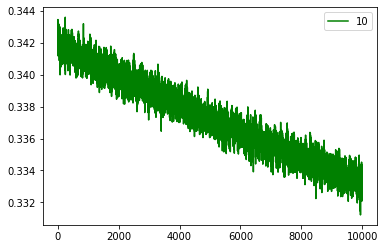

In [61]:
plot_loss(losses)

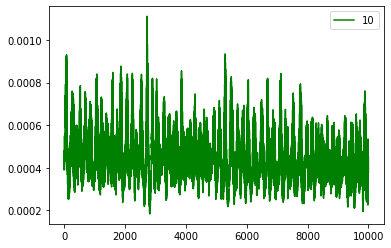

In [62]:
plot_loss(embedding_losses)

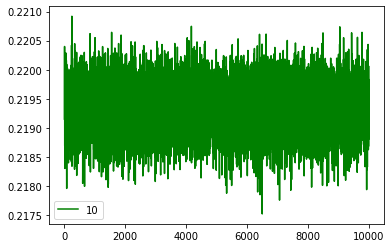

In [63]:
plot_loss(final_state_losses)

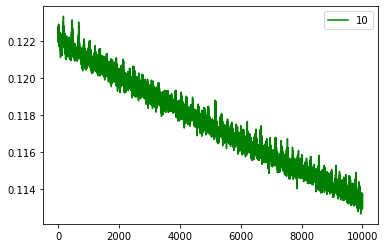

In [64]:
plot_loss(next_state_losses)

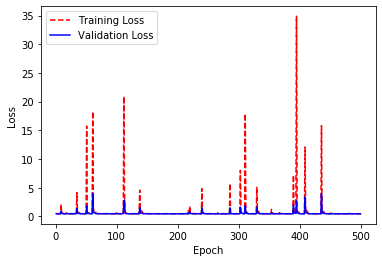

In [12]:
epoch_count = range(1, len(losses) + 1)
plt.clf()
plt.plot(epoch_count, losses, 'r--')
plt.plot(epoch_count, val_losses, 'b-')
plt.legend(['Training Loss', 'Validation Loss', 'Embedding Loss', 'Final State Loss', 'Next State Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

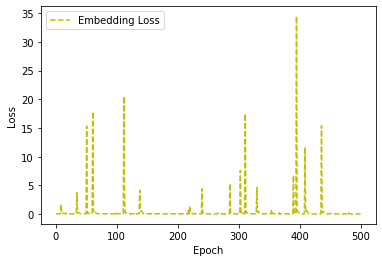

In [13]:
plt.clf()
plt.plot(epoch_count, embedding_losses, 'y--')
plt.legend(['Embedding Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

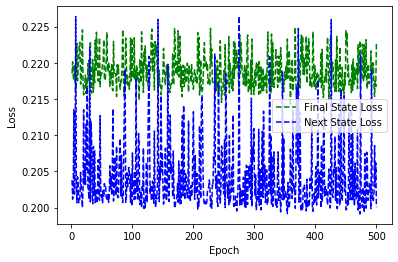

In [14]:
plt.clf()
plt.plot(epoch_count, final_state_losses, 'g--')
plt.plot(epoch_count, next_state_losses, 'b--')
plt.legend(['Final State Loss', 'Next State Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [15]:
trainer.save_checkpoint(path=root+"/../models/custom_rnn_uniform_2.pth")

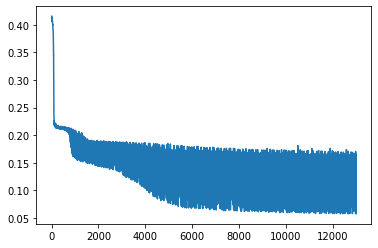

In [22]:
plt.plot(losses)
plt.show()

In [12]:
n=10

In [13]:
Y_hat = seq_model.predict(x=X_test[n:n+1], a=A_test[n:n+1])
Y = Y_test[n:n+1]

In [14]:
Y_hat.shape, Y.shape

((1, 100, 21), (1, 100, 21))

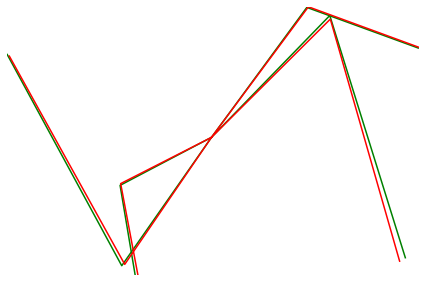

<Figure size 432x288 with 0 Axes>

In [18]:
compare_states(Y[0], Y_hat[0], overlap=True)

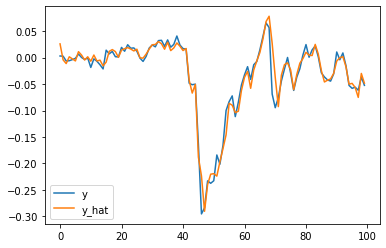

In [16]:
plot_velocity_curve(true=Y[0, :, 0], pred=Y_hat[0, :, 0])

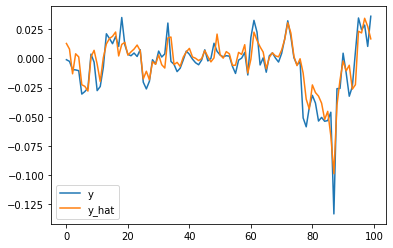

In [178]:
plot_velocity_curve(true=Y[0, :, 1], pred=Y_hat[0, :, 1])

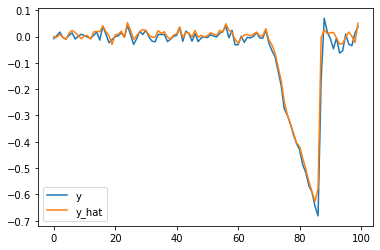

In [179]:
plot_velocity_curve(true=Y[0, :, 2], pred=Y_hat[0, :, 2])

In [164]:
trainer.save_checkpoint(path=root+"/../models/custom_rnn_uniform.pth")

In [29]:
Y_hat = seq_model.foresee(x=X_test[n:n+1], a=A_test[n:n+1], lookahead=1)
Y = Y_test[n:n+1]

In [30]:
Y_hat.shape

(1, 100, 21)

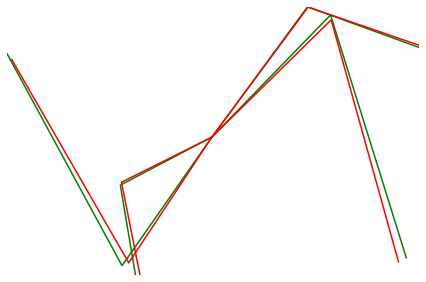

<Figure size 432x288 with 0 Axes>

In [31]:
compare_states(Y[0], Y_hat[0], overlap=True)

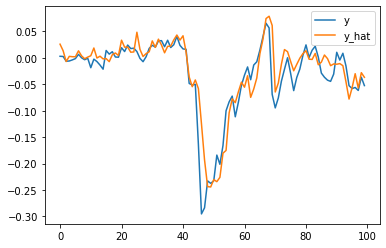

In [28]:
plot_velocity_curve(true=Y[0, :, 0], pred=Y_hat[0, :, 0])

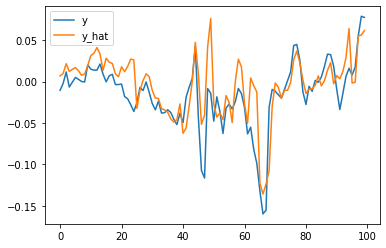

In [257]:
plot_velocity_curve(true=Y[0, :, 1], pred=Y_hat[0, :, 1])

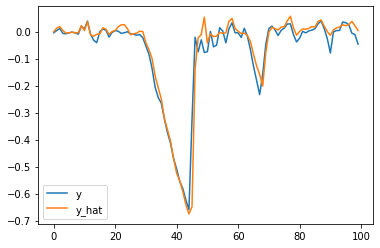

In [258]:
plot_velocity_curve(true=Y[0, :, 2], pred=Y_hat[0, :, 2])